##[Notebook_00](https://colab.research.google.com/github/mrdbourke/tensorflow-deep-learning/blob/main/00_tensorflow_fundamentals.ipynb) **Deep Learning and TensorFlow Fundamentals**

Creating your first tensors with TensorFlow and tf.constant()

In [ ]:
import tensorflow as tf
print(tf.__version__)

2.5.0


In [ ]:
#Tensors with tf.constant()
scalar = tf.constant(7)
scalar


<tf.Tensor: shape=(), dtype=int32, numpy=7>

In [ ]:
#ndim (number of dimensions)
scalar.ndim

0

In [ ]:
#Tensor with 1 dimension
vector = tf.constant([10,10])
vector

<tf.Tensor: shape=(2,), dtype=int32, numpy=array([10, 10], dtype=int32)>

In [ ]:
vector.ndim

1

In [ ]:
#Tensors with more than 1 dimension
matrix = tf.constant([[10,7],
                      [7,10]])
matrix

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[10,  7],
       [ 7, 10]], dtype=int32)>

In [ ]:
matrix.ndim

2

In [ ]:
#Change the dtype(Data Type), this is also an increased dimension, which is also called a tensor
matrix_2 = tf.constant([[[[10.,7.,3.],
                        [10.,7.,9.],
                        [8.,9.,8.],[10.,7.,3.],
                        [10.,7.,9.],
                        [8.,9.,8.]]]], dtype = tf.float16)
matrix_2

<tf.Tensor: shape=(1, 1, 6, 3), dtype=float16, numpy=
array([[[[10.,  7.,  3.],
         [10.,  7.,  9.],
         [ 8.,  9.,  8.],
         [10.,  7.,  3.],
         [10.,  7.,  9.],
         [ 8.,  9.,  8.]]]], dtype=float16)>

In [ ]:
matrix_2.ndim 

4

In [ ]:
#Scalar - single number
#Vector - a number with a meaning (wind, direction)
#Matrix -  a 2d array of numbers
#Tensor - a n-dimensional array of number (n is a random number)


Creating Tensors with Tensorflow and tf.Variable()

In [ ]:
#Creating the same tensor but with tf.Variable()
tensor_2 = tf.Variable([10,7])
tensor_2

<tf.Variable 'Variable:0' shape=(2,) dtype=int32, numpy=array([10,  7], dtype=int32)>

In [ ]:
#Changing a value in the tensor(this is only possible with the tf.Variable because it is changeable, NOT with tf.constant)
tensor_2[0].assign(7)
tensor_2

<tf.Variable 'Variable:0' shape=(2,) dtype=int32, numpy=array([7, 7], dtype=int32)>

In [ ]:
#Will NOT work becuase CONSTANT tensors will stay contant forever
matrix[0].assign(7)
#**NOTE:** Rarely in tensorflow will you need to use tf.Constant() becuase tensorflow solves it for you.

AttributeError: ignored

Creating Random Tensors with TensorFlow

In [ ]:
#Random tensors are tensors of some arbitary size which contain random numbers
random_1 = tf.random.Generator.from_seed(42) #seed for reproducibility
random_1 = random_1.normal(shape = [3,2])
random_2 = tf.random.Generator.from_seed(42)
random_2 = random_2.normal(shape = [3,2])

random_1, random_2, random_1 == random_2

Shuffling the Order of tensors

In [ ]:
#Shuffling a tensor, good for when you want to shuffle data so the ML ALG can learn more randomly and not get affected
not_shuffled = tf.constant([[10,7],
                           [3,4],
                           [2,5]])
not_shuffled

In [ ]:
not_shuffled.ndim

In [ ]:
#Shuffling the Tensor (not_shuffled)
tf.random.shuffle(not_shuffled)

In [ ]:
#Shuffling the Tensor (not_shuffled) but with seed
tf.random.shuffle(not_shuffled, seed = 42)

In [ ]:
#Shuffling the Tensor (not_shuffled) with tf.random.set_seed
tf.random.set_seed(42)
tf.random.shuffle(not_shuffled, seed = 42)

In [ ]:
random1 = tf.constant([[10,7], [9,8], [10,18]])
tf.random.set_seed(32)#global level operation seed
tf.random.shuffle(random1, seed = 4) #operational level random seed
#If both the global and the operation seed are set: Both seeds are used in conjunction to determine the random sequence.

Creating Tensors with NumPy arrays

In [ ]:
#Create a tensors of all ones (basically like numpy)
tf.ones([10,7], dtype = tf.float32)

In [ ]:
#Tensor of all zeros
tf.zeros(shape = (3,2), dtype = tf.float32)

In [ ]:
import numpy as np
numpy_A = np.arange(1,25, dtype = np.int32) #creates an array between 1 and 25
numpy_A

In [ ]:
A = tf.constant(numpy_A)
B = tf.constant(numpy_A, shape = (2,3,4))
A, B

Getting information from your
tensors (tensor attributes)

In [ ]:
#Shape - length of each dimension
#Rank - number of dimensions
#Axis - Particular dimension of a tensor
#Size - number of items in a tensor

In [ ]:
#Creating a rank 4 dimension (4 dimensions)
rank_4_tensor = tf.zeros(shape = (2,3,4,5))
rank_4_tensor

In [ ]:
rank_4_tensor[0]

In [ ]:
tf.size(rank_4_tensor)

In [ ]:
def facts_about_tensor(tensor):
  print('Data type of every element:', tensor.dtype)
  print('Number of dimensions:', tensor.ndim)
  print('Shape of tensor:', tensor.shape)
  print('Elements along the zero axis:', tensor.shape[0])
  print('Elements along the last axis:;', tensor.shape[-1])
  print('Total numbers of elements in our tensor:', tf.size(tensor) )
  return

In [ ]:
facts_about_tensor(rank_4_tensor)

In [ ]:
#Test
random_tensor = tf.Variable([[10,9,3], [9,8,10], [10,8,10]])
random_tensor_np_array = np.array(random_tensor)
random_tensor_np_array

In [ ]:
#Test
facts_about_tensor(random_tensor_np_array)

Indexing and expanding tensors

In [ ]:
rank_4_tensor[:2,:2,:2,:2]

In [ ]:
#Get first element from each dimnesion from each index except for the final one
rank_4_tensor[:1,:1,:1]

In [ ]:
rank_2_tensor = tf.constant([[2,9], [9,10]])

In [ ]:
rank_2_tensor.ndim

In [ ]:
rank_2_tensor.shape

In [ ]:
rank_2_tensor[:, -1]

In [ ]:
#Adding an extra dimensions
rank_2_tensor = rank_2_tensor[..., tf.newaxis]

In [ ]:
#Alternative
tf.expand_dims(rank_2_tensor, axis = -1) #negative one means last axis or add a dimension to the 

In [ ]:
tf.expand_dims(rank_2_tensor, axis = 0)#Expand zeor axis or add an extra dimension to the front

Manipulating tensors with basic operations

In [ ]:
tensor = tf.constant([[10,7], [3,4]])
tensor+10 #basically adds 10 to every number in the tensor


In [ ]:
tensor*10

In [ ]:
tensor-10

In [ ]:
tensor/10

In [ ]:
tf.multiply(tensor,10)

In [ ]:
tf.add(tensor, 10)

Matrix multiplication with
tensors part 1

In [ ]:
#Matrix Multiplication in tensorflow
tf.linalg.matmul(tensor,rank_2_tensor)

In [ ]:
tensor_shape_1 = tf.constant([[10,9], [8,9], [10,9]])
tensor_shape_2 = tf.constant([[[10,9,8], [2,9,3]], [[10,8,9], [9,8,7]], [[10,9,2], [10,90,29]], [[10,9,9], [10,29,30]]])

In [ ]:
tensor_shape_1 @ tensor_shape_2

 Matrix multiplication with
tensors part 2

In [ ]:
# Create (3, 2) tensor
X = tf.constant([[1, 2],
                 [3, 4],
                 [5, 6]])

# Create another (3, 2) tensor
Y = tf.constant([[7, 8],
                 [9, 10],
                 [11, 12]])


In [ ]:
X@Y #(Will erro rbecuase the inside shapes are not the same)

In [ ]:
tf.reshape(Y, shape  = (2,3))

In [ ]:
X@ tf.reshape(Y, shape  = (2,3))# it works becuase we changed the shapes of the inner dimensions match


In [ ]:
tf.matmul(X, tf.reshape(Y, shape = (2,3)))

In [ ]:
tf.matmul(tf.reshape(X, shape = (2,3)), Y)#will still work becuase the inner dimensions are the same

In [ ]:
tf.transpose(X),  tf.reshape(Y, shape = (2,3))

In [ ]:
XX = tf.transpose(X)#,  tf.reshape(Y, shape = (2,3))
XX@Y

In [ ]:
#Perform dot product multiplcation 
tf.tensordot(tf.reshape(X, shape = (2,3)), Y, axes = 1)

In [ ]:
tf.tensordot(tf.transpose(X), Y, axes = 1)

In [ ]:
XXX = tf.transpose(X)
XXX.shape #Generally when matrix multiplication doesnt work you should transpose on of them


In [ ]:
XXX = tf.reshape(X, shape = (2,3))
XXX.shape, XXX, X, Y.shape

Changing the datatype of
tensors

In [ ]:
X.dtype

tf.int32

In [ ]:
X_float16 = tf.cast(X, dtype = tf.float16)
X_float16

<tf.Tensor: shape=(3, 2), dtype=float16, numpy=
array([[1., 2.],
       [3., 4.],
       [5., 6.]], dtype=float16)>

Tensor aggregation (finding the
min, max, mean & more)

In [ ]:
D = tf.constant([-7, -10])
D

<tf.Tensor: shape=(2,), dtype=int32, numpy=array([ -7, -10], dtype=int32)>

In [ ]:
tf.abs(D)

<tf.Tensor: shape=(2,), dtype=int32, numpy=array([ 7, 10], dtype=int32)>

In [ ]:
JJ = tf.constant(np.random.randint(0,100, size = 50), dtype =  tf.float16)

In [ ]:
JJ

<tf.Tensor: shape=(50,), dtype=float16, numpy=
array([72., 57., 63., 19., 10., 16., 75., 26., 58., 20., 55., 79., 60.,
       99., 33.,  8., 29., 51., 64.,  0., 21., 15., 98., 75., 34., 22.,
       40., 95., 14., 81., 93., 12., 48., 44., 10., 16., 33., 95., 69.,
       79., 55., 25., 72., 31., 15., 37., 20., 24., 49., 44.],
      dtype=float16)>

In [ ]:
facts_about_tensor(JJ)

Data type of every element: <dtype: 'float16'>
Number of dimensions: 1
Shape of tensor: (50,)
Elements along the zero axis: 50
Elements along the last axis:; 50
Total numbers of elements in our tensor: tf.Tensor(50, shape=(), dtype=int32)


In [ ]:
tf.reduce_min(JJ) #Minimum

<tf.Tensor: shape=(), dtype=float16, numpy=0.0>

In [ ]:
tf.reduce_max(JJ)#Maximum

<tf.Tensor: shape=(), dtype=float16, numpy=99.0>

In [ ]:
tf.reduce_mean(JJ)#Average

<tf.Tensor: shape=(), dtype=float16, numpy=45.2>

In [ ]:
tf.reduce_sum(JJ) #Sum

<tf.Tensor: shape=(), dtype=float16, numpy=2260.0>

In [ ]:
tf.math.reduce_std(JJ)#Standard Deviation

<tf.Tensor: shape=(), dtype=float16, numpy=27.75>

In [ ]:
import tensorflow_probability as tfp #for variance we need acces to tensorflow_probabilty
tfp.stats.variance(JJ) #for variance https://www.mathsisfun.com/definitions/variance.html
#You can also use tf.math.reduce_variance(JJ)

<tf.Tensor: shape=(), dtype=float16, numpy=770.0>

Finding the positional minimum and maximum
of a tensor (argmin and argmax)

In [ ]:
F = tf.random.uniform(shape = [50])
F

<tf.Tensor: shape=(50,), dtype=float32, numpy=
array([0.54520595, 0.13372338, 0.45232666, 0.15582252, 0.9621073 ,
       0.8151462 , 0.4068215 , 0.9565903 , 0.5532354 , 0.44936454,
       0.01469815, 0.86204493, 0.12014258, 0.91072273, 0.00848019,
       0.62772846, 0.8167286 , 0.98235905, 0.06410611, 0.17873585,
       0.07358396, 0.95524645, 0.5906956 , 0.3774085 , 0.9427308 ,
       0.32449841, 0.05033565, 0.6481848 , 0.97997856, 0.7848562 ,
       0.8223983 , 0.25406194, 0.21289039, 0.18566561, 0.18804717,
       0.5875702 , 0.45183384, 0.5508704 , 0.18366766, 0.55480397,
       0.72248566, 0.66862214, 0.46865964, 0.50943816, 0.61882794,
       0.5858562 , 0.7246859 , 0.88589907, 0.7049539 , 0.00409675],
      dtype=float32)>

In [ ]:
tf.argmax(F)

<tf.Tensor: shape=(), dtype=int64, numpy=17>

In [ ]:
F[tf.argmax(F)]

<tf.Tensor: shape=(), dtype=float32, numpy=0.98235905>

In [ ]:
F[tf.argmin(F)]

<tf.Tensor: shape=(), dtype=float32, numpy=0.0040967464>

Squeezing a tensor (removing
all 1-dimension axes)

In [ ]:
tf.random.set_seed(42)
G = tf.constant(tf.random.uniform(shape = [50]), shape = (1,1,1,1,50))
G

<tf.Tensor: shape=(1, 1, 1, 1, 50), dtype=float32, numpy=
array([[[[[0.6645621 , 0.44100678, 0.3528825 , 0.46448255, 0.03366041,
           0.68467236, 0.74011743, 0.8724445 , 0.22632635, 0.22319686,
           0.3103881 , 0.7223358 , 0.13318717, 0.5480639 , 0.5746088 ,
           0.8996835 , 0.00946367, 0.5212307 , 0.6345445 , 0.1993283 ,
           0.72942245, 0.54583454, 0.10756552, 0.6767061 , 0.6602763 ,
           0.33695042, 0.60141766, 0.21062577, 0.8527372 , 0.44062173,
           0.9485276 , 0.23752594, 0.81179297, 0.5263394 , 0.494308  ,
           0.21612847, 0.8457197 , 0.8718841 , 0.3083862 , 0.6868038 ,
           0.23764038, 0.7817228 , 0.9671384 , 0.06870162, 0.79873943,
           0.66028714, 0.5871513 , 0.16461694, 0.7381023 , 0.32054043]]]]],
      dtype=float32)>

In [ ]:
G_squeezed = tf.squeeze(G)
G_squeezed.shape

TensorShape([50])

One-hot encoding tensors

In [ ]:
some_list = [0,1,2,3]

tf.one_hot(some_list, depth = 4)

<tf.Tensor: shape=(4, 4), dtype=float32, numpy=
array([[1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 0., 1.]], dtype=float32)>

In [ ]:
tf.one_hot(some_list, depth = 4)

<tf.Tensor: shape=(4, 4), dtype=string, numpy=
array([[b'Yo', b'Dance', b'Dance', b'Dance'],
       [b'Dance', b'Yo', b'Dance', b'Dance'],
       [b'Dance', b'Dance', b'Yo', b'Dance'],
       [b'Dance', b'Dance', b'Dance', b'Yo']], dtype=object)>

Trying out more tensor math
operations

In [ ]:
#Squaring, Log, Square Root
H = tf.range(1,10)
H = tf.cast(H, dtype = tf.float32)

In [ ]:
#Squaring
tf.square(H)

<tf.Tensor: shape=(9,), dtype=int32, numpy=array([ 1,  4,  9, 16, 25, 36, 49, 64, 81], dtype=int32)>

In [ ]:
#Square Root (requires a not int type like float)
tf.sqrt(H)

<tf.Tensor: shape=(9,), dtype=float32, numpy=
array([0.99999994, 1.4142134 , 1.7320508 , 1.9999999 , 2.236068  ,
       2.4494896 , 2.6457512 , 2.8284268 , 3.        ], dtype=float32)>

In [ ]:
#Find the log
tf.math.log(H)

<tf.Tensor: shape=(9,), dtype=float32, numpy=
array([0.       , 0.6931472, 1.0986123, 1.3862944, 1.609438 , 1.7917595,
       1.9459102, 2.0794415, 2.1972246], dtype=float32)>

Exploring TensorFlow and
NumPy's compatibility

In [ ]:
array = np.array([7,10])
tensor_1 = tf.constant(array)
tensor_1

<tf.Tensor: shape=(2,), dtype=int64, numpy=array([ 7, 10])>

In [ ]:
tensor_1.numpy()

array([ 7, 10])

In [ ]:
#tensor from numpy array is default float64
#regular tensors are float32

 Making sure our tensor
operations run really fast on GPUs

In [ ]:
tf.config.list_physical_devices()

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]

Exercises

In [ ]:
#Vector
vector = tf.constant(7)
vector

<tf.Tensor: shape=(), dtype=int32, numpy=7>

In [ ]:
#Scalar
scalar = tf.constant([7,10])
scalar

<tf.Tensor: shape=(2,), dtype=int32, numpy=array([ 7, 10], dtype=int32)>

In [ ]:
#Matrix
matrix = tf.constant([[7,10], [7,10]])
matrix

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[ 7, 10],
       [ 7, 10]], dtype=int32)>

In [ ]:
#Tensor
tensor_exercise = tf.constant([[[10,7], [10,9]], [[10,8], [9,8]]])
tensor_exercise

<tf.Tensor: shape=(2, 2, 2), dtype=int32, numpy=
array([[[10,  7],
        [10,  9]],

       [[10,  8],
        [ 9,  8]]], dtype=int32)>

In [ ]:
#Shape Rank Size
vector.shape
vector.dtype
tf.size(vector)
vector.ndim

0

In [ ]:
scalar.shape
scalar.dtype
tf.size(scalar)
scalar.ndim

1

In [ ]:
matrix.shape
matrix.dtype
tf.size(matrix)
matrix.ndim

2

In [ ]:
tensor_exercise.shape
tensor_exercise.dtype
tf.size(tensor_exercise)
tensor_exercise.ndim

3

In [ ]:
a  =tf.constant(tf.range(0,1), shape = [5,300])
b = tf.constant(tf.range(0,1), shape = [5,300])

In [ ]:
b = tf.transpose(b)

In [ ]:
a@b #Matrix Multiplication

<tf.Tensor: shape=(5, 5), dtype=int32, numpy=
array([[0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0]], dtype=int32)>

In [ ]:
tf.tensordot(a,b, axes = 1)

<tf.Tensor: shape=(5, 5), dtype=int32, numpy=
array([[0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0]], dtype=int32)>

In [ ]:
c = tf.constant(tf.range(0,1), shape = (224,224,3))

In [ ]:
tf.reduce_max(c)

<tf.Tensor: shape=(), dtype=int32, numpy=0>

In [ ]:
tf.reduce_min(c)

<tf.Tensor: shape=(), dtype=int32, numpy=0>

In [ ]:
d = tf.random.uniform(shape = (1, 224, 224, 3))

In [ ]:
d = tf.squeeze(d)

In [ ]:
e = tf.constant([1,2,3,4,5,6,7,8,9,10])

tf.one_hot(e, depth = 10)

# [Notebook_01](https://colab.research.google.com/github/mrdbourke/tensorflow-deep-learning/blob/main/01_neural_network_regression_in_tensorflow.ipynb) **Neural network regression with TensorFlow**

Creating sample regression
data (so we can model it)

In [ ]:
import tensorflow as tf
print(tf.__version__)

2.5.0


In [ ]:
#Features tend to be capital and the predicted output tend to be lower case
import numpy as np
import matplotlib.pyplot as plt

#Features
X = np.array([-7.0, -4.0, -1.0, 2.0, 5.0, 8.0, 11.0, 14.0])

#Lables or output
y = np.array([3.0,6.0,9.0, 12.0, 15.0, 18.0, 21.0, 24.0])

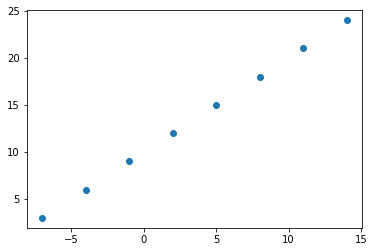

In [ ]:
plt.scatter(X, y) #plotting

In [ ]:
input_shape = X.shape
output_shape = y.shape

In [ ]:
input_shape, output_shape

((8,), (8,))

The major steps in modelling
with TensorFlow

In [ ]:
X = tf.constant(X)
y = tf.constant(y)

In [ ]:
model = tf.keras.Sequential([tf.keras.layers.Dense(1)])

In [ ]:
model.compile(loss = tf.keras.losses.MAE, optimizer = tf.keras.optimizers.SGD(), metrics = ["mae"])

In [ ]:
model.fit(X,y, epochs = 5, verbose = False)

In [ ]:
model.predict([17.0])

array([[-3.3016143]], dtype=float32)

Steps in improving a model
with TensorFlow 

In [ ]:
model.fit(X,y, epochs = 5, verbose = False) #Bad prediction

In [ ]:
model = tf.keras.Sequential([tf.keras.layers.Dense(100, activation =  'relu'),
                                tf.keras.layers.Dense(100, activation = 'relu'),
                                tf.keras.layers.Dense(100, activation = 'relu'),
                                tf.keras.layers.Dense(1)])

In [ ]:
model.compile(optimizer = tf.keras.optimizers.Adam(learning_rate = 0.0001), loss = tf.keras.losses.MAE, metrics = ['acc'])

In [ ]:
  model.fit(X,y, epochs = 1000, verbose = False)

In [ ]:
model.predict([17.0])

array([[30.613102]], dtype=float32)

In [ ]:
model = tf.keras.Sequential([tf.keras.layers.Dense(100, activation =  'relu'),
                                tf.keras.layers.Dense(1)])

In [ ]:
model.compile(loss = tf.keras.losses.MAE, optimizer = tf.keras.optimizers.Adam(learning_rate = 0.01), metrics = ['acc'])

In [ ]:
model.fit(X,y, epochs = 100)

Epoch 1/100
1/1 [==============================] - 0s 399ms/step - loss: 13.8285 - acc: 0.0000e+00
Epoch 2/100
1/1 [==============================] - 0s 7ms/step - loss: 12.9743 - acc: 0.0000e+00
Epoch 3/100
1/1 [==============================] - 0s 6ms/step - loss: 12.1191 - acc: 0.0000e+00
Epoch 4/100
1/1 [==============================] - 0s 8ms/step - loss: 11.2656 - acc: 0.0000e+00
Epoch 5/100
1/1 [==============================] - 0s 5ms/step - loss: 10.5409 - acc: 0.0000e+00
Epoch 6/100
1/1 [==============================] - 0s 8ms/step - loss: 9.8965 - acc: 0.0000e+00
Epoch 7/100
1/1 [==============================] - 0s 12ms/step - loss: 9.2444 - acc: 0.0000e+00
Epoch 8/100
1/1 [==============================] - 0s 10ms/step - loss: 8.5762 - acc: 0.0000e+00
Epoch 9/100
1/1 [==============================] - 0s 5ms/step - loss: 7.8871 - acc: 0.0000e+00
Epoch 10/100
1/1 [==============================] - 0s 12ms/step - loss: 7.1838 - acc: 0.0000e+00
Epoch 11/100
1/1 [===========

In [ ]:
model.predict([17.0])

array([[28.112635]], dtype=float32)

Evaluating a TensorFlow model 
("visualise, visualise, visualise")

In [ ]:
#Make a bigger dataset
X = tf.range(-100, 100, 4)
X

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
        -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
        -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
         32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
         76,   80,   84,   88,   92,   96], dtype=int32)>

In [ ]:
#Make labels 
y = X+10
y

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
       -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
        14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
        66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

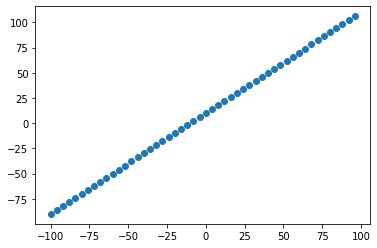

In [ ]:
#Visualize the data
plt.scatter(X,y)

The Three Sets

In [ ]:
X

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
        -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
        -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
         32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
         76,   80,   84,   88,   92,   96], dtype=int32)>

In [ ]:
y

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
       -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
        14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
        66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

In [ ]:
len(X)

50

In [ ]:
X_train = X[:40] #First 40 are training
X_test = X[40:]#Last 40 are test

y_train = y[:40]#First 40 are training
y_test = y[40:]#Last 40 are test

In [ ]:
len(X_train), len(X_test)

(40, 10)

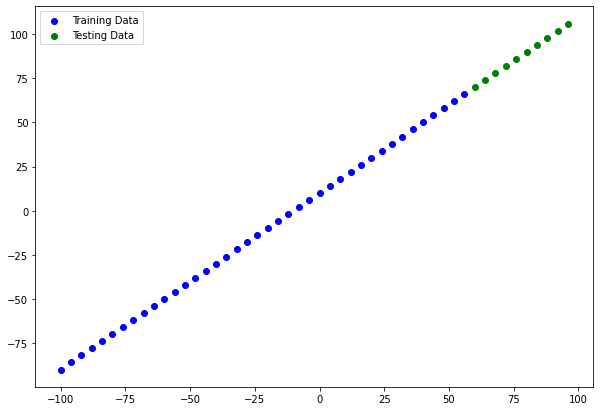

In [ ]:
#Visualizing the Data after splitting the data
plt.figure(figsize = (10,7))
#Plot training data
plt.scatter(X_train, y_train, c = 'b', label = 'Training Data')
#Plot test data
plt.scatter(X_test, y_test, c = 'g', label = 'Testing Data')
plt.legend()

Evaluating a TensorFlow model
part 2 (getting a model summary)

In [ ]:
model = tf.keras.Sequential([
                             tf.keras.layers.Dense(1)
])

model.compile(loss = tf.keras.losses.MAE, 
              optimizer = tf.keras.optimizers.Adam(),
              metrics = ['mae'])

model.fit(X_train, y_train, epochs = 100)

Epoch 1/100
2/2 [==============================] - 0s 7ms/step - loss: 28.8017 - mae: 28.8017
Epoch 2/100
2/2 [==============================] - 0s 6ms/step - loss: 28.7205 - mae: 28.7205
Epoch 3/100
2/2 [==============================] - 0s 5ms/step - loss: 28.6388 - mae: 28.6388
Epoch 4/100
2/2 [==============================] - 0s 3ms/step - loss: 28.5534 - mae: 28.5534
Epoch 5/100
2/2 [==============================] - 0s 4ms/step - loss: 28.4715 - mae: 28.4715
Epoch 6/100
2/2 [==============================] - 0s 8ms/step - loss: 28.3902 - mae: 28.3902
Epoch 7/100
2/2 [==============================] - 0s 3ms/step - loss: 28.3070 - mae: 28.3070
Epoch 8/100
2/2 [==============================] - 0s 4ms/step - loss: 28.2256 - mae: 28.2256
Epoch 9/100
2/2 [==============================] - 0s 4ms/step - loss: 28.1427 - mae: 28.1427
Epoch 10/100
2/2 [==============================] - 0s 3ms/step - loss: 28.0586 - mae: 28.0586
Epoch 11/100
2/2 [==============================] - 0s 3ms/

In [ ]:
model.predict([1000])

array([[483.74713]], dtype=float32)

In [ ]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model = tf.keras.Sequential([
                             tf.keras.layers.Dense(1, input_shape = [1])
])

In [ ]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_8 (Dense)              (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(optimizer = 'rmsprop', loss = 'MAE', metrics = ['MAE'])

In [ ]:
model.fit(X_train, y_train, epochs = 100, verbose = False)

In [ ]:
model.predict([1000])

array([[1443.3634]], dtype=float32)

Evaluating a TensorFlow model part 3
(visualising a model's layers)

In [ ]:
#Getting a summary of out model
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_8 (Dense)              (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


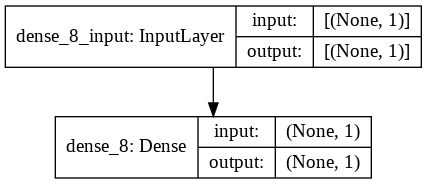

In [ ]:
from tensorflow.keras.utils import plot_model

plot_model(model = model, show_shapes = True, show_layer_names= True)

Visualizing Our Models Predictions

In [ ]:
y_pred = model.predict(X_test) #Predictions of every values in X_test
y_pred #When we plot predictions its a good idea to plot the prediction against the ground truth

array([[ 86.784225],
       [ 92.5569  ],
       [ 98.329575],
       [104.10226 ],
       [109.87493 ],
       [115.64761 ],
       [121.42029 ],
       [127.19296 ],
       [132.96564 ],
       [138.73831 ]], dtype=float32)

In [ ]:
y_test #Ground Truth

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

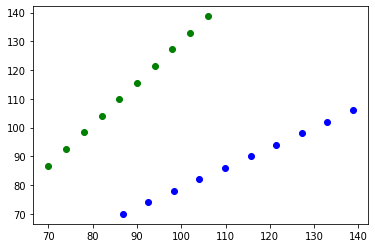

In [ ]:
#Plotting
plt.scatter(y_pred, y_test, c = 'b', label = 'Predictions')
plt.scatter(y_test, y_pred, c = 'g', label = 'Ground Truth' )

In [ ]:
#Creating a plotting function

def plot_prediction(train_data = X_train,
                    train_labels = y_train,
                    test_data = X_test,
                    test_labels = y_test,
                    predictions = y_pred):
  plt.figure(figsize = (10,7))

  #Plot training data in blue
  plt.scatter(train_data, train_labels, c = 'b', label = 'Training data')
  #Plot Testing Data in greed
  plt.scatter(test_data, test_labels, c = 'g', label = 'Testing Data')
  #Plot model predictions in red
  plt.scatter(test_data, predictions, c = 'r', label = 'Predictions')
  plt.legend()
  return

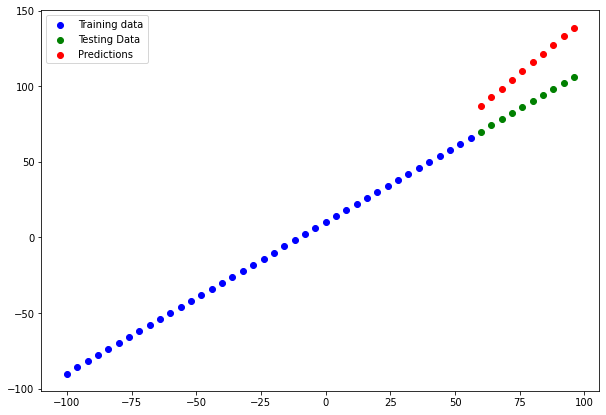

In [ ]:
plot_prediction()

Evaluating our model with regression metrics

In [ ]:
 #Evaluate the model on the test set
 model.evaluate(X_test, y_test)

1/1 [==============================] - 0s 135ms/step - loss: 24.7613 - MAE: 24.7613


[24.76127052307129, 24.76127052307129]

In [ ]:
y_pred

array([[ 86.784225],
       [ 92.5569  ],
       [ 98.329575],
       [104.10226 ],
       [109.87493 ],
       [115.64761 ],
       [121.42029 ],
       [127.19296 ],
       [132.96564 ],
       [138.73831 ]], dtype=float32)

In [ ]:
y_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

In [ ]:
#Calculate the mean absolute error
mae = tf.metrics.mean_absolute_error(y_test, y_pred)
mae #This will come into many numbers becuase the y_test and y_pred are not the same shape

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([10.      , 10.51138 , 12.597745, 16.481806, 21.874931, 27.647614,
       33.420288, 39.192963, 44.965637, 50.73831 ], dtype=float32)>

In [ ]:
y_pred = tf.constant(y_pred)
y_pred

<tf.Tensor: shape=(10, 1), dtype=float32, numpy=
array([[ 86.784225],
       [ 92.5569  ],
       [ 98.329575],
       [104.10226 ],
       [109.87493 ],
       [115.64761 ],
       [121.42029 ],
       [127.19296 ],
       [132.96564 ],
       [138.73831 ]], dtype=float32)>

In [ ]:
y_pred = tf.squeeze(y_pred)
y_pred.shape

TensorShape([10])

In [ ]:
mae = tf.metrics.mean_absolute_error(y_test, y_pred)
mae #Comes one number becuase y_test and y_pred are the same shape

<tf.Tensor: shape=(), dtype=float32, numpy=24.76127>

In [ ]:
mse = tf.metrics.mean_squared_error(y_test, y_pred)
mse

<tf.Tensor: shape=(), dtype=float32, numpy=639.0451>

In [ ]:
#Functions for reusing MAE and MSE
def mae(y_true, y_pred):
  mae_for_func = tf.metrics.mean_absolute_error(y_true = y_true, y_pred = tf.squeeze(y_pred))
  return mae_for_func

#Function for MSE
def mse(y_true, y_pred):
  mse_for_func = tf.metrics.mean_squared_error(y_true = y_true, y_pred = tf.squeeze(y_pred))
  return mse_for_func 

Running Experiments to imporve our model

In [ ]:
X_train, y_train

(<tf.Tensor: shape=(40,), dtype=int32, numpy=
 array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
         -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
         -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
          32,   36,   40,   44,   48,   52,   56], dtype=int32)>,
 <tf.Tensor: shape=(40,), dtype=int32, numpy=
 array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
        -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
         14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
         66], dtype=int32)>)

In [ ]:
#Experiments number 1 (model_1, 1 layer trained for 100 epochs)

tf.random.set_seed(42)

model_1 = tf.keras.Sequential([
                               tf.keras.layers.Dense(1)
])

model.compile(loss = tf.keras.losses.MAE,
              optimizer = tf.keras.optimizers.Adam(),
              metrics = ['MAE'])

model.fit(X_train, y_train, epochs = 100, verbose = False)

In [ ]:
#Evaluating model_1
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_8 (Dense)              (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [ ]:
y_preds_1 = model_1.predict(X_test)
y_preds_1

array([[34.203594],
       [36.483833],
       [38.764072],
       [41.04431 ],
       [43.32455 ],
       [45.60479 ],
       [47.885033],
       [50.16527 ],
       [52.44551 ],
       [54.72575 ]], dtype=float32)

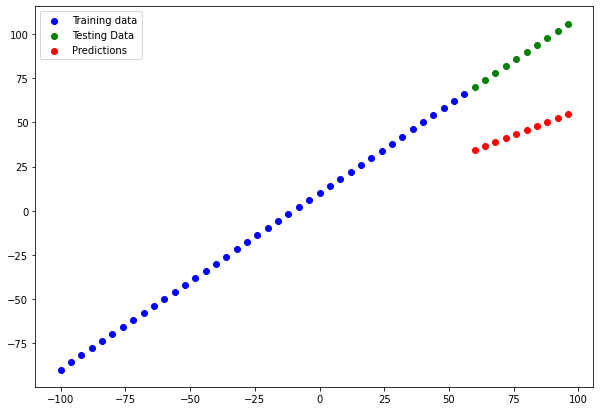

In [ ]:
plot_prediction(predictions = y_preds_1)

In [ ]:
mae_1 = mae(y_true = y_test, y_pred = y_preds_1)

In [ ]:
mse_1 = mse(y_true = y_test, y_pred = y_preds_1)

In [ ]:
#Model_2 (2 layers with 100 epochs)

tf.random.set_seed(42)

model_2 = tf.keras.Sequential([
                               tf.keras.layers.Dense(100),
                               tf.keras.layers.Dense(1)
])

model_2.compile(loss = tf.keras.losses.MAE, 
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ["MAE"])

model_2.fit(X_train, y_train, epochs = 100, verbose = False)

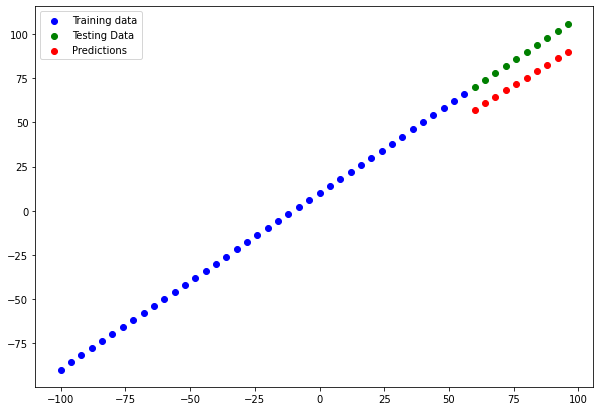

In [ ]:
#Evaluating model_2
y_preds_2 = model_2.predict(X_test)

plot_prediction(predictions = y_preds_2)

In [ ]:
mae_2 =mae(y_test, y_preds_2)

In [ ]:
mse_2 = mse(y_test, y_preds_2)

In [ ]:
#Model 3 (2 layers with 500 epochs)

tf.random.set_seed(42)

model_3 = tf.keras.Sequential([
                               tf.keras.layers.Dense(100),
                               tf.keras.layers.Dense(1)
])

model_3.compile(loss = tf.keras.losses.MSE, 
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ["MAE"])

model_3.fit(X_train, y_train, epochs = 500, verbose = False)

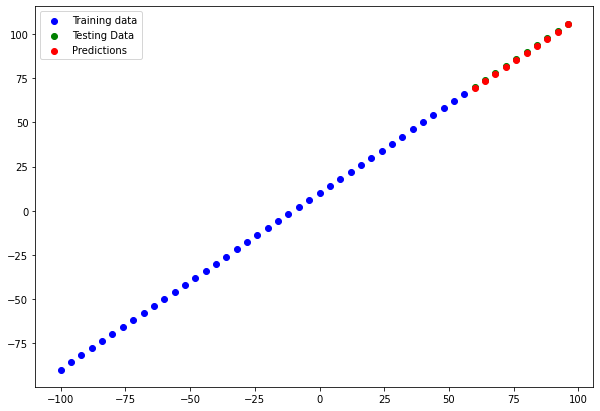

In [ ]:
y_preds_3 = model_3.predict(X_test)

plot_prediction(predictions = y_preds_3)

In [ ]:
#Evaluate model_3
mae_3 = mae(y_true = y_test, y_pred = y_preds_3)

In [ ]:
mse_3 = mse(y_true = y_test, y_pred = y_preds_3)

In [ ]:
model_3.evaluate(X_test, y_test)

1/1 [==============================] - 0s 115ms/step - loss: 0.2086 - MAE: 0.4559


[0.20863094925880432, 0.45587921142578125]

Comparing the Results of our experiments

In [ ]:
#Comparing our models results in a pandas dataframe
import pandas as pd

model_results = [["model_1", mae_1.numpy(), mse_1.numpy()],
                 ["model_2", mae_2.numpy(), mse_2.numpy()],
                 ["model_3", mae_3.numpy(), mse_3.numpy()]]
all_results = pd.DataFrame(model_results, columns = ['model', 'mae', 'mse'])
all_results

model        mae          mse
0  model_1  43.535328  1919.724854
1  model_2  14.417635   208.919144
2  model_3   0.455882     0.208633

In [ ]:
model_3.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_12 (Dense)             (None, 100)               200       
_________________________________________________________________
dense_13 (Dense)             (None, 1)                 101       
Total params: 301
Trainable params: 301
Non-trainable params: 0
_________________________________________________________________


How to save a Tensorflow model

In [ ]:
#Saving a model using SaveModel format

model_3.save("best_model_SaveModel_Format")

INFO:tensorflow:Assets written to: best_model_SaveModel_Format/assets


In [ ]:
# Saving model using HDF5 format

model_3.save("best_model_HDF5_format.h5")

How to load and use a saved
TensorFlow model

In [ ]:
#Loading our SavedModel format

loaded_SavedModel_format = tf.keras.models.load_model("best_model_SaveModel_Format")
loaded_SavedModel_format.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_12 (Dense)             (None, 100)               200       
_________________________________________________________________
dense_13 (Dense)             (None, 1)                 101       
Total params: 301
Trainable params: 301
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model_3.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_12 (Dense)             (None, 100)               200       
_________________________________________________________________
dense_13 (Dense)             (None, 1)                 101       
Total params: 301
Trainable params: 301
Non-trainable params: 0
_________________________________________________________________


In [ ]:
#Compare model_3 predictions with SavedModel predictions

model_3_preds = model_3.predict(X_test)
loaded_SavedModel_format_preds = loaded_SavedModel_format.predict(X_test)

<Figure size 720x504 with 0 Axes>

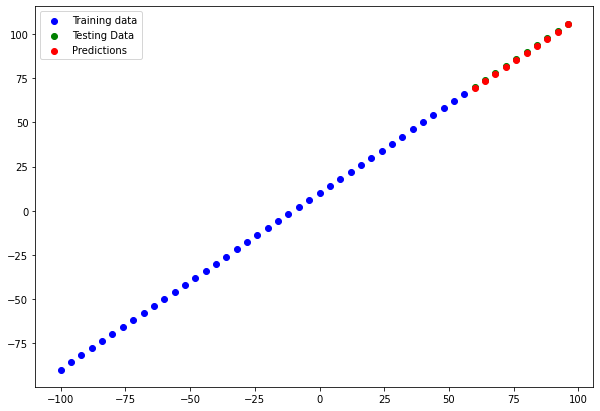

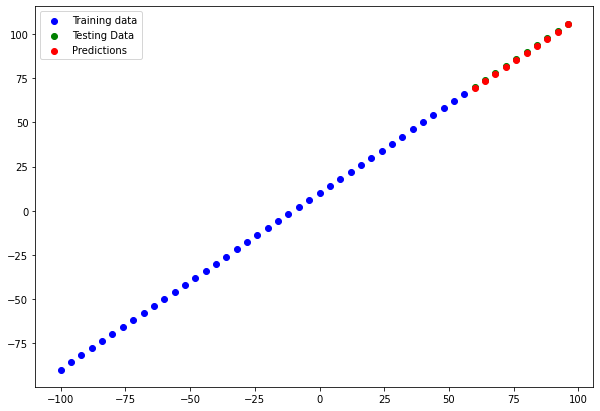

In [ ]:
plt.figure(figsize=(10,7))

plot_prediction(predictions = model_3_preds)
plot_prediction(predictions = loaded_SavedModel_format_preds)

In [ ]:
# Loading the h5 format model

loaded_h5_model = tf.keras.models.load_model("best_model_HDF5_format.h5")
loaded_h5_model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_12 (Dense)             (None, 100)               200       
_________________________________________________________________
dense_13 (Dense)             (None, 1)                 101       
Total params: 301
Trainable params: 301
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model_3_preds_h5 = model_3.predict(X_test)
loaded_h5_model_preds = loaded_h5_model.predict(X_test)

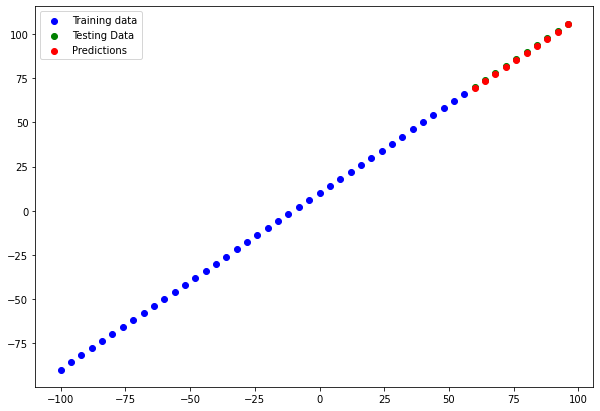

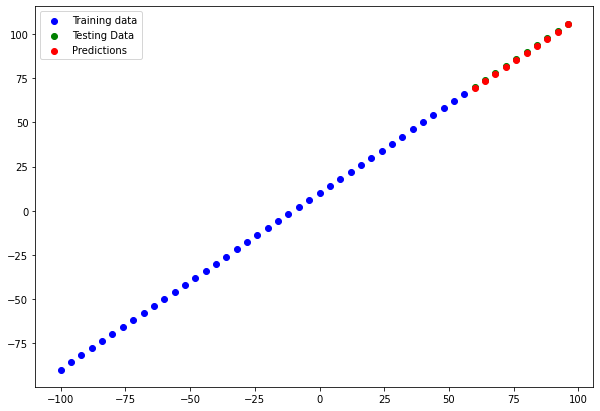

In [ ]:
plot_prediction(predictions=model_3_preds_h5)
plot_prediction(predictions=loaded_h5_model_preds)

In [ ]:
loaded_h5_model_preds == model_3_preds_h5

array([[ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True]])

Putting Together what we have learned (part 1)

In [ ]:
# Import required libraries

import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
#Loading our dataset
insurance = pd.read_csv('https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv')

In [ ]:
insurance #Dependent Var - charges, Independent Vars - Rest of variables

age     sex     bmi  children smoker     region      charges
0      19  female  27.900         0    yes  southwest  16884.92400
1      18    male  33.770         1     no  southeast   1725.55230
2      28    male  33.000         3     no  southeast   4449.46200
3      33    male  22.705         0     no  northwest  21984.47061
4      32    male  28.880         0     no  northwest   3866.85520
...   ...     ...     ...       ...    ...        ...          ...
1333   50    male  30.970         3     no  northwest  10600.54830
1334   18  female  31.920         0     no  northeast   2205.98080
1335   18  female  36.850         0     no  southeast   1629.83350
1336   21  female  25.800         0     no  southwest   2007.94500
1337   61  female  29.070         0    yes  northwest  29141.36030

[1338 rows x 7 columns]

In [ ]:
# Preproccesing
insurance_one_hot = pd.get_dummies(insurance)

Putting Together what we have learned (part 2)

In [ ]:
X = insurance_one_hot.drop("charges", axis = 1)
y = insurance_one_hot["charges"]

In [ ]:
X.head()

age     bmi  children  ...  region_northwest  region_southeast  region_southwest
0   19  27.900         0  ...                 0                 0                 1
1   18  33.770         1  ...                 0                 1                 0
2   28  33.000         3  ...                 0                 1                 0
3   33  22.705         0  ...                 1                 0                 0
4   32  28.880         0  ...                 1                 0                 0

[5 rows x 11 columns]

In [ ]:
y.head()

0    16884.92400
1     1725.55230
2     4449.46200
3    21984.47061
4     3866.85520
Name: charges, dtype: float64

In [ ]:
#Train and test
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 42)

In [ ]:
#Build our nueral network
tf.random.set_seed(42)

insurance_model = tf.keras.Sequential([
                                       tf.keras.layers.Dense(10),
                                       tf.keras.layers.Dense(1)
])

insurance_model.compile(loss = tf.keras.losses.mae, 
                        optimizer = tf.keras.optimizers.SGD(),
                        metrics = ['mae'])

insurance_model.fit(X_train, y_train, epochs = 100)

Epoch 1/100
34/34 [==============================] - 0s 1ms/step - loss: 8637.1006 - mae: 8637.1006
Epoch 2/100
34/34 [==============================] - 0s 2ms/step - loss: 7886.7759 - mae: 7886.7759
Epoch 3/100
34/34 [==============================] - 0s 1ms/step - loss: 7558.1470 - mae: 7558.1470
Epoch 4/100
34/34 [==============================] - 0s 2ms/step - loss: 7792.0220 - mae: 7792.0220
Epoch 5/100
34/34 [==============================] - 0s 2ms/step - loss: 7748.3887 - mae: 7748.3887
Epoch 6/100
34/34 [==============================] - 0s 1ms/step - loss: 7595.3940 - mae: 7595.3940
Epoch 7/100
34/34 [==============================] - 0s 2ms/step - loss: 7589.9844 - mae: 7589.9844
Epoch 8/100
34/34 [==============================] - 0s 1ms/step - loss: 7698.5576 - mae: 7698.5576
Epoch 9/100
34/34 [==============================] - 0s 4ms/step - loss: 7496.7778 - mae: 7496.7778
Epoch 10/100
34/34 [==============================] - 0s 1ms/step - loss: 7493.1743 - mae: 7493.1743

In [ ]:
insurance_model.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_14 (Dense)             (None, 10)                120       
_________________________________________________________________
dense_15 (Dense)             (None, 1)                 11        
Total params: 131
Trainable params: 131
Non-trainable params: 0
_________________________________________________________________


In [ ]:
#Check insurance_model with the test data
insurance_model.evaluate(X_test, y_test)

9/9 [==============================] - 0s 2ms/step - loss: 7023.3291 - mae: 7023.3291


[7023.3291015625, 7023.3291015625]

 Putting together what we've learned part 3 (improving)


In [ ]:
#We are going to add an extra layer

tf.random.set_seed(42)

insurance_model_2 = tf.keras.Sequential([
                                         #tf.keras.layers.Dense(100),
                                         tf.keras.layers.Dense(10),
                                         tf.keras.layers.Dense(1)
])

insurance_model_2.compile(loss = tf.keras.losses.mae,
                          optimizer = tf.keras.optimizers.Adam(),
                          metrics = ["mae"])


insurance_model_2.fit(X_train, y_train, epochs = 100) #verbose = 0)

Epoch 1/100
34/34 [==============================] - 0s 2ms/step - loss: 13342.9727 - mae: 13342.9727
Epoch 2/100
34/34 [==============================] - 0s 2ms/step - loss: 13329.9717 - mae: 13329.9717
Epoch 3/100
34/34 [==============================] - 0s 1ms/step - loss: 13315.9346 - mae: 13315.9346
Epoch 4/100
34/34 [==============================] - 0s 2ms/step - loss: 13300.0146 - mae: 13300.0146
Epoch 5/100
34/34 [==============================] - 0s 1ms/step - loss: 13281.5713 - mae: 13281.5713
Epoch 6/100
34/34 [==============================] - 0s 1ms/step - loss: 13260.0322 - mae: 13260.0322
Epoch 7/100
34/34 [==============================] - 0s 1ms/step - loss: 13235.2822 - mae: 13235.2822
Epoch 8/100
34/34 [==============================] - 0s 2ms/step - loss: 13207.1514 - mae: 13207.1514
Epoch 9/100
34/34 [==============================] - 0s 2ms/step - loss: 13175.4482 - mae: 13175.4482
Epoch 10/100
34/34 [==============================] - 0s 2ms/step - loss: 13140.17

In [ ]:
insurance_model_2.evaluate(X_test, y_test)

9/9 [==============================] - 0s 2ms/step - loss: 7539.9517 - mae: 7539.9517


[7539.95166015625, 7539.95166015625]

In [ ]:
#Experiment number 3

tf.random.set_seed(42)

insurance_model_3 = tf.keras.Sequential([
  tf.keras.layers.Dense(100),
  tf.keras.layers.Dense(10),
  tf.keras.layers.Dense(1)                                         
])

insurance_model_3.compile(loss = tf.keras.losses.mae,
                          optimizer = tf.keras.optimizers.Adam(),
                          metrics = ["mae"])

history = insurance_model_3.fit(X_train, y_train, epochs = 200)

Epoch 1/200
34/34 [==============================] - 1s 2ms/step - loss: 13273.1602 - mae: 13273.1602
Epoch 2/200
34/34 [==============================] - 0s 2ms/step - loss: 13104.4297 - mae: 13104.4297
Epoch 3/200
34/34 [==============================] - 0s 2ms/step - loss: 12749.5420 - mae: 12749.5420
Epoch 4/200
34/34 [==============================] - 0s 2ms/step - loss: 12055.7510 - mae: 12055.7510
Epoch 5/200
34/34 [==============================] - 0s 2ms/step - loss: 10905.8154 - mae: 10905.8154
Epoch 6/200
34/34 [==============================] - 0s 2ms/step - loss: 9457.7217 - mae: 9457.7217
Epoch 7/200
34/34 [==============================] - 0s 2ms/step - loss: 8147.6543 - mae: 8147.6543
Epoch 8/200
34/34 [==============================] - 0s 2ms/step - loss: 7528.8408 - mae: 7528.8408
Epoch 9/200
34/34 [==============================] - 0s 2ms/step - loss: 7429.1528 - mae: 7429.1528
Epoch 10/200
34/34 [==============================] - 0s 2ms/step - loss: 7409.0811 - mae:

In [ ]:
insurance_model_3.evaluate(X_test, y_test)

9/9 [==============================] - 0s 3ms/step - loss: 3491.2961 - mae: 3491.2961


[3491.296142578125, 3491.296142578125]

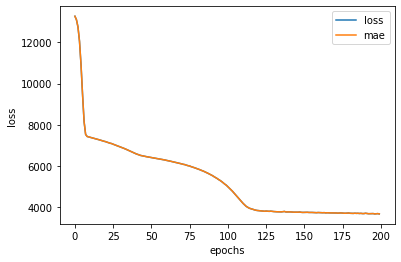

In [ ]:
#Plotting history (loss curve or training curve)

pd.DataFrame(history.history).plot()

plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend()

Preprocessing data with feature scaling part 1
(normalization and standardization)


In [ ]:
insurance = pd.read_csv('https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv')

In [ ]:
#Normalizing 
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split

#Create a column transformer
ct = make_column_transformer(
    (MinMaxScaler(), ['bmi', 'age', 'children']), #make a values in between zero and 1 
    (OneHotEncoder(handle_unknown = 'ignore'), ['sex', 'smoker', 'region']) # How to handle unknown columns

)

#Create X and y

X = insurance.drop("charges", axis = 1)
y = insurance["charges"]

# Training and Test
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 42)

#Fit the column transformer to our training
ct.fit(X_train)

#Transform train and test with MinMaxScaler
X_train_normal = ct.transform(X_train)
X_test_normal = ct.transform(X_test)

In [ ]:
#Data
X_train_normal[0] #See how it makes it between 1 and 0 

array([0.10734463, 0.60869565, 0.4       , 1.        , 0.        ,
       1.        , 0.        , 0.        , 1.        , 0.        ,
       0.        ])

In [ ]:
X_train.shape

(1070, 6)

In [ ]:
X_train_normal.shape #We added some columns because we OneHotEncoded it

(1070, 11)

 Preprocessing data with feature
scaling part 3 (fitting our model)

In [ ]:
tf.random.set_seed(42)

insurance_model_normal = tf.keras.Sequential([
  tf.keras.layers.Dense(100),
  tf.keras.layers.Dense(10),
  tf.keras.layers.Dense(1)
])

insurance_model_normal.compile(loss = tf.keras.losses.mae,
                               optimizer = tf.keras.optimizers.Adam(),
                               metrics = ["mae"])
insurance_model_normal.fit(X_train_normal, y_train, epochs = 200, verbose = 1)

Exercises

In [ ]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
#Exercise 1

X = tf.constant([[[10,9,8,7,6,5,4,3,2,1], [10,9,8,7,6,5,4,3,2,1]], [[10,9,8,7,6,5,4,3,2,1], [10,9,8,7,6,5,4,3,2,1]]], dtype= tf.float32)

y = X-10

In [ ]:
X

<tf.Tensor: shape=(2, 2, 10), dtype=float32, numpy=
array([[[10.,  9.,  8.,  7.,  6.,  5.,  4.,  3.,  2.,  1.],
        [10.,  9.,  8.,  7.,  6.,  5.,  4.,  3.,  2.,  1.]],

       [[10.,  9.,  8.,  7.,  6.,  5.,  4.,  3.,  2.,  1.],
        [10.,  9.,  8.,  7.,  6.,  5.,  4.,  3.,  2.,  1.]]],
      dtype=float32)>

In [ ]:
y

<tf.Tensor: shape=(2, 2, 10), dtype=float32, numpy=
array([[[ 0., -1., -2., -3., -4., -5., -6., -7., -8., -9.],
        [ 0., -1., -2., -3., -4., -5., -6., -7., -8., -9.]],

       [[ 0., -1., -2., -3., -4., -5., -6., -7., -8., -9.],
        [ 0., -1., -2., -3., -4., -5., -6., -7., -8., -9.]]],
      dtype=float32)>

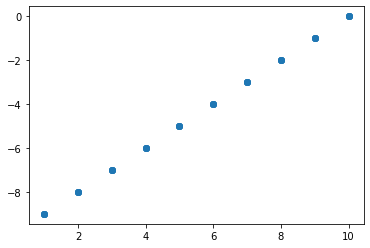

In [ ]:
plt.scatter(X,y)

In [ ]:
# Exercise 2 

tf.random.set_seed(42)

own_model = tf.keras.Sequential([
  tf.keras.layers.Dense(10),
  tf.keras.layers.Dense(1)
])

own_model.compile(loss = tf.keras.losses.mae,
                  optimizer = tf.keras.optimizers.SGD(),
                  metrics = ["mae"])

own_model.fit(X,y, epochs = 100, verbose = False)

In [ ]:
own_model.evaluate(X,y)

1/1 [==============================] - 0s 169ms/step - loss: 2.5000 - mae: 2.5000


[2.5, 2.5]

In [ ]:
tf.keras.metrics.mean_absolute_error(tf.squeeze(X),tf.squeeze(y))

<tf.Tensor: shape=(2, 2), dtype=float32, numpy=
array([[10., 10.],
       [10., 10.]], dtype=float32)>

In [ ]:
X.shape

TensorShape([2, 2, 10])

In [ ]:
y.shape

TensorShape([2, 2, 10])

In [ ]:
# Exericise 3

tf.random.set_seed(42)

insurance_model_normal_exercise = tf.keras.Sequential([
  tf.keras.layers.Dense(100, activation = 'relu'),
  tf.keras.layers.Dense(100, activation = 'relu'),
  tf.keras.layers.Dense(10, activation = 'relu'),
  tf.keras.layers.Dense(1)
])

insurance_model_normal_exercise.compile(loss = tf.keras.losses.mae, optimizer = tf.keras.optimizers.Adam(),
                                        metrics = ["mae"])

insurance_model_normal_exercise.fit(X_train_normal, y_train, epochs = 250, verbose = False)

In [ ]:
insurance_model_normal_exercise.evaluate(X_test_normal, y_test)

9/9 [==============================] - 0s 2ms/step - loss: 2495.6958 - mae: 2495.6958


[2495.69580078125, 2495.69580078125]

In [ ]:
#Exercise 4

df = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/BostonHousing.csv')

In [ ]:
df.head()

crim    zn  indus  chas    nox  ...  tax  ptratio       b  lstat  medv
0  0.00632  18.0   2.31     0  0.538  ...  296     15.3  396.90   4.98  24.0
1  0.02731   0.0   7.07     0  0.469  ...  242     17.8  396.90   9.14  21.6
2  0.02729   0.0   7.07     0  0.469  ...  242     17.8  392.83   4.03  34.7
3  0.03237   0.0   2.18     0  0.458  ...  222     18.7  394.63   2.94  33.4
4  0.06905   0.0   2.18     0  0.458  ...  222     18.7  396.90   5.33  36.2

[5 rows x 14 columns]

In [ ]:
X = df.drop("tax", axis=1)
y = df["tax"]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2)

In [ ]:
tf.random.set_seed(42)

housing_model = tf.keras.Sequential([
  tf.keras.layers.Dense(100, activation = 'relu'),
  tf.keras.layers.Dense(100, activation = 'relu'),
  tf.keras.layers.Dense(10, activation = 'relu'),
  tf.keras.layers.Dense(1)
])

housing_model.compile(loss = tf.keras.losses.mae,
                      optimizer = tf.keras.optimizers.Adam(learning_rate= 0.0001),
                      metrics = ["mae"])

history = housing_model.fit(X_train, y_train, epochs = 350, verbose = False)

Text(0.5, 0, 'Epochs')

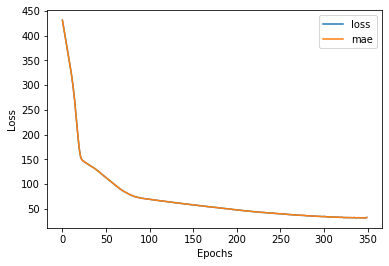

In [ ]:
pd.DataFrame(history.history).plot()
plt.ylabel("Loss")
plt.xlabel("Epochs")

In [ ]:
#for_minmax = df[["crim", "zn", "indus","chas","nox", "rm", "age", "dis","rad","ptratio", "b", "lstat", "medv"]]

ct = make_column_transformer(
    (MinMaxScaler(), ["crim", "zn", "indus","chas","nox", "rm", "age", "dis","rad","ptratio", "b", "lstat", "medv"])
)

In [ ]:
ct.fit(X_train)

X_train_normal_exercise = ct.transform(X_train)
X_test_normal_exercise = ct.transform(X_test)

In [ ]:
housing_model_normal = tf.keras.Sequential([
  tf.keras.layers.Dense(100, activation = 'relu'),
  tf.keras.layers.Dense(100, activation = 'relu'),
  tf.keras.layers.Dense(10, activation='relu'),
  tf.keras.layers.Dense(1)
])

housing_model_normal.compile(loss = tf.keras.losses.mae,
                             optimizer = tf.keras.optimizers.Adam(learning_rate=0.001),
                             metrics = ["mae"])
history = housing_model_normal.fit(X_train_normal_exercise, y_train, epochs = 350, verbose= False)

Text(0.5, 0, 'Epochs')

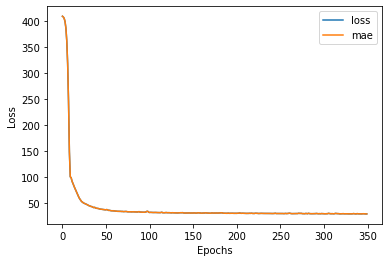

In [ ]:
pd.DataFrame(history.history).plot()
plt.ylabel("Loss")
plt.xlabel("Epochs")

# [NoteBook_02](https://colab.research.google.com/github/mrdbourke/tensorflow-deep-learning/blob/main/02_neural_network_classification_in_tensorflow.ipynb) **Neural network classification in TensorFlow**

Creating and viewing
classification data to model

In [ ]:
#Creating Data
import tensorflow as tf
from sklearn.datasets import make_circles

#Make Circles
n_samples = 1000

X,y = make_circles(n_samples, noise = 0.03, random_state = 42)

In [ ]:
#Features
X

array([[ 0.75424625,  0.23148074],
       [-0.75615888,  0.15325888],
       [-0.81539193,  0.17328203],
       ...,
       [-0.13690036, -0.81001183],
       [ 0.67036156, -0.76750154],
       [ 0.28105665,  0.96382443]])

In [ ]:
#Labels
y

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

circles = pd.DataFrame({"X0":X[:,0], "X1":X[:,1], "labels":y})
circles

X0        X1  labels
0    0.754246  0.231481       1
1   -0.756159  0.153259       1
2   -0.815392  0.173282       1
3   -0.393731  0.692883       1
4    0.442208 -0.896723       0
..        ...       ...     ...
995  0.244054  0.944125       0
996 -0.978655 -0.272373       0
997 -0.136900 -0.810012       1
998  0.670362 -0.767502       0
999  0.281057  0.963824       0

[1000 rows x 3 columns]

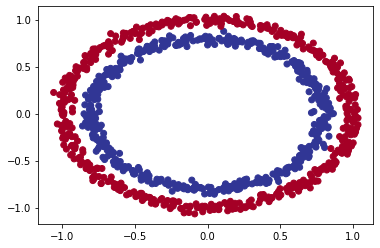

In [ ]:
# Visualize with a plot
plt.scatter(X[:,0], X[:,1],  c= y, cmap = plt.cm.RdYlBu )

Checking the input and output
shapes of our classification data

In [ ]:
X.shape, y.shape

((1000, 2), (1000,))

In [ ]:
#Length
len(X), len(y)

(1000, 1000)

In [ ]:
X[0], y[0]

(array([0.75424625, 0.23148074]), 1)

Building a not very good classification model
with TensorFlow

In [ ]:
#Model 

tf.random.set_seed(42)

model_1 = tf.keras.Sequential([
  tf.keras.layers.Dense(1)
])

model_1.compile(loss = tf.keras.losses.BinaryCrossentropy(),
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ["accuracy"])

model_1.fit(X,y, epochs = 5)

Epoch 1/5
32/32 [==============================] - 1s 1ms/step - loss: 4.2979 - accuracy: 0.4670
Epoch 2/5
32/32 [==============================] - 0s 1ms/step - loss: 4.2317 - accuracy: 0.4400
Epoch 3/5
32/32 [==============================] - 0s 1ms/step - loss: 4.1610 - accuracy: 0.4310
Epoch 4/5
32/32 [==============================] - 0s 1ms/step - loss: 4.1183 - accuracy: 0.4270
Epoch 5/5
32/32 [==============================] - 0s 1ms/step - loss: 4.0784 - accuracy: 0.4240


In [ ]:
#Lets try to improve our model by training it for longer
model_1.fit(X,y, epochs = 200, verbose = 0)
model_1.evaluate(X,y) #It is still not that good 

32/32 [==============================] - 0s 1ms/step - loss: 0.6932 - accuracy: 0.4910


[0.6931543350219727, 0.4909999966621399]

In [ ]:
#Lets add an extra layer

tf.random.set_seed(42)

model_2 = tf.keras.Sequential([
  tf.keras.layers.Dense(1),
  tf.keras.layers.Dense(1)
])

model_2.compile(loss = tf.keras.losses.BinaryCrossentropy(),
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ["accuracy"])

model_2.fit(X,y, epochs = 100, verbose = False)

In [ ]:
model_2.evaluate(X,y)

32/32 [==============================] - 0s 1ms/step - loss: 0.7178 - accuracy: 0.4860


[0.7177660465240479, 0.4860000014305115]

Trying to improve our not very
good classification model

In [ ]:
tf.random.set_seed(42)

model_3 = tf.keras.Sequential([
  tf.keras.layers.Dense(100),
  tf.keras.layers.Dense(10),
  tf.keras.layers.Dense(1)
])

model_3.compile(loss = tf.keras.losses.BinaryCrossentropy(),
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ["accuracy"])

model_3.fit(X,y, epochs = 100, verbose = False)

In [ ]:
model_3.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 100)               300       
_________________________________________________________________
dense_4 (Dense)              (None, 10)                1010      
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 11        
Total params: 1,321
Trainable params: 1,321
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model_3.evaluate(X,y)

32/32 [==============================] - 0s 1ms/step - loss: 0.6980 - accuracy: 0.5080


[0.6980254650115967, 0.5080000162124634]

Creating a function to view our
model's not so good predictions

In [ ]:
import numpy as np

def plot_decision_boundary(model, X,y):
  #Define a the axis boudaries and create a meshgrid
  x_min, x_max = X[:,0].min() - 0.1, X[:,0].max()+0.1
  y_min, y_max = X[:,1].min() - 0.1, X[:,1].max()+0.1

  xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), 
                       np.linspace(y_min, y_max, 100))
  
  #Make X values 
  X_in = np.c_[xx.ravel(), yy.ravel()] #Stack 2d arrays together

  #Make prediction 
  y_pred = model.predict(X_in)

  # if it is binary or multi-class

  if len(y_pred[0]) >1:
    #We have to reshape
    print('Multi-Class')

    y_pred = np.argmax(y_pred, axis = 1).reshape(xx.shape)

  else:
    print('Doing Binary')
    y_pred = np.round(y_pred).reshape(xx.shape)

  plt.contourf(xx, yy, y_pred, cmap = plt.cm.RdYlBu, alpha = 0.7)
  plt.scatter(X[:,0], X[:,1], c = y, s = 40, cmap = plt.cm.RdYlBu)
  plt.xlim(xx.min(), xx.max())
  plt.ylim(yy.min(), yy.max())

Doing Binary


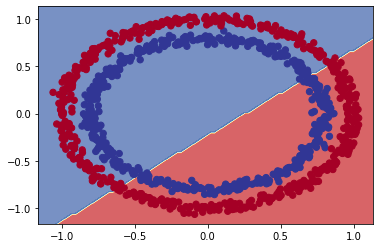

In [ ]:
plot_decision_boundary(model_3, X,y)

Make our poor classification model work for a regression dataset

In [ ]:
tf.random.set_seed(42)

#Create Regrsession Data
X_regression = tf.range(0,1000, 5)
y_regression = tf.range(100, 1100,5) # y = X+100


X_regression, y_regression

(<tf.Tensor: shape=(200,), dtype=int32, numpy=
 array([  0,   5,  10,  15,  20,  25,  30,  35,  40,  45,  50,  55,  60,
         65,  70,  75,  80,  85,  90,  95, 100, 105, 110, 115, 120, 125,
        130, 135, 140, 145, 150, 155, 160, 165, 170, 175, 180, 185, 190,
        195, 200, 205, 210, 215, 220, 225, 230, 235, 240, 245, 250, 255,
        260, 265, 270, 275, 280, 285, 290, 295, 300, 305, 310, 315, 320,
        325, 330, 335, 340, 345, 350, 355, 360, 365, 370, 375, 380, 385,
        390, 395, 400, 405, 410, 415, 420, 425, 430, 435, 440, 445, 450,
        455, 460, 465, 470, 475, 480, 485, 490, 495, 500, 505, 510, 515,
        520, 525, 530, 535, 540, 545, 550, 555, 560, 565, 570, 575, 580,
        585, 590, 595, 600, 605, 610, 615, 620, 625, 630, 635, 640, 645,
        650, 655, 660, 665, 670, 675, 680, 685, 690, 695, 700, 705, 710,
        715, 720, 725, 730, 735, 740, 745, 750, 755, 760, 765, 770, 775,
        780, 785, 790, 795, 800, 805, 810, 815, 820, 825, 830, 835, 840,
    

In [ ]:
#Split our data into train and test

X_reg_train = X_regression[:150]
X_reg_test = X_regression[150:]

y_reg_train = y_regression[:150]
y_reg_test = y_regression[150:]

In [ ]:
#Fit our model
model_3.fit(X_reg_train, y_reg_train, epochs = 100, verbose = False)

ValueError: ignored

In [ ]:
#We need to change the loss function

tf.random.set_seed(42)

model_4 = tf.keras.Sequential([
  tf.keras.layers.Dense(100),
  tf.keras.layers.Dense(10),
  tf.keras.layers.Dense(1)
])

model_4.compile(loss = tf.keras.losses.mae,
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ["mae"])

model_4.fit(X_reg_train, y_reg_train, epochs = 100, verbose = False)

In [ ]:
y_reg_pred = model_4.predict(X_reg_test) # Models Predictions

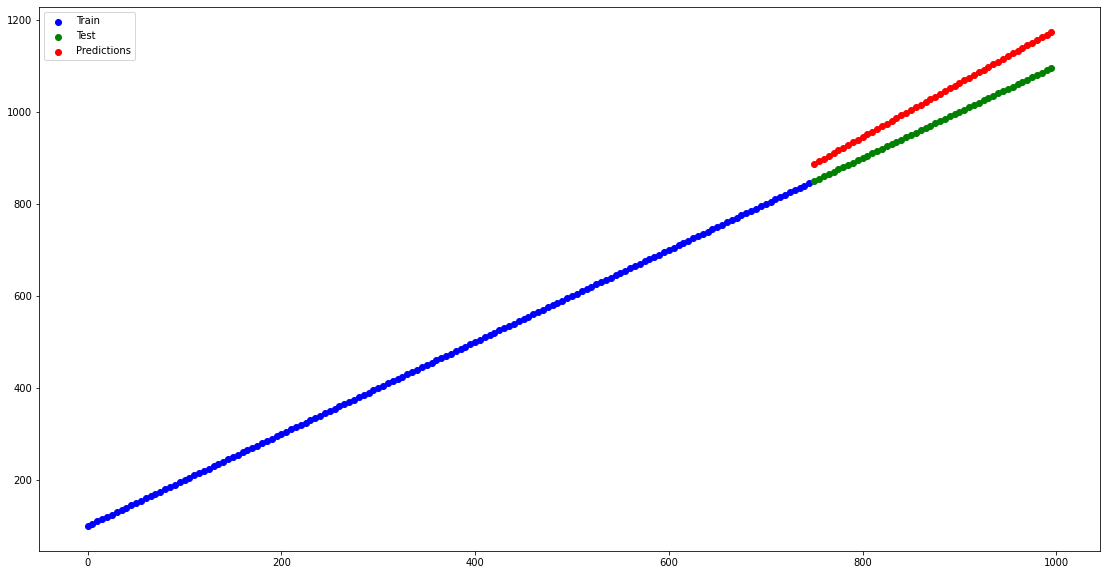

In [ ]:
plt.figure(figsize=(19, 10))
plt.scatter(X_reg_train, y_reg_train, c = 'b', label = "Train")
plt.scatter(X_reg_test, y_reg_test, c = 'g', label = "Test")
plt.scatter(X_reg_test, y_reg_pred, c = 'r', label = "Predictions")
plt.legend();

Non-linearity - Straight lines and non-straight lines

In [ ]:
#Set the random seed
tf.random.set_seed(42)

model_5 = tf.keras.Sequential([
  tf.keras.layers.Dense(1, activation = 'linear')
])

model_5.compile(loss = "binary_crossentropy",
                optimizer = tf.keras.optimizers.Adam(lr = 0.0001),
                metrics = ["accuracy"])

history = model_5.fit(X,y, epochs = 100, verbose = False)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


Doing Binary


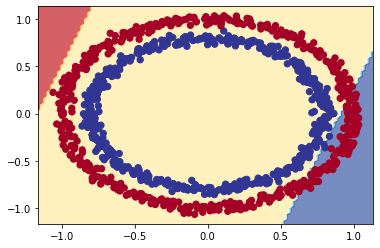

In [ ]:
#Check the decision bourdaries for our model

plot_decision_boundary(model_5, X, y)

In [ ]:
#Using ReLu (for relu)

tf.random.set_seed(42)

model_6 = tf.keras.Sequential([
  tf.keras.layers.Dense(1, activation = tf.keras.activations.relu,)
])

model_6.compile(loss = tf.keras.losses.binary_crossentropy,
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ['accuracy'])

history = model_6.fit(X,y, epochs = 100)

Epoch 1/100
32/32 [==============================] - 0s 1ms/step - loss: 4.2979 - accuracy: 0.4670
Epoch 2/100
32/32 [==============================] - 0s 1ms/step - loss: 4.2317 - accuracy: 0.4400
Epoch 3/100
32/32 [==============================] - 0s 1ms/step - loss: 4.1610 - accuracy: 0.4310
Epoch 4/100
32/32 [==============================] - 0s 1ms/step - loss: 4.1183 - accuracy: 0.4270
Epoch 5/100
32/32 [==============================] - 0s 1ms/step - loss: 4.0784 - accuracy: 0.4240
Epoch 6/100
32/32 [==============================] - 0s 1ms/step - loss: 3.9604 - accuracy: 0.4170
Epoch 7/100
32/32 [==============================] - 0s 1ms/step - loss: 3.8936 - accuracy: 0.4110
Epoch 8/100
32/32 [==============================] - 0s 1ms/step - loss: 3.7818 - accuracy: 0.4140
Epoch 9/100
32/32 [==============================] - 0s 1ms/step - loss: 3.7564 - accuracy: 0.4140
Epoch 10/100
32/32 [==============================] - 0s 1ms/step - loss: 3.7547 - accuracy: 0.4150
Epoch 11/

Doing Binary


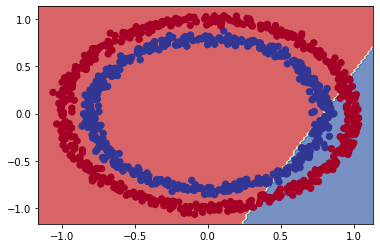

In [ ]:
plot_decision_boundary(model_6, X,y)
#Still not good, lets add nuerons and layers and change the activation function

In [ ]:
tf.random.set_seed(42)

model_7 = tf.keras.Sequential([
  tf.keras.layers.Dense(4, activation = 'relu'),
  tf.keras.layers.Dense(4, activation = 'relu')
])

model_7.compile(loss = tf.keras.losses.BinaryCrossentropy(),
                optimizer = tf.keras.optimizers.Adam(lr= 0.001),
                metrics = ["accuracy"])

history = model_7.fit(X,y, epochs = 100, verbose = False)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [ ]:
model_7.evaluate(X,y)

32/32 [==============================] - 0s 1ms/step - loss: 0.6643 - accuracy: 0.3780


[0.6642990708351135, 0.3779999911785126]

Multi-Class


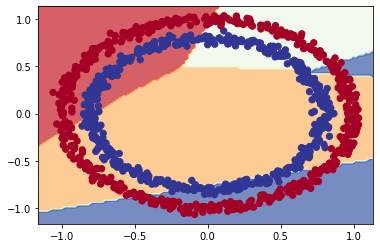

In [ ]:
plot_decision_boundary(model_7, X,y)

In [ ]:
#Changing the activation function for the output layer

tf.random.set_seed(42)

model_8 = tf.keras.Sequential([
  tf.keras.layers.Dense(4, activation='relu'),
  tf.keras.layers.Dense(4, activation='relu'),
  tf.keras.layers.Dense(1, activation="sigmoid")
])

model_8.compile(loss = "binary_crossentropy",
                optimizer = "Adam",
                metrics = ["accuracy"])

history = model_8.fit(X,y, epochs = 100)

Epoch 1/100
32/32 [==============================] - 0s 1ms/step - loss: 0.6891 - accuracy: 0.5020
Epoch 2/100
32/32 [==============================] - 0s 1ms/step - loss: 0.6848 - accuracy: 0.5170
Epoch 3/100
32/32 [==============================] - 0s 1ms/step - loss: 0.6824 - accuracy: 0.5160
Epoch 4/100
32/32 [==============================] - 0s 1ms/step - loss: 0.6813 - accuracy: 0.5300
Epoch 5/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6802 - accuracy: 0.5390
Epoch 6/100
32/32 [==============================] - 0s 1ms/step - loss: 0.6794 - accuracy: 0.5380
Epoch 7/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6785 - accuracy: 0.5500
Epoch 8/100
32/32 [==============================] - 0s 1ms/step - loss: 0.6778 - accuracy: 0.5480
Epoch 9/100
32/32 [==============================] - 0s 1ms/step - loss: 0.6772 - accuracy: 0.5530
Epoch 10/100
32/32 [==============================] - 0s 1ms/step - loss: 0.6766 - accuracy: 0.5510
Epoch 11/

In [ ]:
model_8.evaluate(X,y)

32/32 [==============================] - 0s 1ms/step - loss: 0.2948 - accuracy: 0.9910


[0.2948004901409149, 0.9909999966621399]

Doing Binary


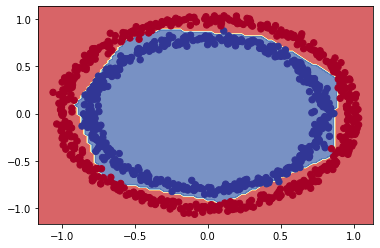

In [ ]:
plot_decision_boundary(model_8, X,y)

Seeing our activation functions in action on there own 

In [ ]:
#Toy tensor
A = tf.cast(tf.range(-10,10), tf.float32)
A

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,
         1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.],
      dtype=float32)>

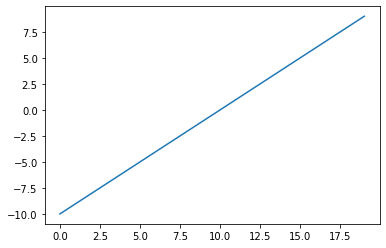

In [ ]:
#Visualize 
plt.plot(A) #Linear 

In [ ]:
#Lets start by replicating sigmoid

def sigmoid(x):
  return 1/(1+tf.exp(-x))

In [ ]:
#Use our sigmoid function
sigmoid(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([4.5397872e-05, 1.2339458e-04, 3.3535014e-04, 9.1105117e-04,
       2.4726233e-03, 6.6928510e-03, 1.7986210e-02, 4.7425874e-02,
       1.1920292e-01, 2.6894143e-01, 5.0000000e-01, 7.3105860e-01,
       8.8079703e-01, 9.5257413e-01, 9.8201376e-01, 9.9330717e-01,
       9.9752742e-01, 9.9908900e-01, 9.9966466e-01, 9.9987662e-01],
      dtype=float32)>

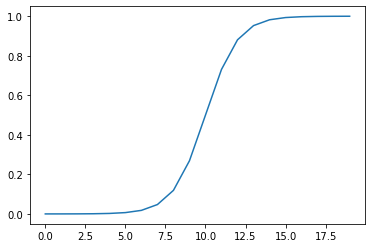

In [ ]:
plt.plot(sigmoid(A))

In [ ]:
#Lets recreate the relu function
def relu(x):
  return tf.maximum(x,0)

In [ ]:
relu(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 2., 3., 4., 5., 6.,
       7., 8., 9.], dtype=float32)>

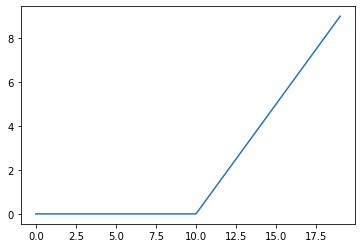

In [ ]:
plt.plot(relu(A))

In [ ]:
#Lets try the linear activation function
tf.keras.activations.linear(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,
         1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.],
      dtype=float32)>

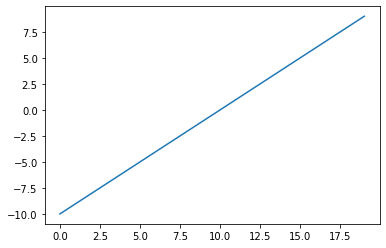

In [ ]:
plt.plot(tf.keras.activations.linear(A))

Getting great results in less time by tweaking the learning rate

In [ ]:
len(X)

1000

In [ ]:
len(y)

1000

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2)

In [ ]:
X_train.shape, X_test.shape

((800, 2), (200, 2))

In [ ]:
y_train.shape, y_test.shape

((800,), (200,))

In [ ]:
tf.random.set_seed(42)

model_9 = tf.keras.Sequential([
 tf.keras.layers.Dense(4, activation='relu'),
 tf.keras.layers.Dense(4, activation = 'relu'),
 tf.keras.layers.Dense(1, activation='sigmoid')])

model_9.compile(loss = 'binary_crossentropy',
                optimizer = tf.keras.optimizers.Adam(learning_rate=0.01), #how to improve the loss
                metrics = ["accuracy"])


history = model_9.fit(X_train, y_train, epochs = 25,  verbose = False)

In [ ]:
model_9.evaluate(X_test, y_test)

7/7 [==============================] - 0s 2ms/step - loss: 0.1415 - accuracy: 0.9700


[0.14146600663661957, 0.9700000286102295]

Doing Binary
Doing Binary


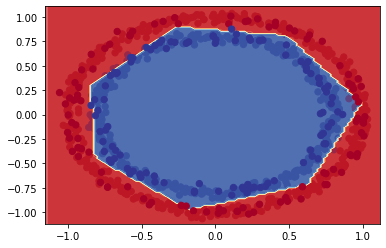

In [ ]:
plot_decision_boundary(model_9, X_train, y_train)
plot_decision_boundary(model_9, X_test, y_test)

Using the TensorFlow History object to plot a model's loss curves

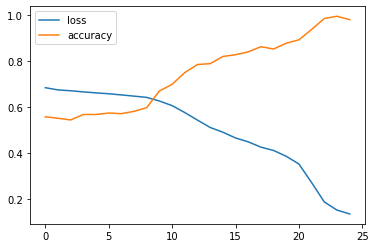

In [ ]:
pd.DataFrame(history.history).plot() # the history function is the numbers that the model stores like the loss and accuracy

Using callbacks to find a model's ideal learning rate


In [ ]:
# Create a new model

tf.random.set_seed(42)

model_10 = tf.keras.Sequential([
  tf.keras.layers.Dense(4, activation= 'relu'),
  tf.keras.layers.Dense(4, activation= 'relu'),
  tf.keras.layers.Dense(1, activation='sigmoid')                              
])

model_10.compile(loss = 'binary_crossentropy',
                 optimizer = 'Adam',
                 metrics = ["accuracy"])
#Create a learning rate callback
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4 * 10 ** (epoch/20)) #Lambda just says do this quickly

history = model_10.fit(X_train, y_train, epochs = 100, callbacks=[lr_scheduler])

Epoch 1/100
25/25 [==============================] - 0s 1ms/step - loss: 0.6904 - accuracy: 0.5013
Epoch 2/100
25/25 [==============================] - 0s 1ms/step - loss: 0.6898 - accuracy: 0.5025
Epoch 3/100
25/25 [==============================] - 0s 1ms/step - loss: 0.6892 - accuracy: 0.5038
Epoch 4/100
25/25 [==============================] - 0s 1ms/step - loss: 0.6886 - accuracy: 0.5075
Epoch 5/100
25/25 [==============================] - 0s 1ms/step - loss: 0.6879 - accuracy: 0.5113
Epoch 6/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6872 - accuracy: 0.5150
Epoch 7/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6864 - accuracy: 0.5125
Epoch 8/100
25/25 [==============================] - 0s 1ms/step - loss: 0.6857 - accuracy: 0.5188
Epoch 9/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6849 - accuracy: 0.5175
Epoch 10/100
25/25 [==============================] - 0s 1ms/step - loss: 0.6842 - accuracy: 0.5150
Epoch 11/

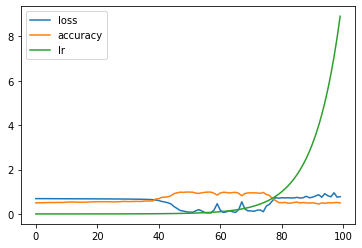

In [ ]:
pd.DataFrame(history.history).plot()

In [ ]:
#Plot the learning rate to loss
lrs = 1e-4 * (10**(tf.range(100)/20))

In [ ]:
len(lrs)

100

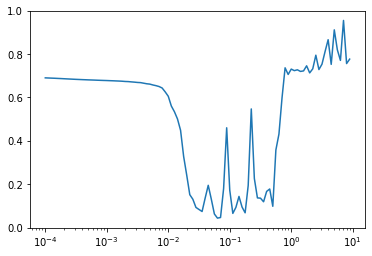

In [ ]:
plt.semilogx(lrs, history.history["loss"]) #plots the x axis with log (khan academy), best learning rate is where the line in the lowest

Training and evaluating a model with an ideal learning rate

In [ ]:
# We will use 0.02 learning rate, since that is where the graph is dipping

tf.random.set_seed(42)

model_11 = tf.keras.Sequential([
  tf.keras.layers.Dense(4, activation = 'relu'),
  tf.keras.layers.Dense(4, activation='relu'),
  tf.keras.layers.Dense(1, activation= 'sigmoid')
])

model_11.compile(loss = 'binary_crossentropy',
              optimizer = tf.keras.optimizers.Adam(learning_rate=  0.02),
              metrics = ["accuracy"])

history = model_11.fit(X_train, y_train,epochs = 20)

Epoch 1/20
25/25 [==============================] - 0s 1ms/step - loss: 0.6837 - accuracy: 0.5600
Epoch 2/20
25/25 [==============================] - 0s 2ms/step - loss: 0.6733 - accuracy: 0.5512
Epoch 3/20
25/25 [==============================] - 0s 1ms/step - loss: 0.6634 - accuracy: 0.5525
Epoch 4/20
25/25 [==============================] - 0s 1ms/step - loss: 0.6509 - accuracy: 0.6338
Epoch 5/20
25/25 [==============================] - 0s 1ms/step - loss: 0.6274 - accuracy: 0.6463
Epoch 6/20
25/25 [==============================] - 0s 1ms/step - loss: 0.6064 - accuracy: 0.6913
Epoch 7/20
25/25 [==============================] - 0s 1ms/step - loss: 0.5414 - accuracy: 0.7362
Epoch 8/20
25/25 [==============================] - 0s 2ms/step - loss: 0.4379 - accuracy: 0.8413
Epoch 9/20
25/25 [==============================] - 0s 1ms/step - loss: 0.3128 - accuracy: 0.9550
Epoch 10/20
25/25 [==============================] - 0s 1ms/step - loss: 0.2089 - accuracy: 0.9900
Epoch 11/20
25/25 [

In [ ]:
model_11.evaluate(X_test, y_test)

7/7 [==============================] - 0s 2ms/step - loss: 0.0334 - accuracy: 0.9950


[0.03337943181395531, 0.9950000047683716]

Doing Binary
Doing Binary


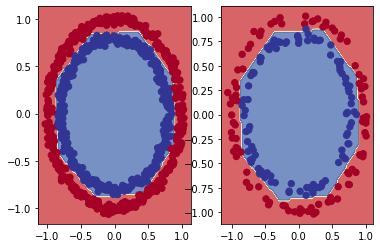

In [ ]:
#Plot the decision boundaries
plt.subplot(1,2,1) #1 row, 2 columns, first graph
plot_decision_boundary(model_11, X_train, y_train)
plt.subplot(1,2,2) #1 row, 2 columns, second graph
plot_decision_boundary(model_11, X_test, y_test)

Finding the accuracy of our classification model

In [ ]:
#Alongside visualizing our model, we can also use evaluation metrics

#Check accuarcy
loss, accuracy = model_11.evaluate(X_test, y_test)

print (f"Model train:{loss}")
print (f"Model Test:{accuracy}")

7/7 [==============================] - 0s 2ms/step - loss: 0.0334 - accuracy: 0.9950
Model train:0.03337943181395531
Model Test:0.9950000047683716


Creating our first confusion matrix (to see where our model is getting confused)

In [ ]:
from sklearn.metrics import confusion_matrix

#Make predictions 
y_preds = model_11.predict(X_test)

#Create our confusion matrix
confusion_matrix(y_test, y_preds)

ValueError: ignored

In [ ]:
y_test #test is in binary form

In [ ]:
y_preds #Predictions are not in zero or one form

In [ ]:
#We need to covert our predictions to 1 and 0's
tf.round(y_preds)[10:]

<tf.Tensor: shape=(190, 1), dtype=float32, numpy=
array([[1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
 

In [ ]:
confusion_matrix(y_test, tf.round(y_preds))

array([[ 98,   0],
       [  1, 101]])

Making our confusion matrix prettier

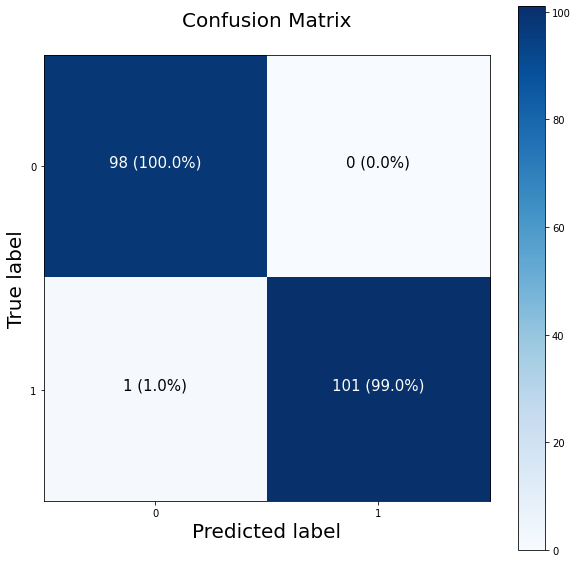

In [ ]:
#Function
import itertools
figsize = (10, 10)

# Create the confusion matrix
cm = confusion_matrix(y_test, tf.round(y_preds))
cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis] # normalize it
n_classes = cm.shape[0]

# Let's prettify it
fig, ax = plt.subplots(figsize=figsize)
# Create a matrix plot
cax = ax.matshow(cm, cmap=plt.cm.Blues) # https://matplotlib.org/3.2.0/api/_as_gen/matplotlib.axes.Axes.matshow.html
fig.colorbar(cax)

# Create classes
classes = False

if classes:
  labels = classes
else:
  labels = np.arange(cm.shape[0])

# Label the axes
ax.set(title="Confusion Matrix",
       xlabel="Predicted label",
       ylabel="True label",
       xticks=np.arange(n_classes),
       yticks=np.arange(n_classes),
       xticklabels=labels,
       yticklabels=labels)

# Set x-axis labels to bottom
ax.xaxis.set_label_position("bottom")
ax.xaxis.tick_bottom()

# Adjust label size
ax.xaxis.label.set_size(20)
ax.yaxis.label.set_size(20)
ax.title.set_size(20)

# Set threshold for different colors
threshold = (cm.max() + cm.min()) / 2.

# Plot the text on each cell
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
  plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)",
           horizontalalignment="center",
           color="white" if cm[i, j] > threshold else "black",
           size=15)

Putting things together with multi-class classification part 1: Getting the data

In [ ]:
#When you have more than 2 classes it is known as mutliclass classification
# we will use the mnist fashion dataset
from tensorflow.keras.datasets import fashion_mnist

# Already in train and test 
(train_data, train_labels), (test_data, test_labels) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [ ]:
#Showing the first training example
print(f"Training sample:\n {train_data[0]}\n")
print(f"Training labels:\n {train_labels[0]}\n")
#Num 9 is ankle boot

Training sample:
 [[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1 

In [ ]:
#Check the shape
train_data[0].shape, train_labels[0].shape

((28, 28), ())

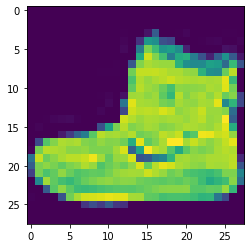

In [ ]:
#Get Visual (plot)
plt.imshow(train_data[0])

In [ ]:
#Check our samples label
train_labels[0]

9

Multi-class classification part 2: Becoming one with the data

In [ ]:
#create a small list so we can index onto our training labels so they are human readable
class_names = class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
len(class_names)

10

Text(0.5, 1.0, 'T-shirt/top')

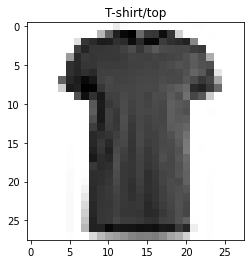

In [ ]:
#Plot an example image and its label
plt.imshow(train_data[17], cmap= plt.cm.binary)
plt.title(class_names[train_labels[17]])

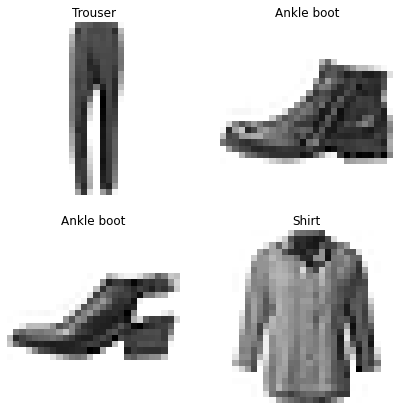

In [ ]:
#Plot multiple random images of the dataset 
import random
plt.figure(figsize=(7,7))

for i in range(4):
  ax = plt.subplot(2,2,i+1)
  rand_index=  random.choice(range(len(train_data)))
  plt.imshow(train_data[rand_index], cmap=plt.cm.binary)
  plt.title(class_names[train_labels[rand_index]])
  plt.axis(False)

Multi-class classification part 3: Building a multi-class classification model

In [ ]:
#For a multi-class model we can use a simular architecture, but we will need to change the, input shape, loss to categorical_crossentorpy, and the output shape is one per class
tf.random.set_seed(42)

model_12 = tf.keras.Sequential([ #our data needs to be flatten from 28*28 to (none, 784)
  tf.keras.layers.Flatten(input_shape = (28,28)),                              
  tf.keras.layers.Dense(4, activation = 'relu'),
  tf.keras.layers.Dense(4, activation = 'relu'),
  tf.keras.layers.Dense(10, activation = 'softmax')
])

model_12.compile(loss = tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer = 'Adam',
                 metrics = ["accuracy"])

non_norm_history = model_12.fit(train_data, train_labels, 
                                epochs = 10, validation_data = (test_data, test_labels))


#If your labels are one_hot encoded use categorical crossentropy if they are not use Sparse Categorical Entropy

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 2.1671 - accuracy: 0.1606 - val_loss: 1.7959 - val_accuracy: 0.2046
Epoch 2/10
1875/1875 [==============================] - 3s 2ms/step - loss: 1.7066 - accuracy: 0.2509 - val_loss: 1.6567 - val_accuracy: 0.2805
Epoch 3/10
1875/1875 [==============================] - 3s 2ms/step - loss: 1.6321 - accuracy: 0.2806 - val_loss: 1.6094 - val_accuracy: 0.2857
Epoch 4/10
1875/1875 [==============================] - 3s 1ms/step - loss: 1.6052 - accuracy: 0.2833 - val_loss: 1.6041 - val_accuracy: 0.2859
Epoch 5/10
1875/1875 [==============================] - 3s 2ms/step - loss: 1.5975 - accuracy: 0.2862 - val_loss: 1.6064 - val_accuracy: 0.2756
Epoch 6/10
1875/1875 [==============================] - 3s 2ms/step - loss: 1.5950 - accuracy: 0.2920 - val_loss: 1.5747 - val_accuracy: 0.2994
Epoch 7/10
1875/1875 [==============================] - 3s 2ms/step - loss: 1.5775 - accuracy: 0.3040 - val_loss: 1.6030 - val_accuracy:

Multi-class classification part 4: Improving performance with normalisation

In [ ]:
#Normalization is best for NN's so we can divide all our data by the max number
train_data.min(), train_data.max()

(0, 255)

In [ ]:
train_data_norm = train_data/255.0
test_data_norm = test_data/255.0

#Check min and max

train_data_norm.min(), train_data_norm.max()

(0.0, 1.0)

In [ ]:
tf.random.set_seed(42)

model_13 = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape = (28,28)),
  tf.keras.layers.Dense(4, activation = 'relu'),
  tf.keras.layers.Dense(4, activation='relu'),
  tf.keras.layers.Dense(10, activation='softmax')                                
])

model_13.compile(loss = tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer = 'Adam',
                 metrics = ["accuracy"])

norm_history = model_13.fit(train_data_norm, train_labels,
                            epochs = 10, 
                            validation_data = (test_data_norm, test_labels))

Epoch 1/10
1875/1875 [==============================] - 3s 2ms/step - loss: 1.0348 - accuracy: 0.6474 - val_loss: 0.6937 - val_accuracy: 0.7617
Epoch 2/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.6376 - accuracy: 0.7757 - val_loss: 0.6400 - val_accuracy: 0.7820
Epoch 3/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.5942 - accuracy: 0.7914 - val_loss: 0.6247 - val_accuracy: 0.7783
Epoch 4/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.5750 - accuracy: 0.7979 - val_loss: 0.6078 - val_accuracy: 0.7881
Epoch 5/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.5641 - accuracy: 0.8006 - val_loss: 0.6169 - val_accuracy: 0.7881
Epoch 6/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5544 - accuracy: 0.8043 - val_loss: 0.5855 - val_accuracy: 0.7951
Epoch 7/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5488 - accuracy: 0.8063 - val_loss: 0.6097 - val_accuracy:

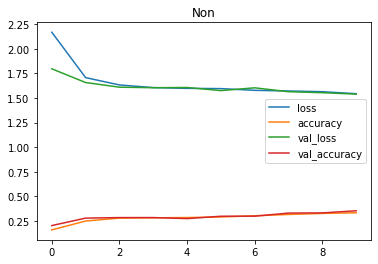

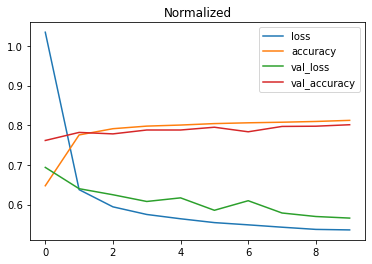

In [ ]:
pd.DataFrame(non_norm_history.history).plot(title = 'Non')
pd.DataFrame(norm_history.history).plot(title = 'Normalized')

Multi-class classification part 6: Finding the ideal learning rate

In [ ]:
#We can use tf.keras.callbacks.LearningRateScheduler

tf.random.set_seed(42)

model_14 = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape = (28,28)),
  tf.keras.layers.Dense(4, activation = 'relu'),
  tf.keras.layers.Dense(4, activation = 'relu'),
  tf.keras.layers.Dense(10, activation = 'softmax')
])

model_14.compile(loss = tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer = 'Adam',
                 metrics = ["accuracy"])

lr = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-3*10**(epoch/20))

fit_lr_history = model_14.fit(train_data_norm, train_labels,
                              epochs = 40, 
                              validation_data = (test_data_norm, test_labels),
                              callbacks = [lr])

Epoch 1/40
1875/1875 [==============================] - 3s 2ms/step - loss: 1.0348 - accuracy: 0.6474 - val_loss: 0.6937 - val_accuracy: 0.7617
Epoch 2/40
1875/1875 [==============================] - 3s 1ms/step - loss: 0.6366 - accuracy: 0.7759 - val_loss: 0.6400 - val_accuracy: 0.7808
Epoch 3/40
1875/1875 [==============================] - 3s 1ms/step - loss: 0.5934 - accuracy: 0.7911 - val_loss: 0.6278 - val_accuracy: 0.7770
Epoch 4/40
1875/1875 [==============================] - 3s 1ms/step - loss: 0.5749 - accuracy: 0.7969 - val_loss: 0.6122 - val_accuracy: 0.7871
Epoch 5/40
1875/1875 [==============================] - 3s 1ms/step - loss: 0.5655 - accuracy: 0.7987 - val_loss: 0.6061 - val_accuracy: 0.7913
Epoch 6/40
1875/1875 [==============================] - 3s 1ms/step - loss: 0.5569 - accuracy: 0.8022 - val_loss: 0.5917 - val_accuracy: 0.7940
Epoch 7/40
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5542 - accuracy: 0.8036 - val_loss: 0.5898 - val_accuracy:

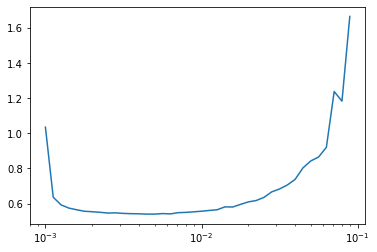

In [ ]:
#Plot lr decay curve

lrs = 1e-3*(10**(tf.range(40)/ 20))
plt.semilogx(lrs, fit_lr_history.history["loss"])

In [ ]:
10**-3

0.001

In [ ]:
tf.random.set_seed(42)

model_15 = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape = (28,28)),
  tf.keras.layers.Dense(4, activation='relu'),
  tf.keras.layers.Dense(4, activation = 'relu'),
  tf.keras.layers.Dense(10, activation = 'softmax')
])

model_15.compile(loss = tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer = tf.keras.optimizers.Adam(learning_rate=0.001),
                 metrics = ["accuracy"])

history_lr = model_15.fit(train_data_norm,
             train_labels, epochs = 20, 
             validation_data = (test_data_norm, test_labels))

Epoch 1/20
1875/1875 [==============================] - 3s 2ms/step - loss: 1.0348 - accuracy: 0.6474 - val_loss: 0.6937 - val_accuracy: 0.7617
Epoch 2/20
1875/1875 [==============================] - 3s 1ms/step - loss: 0.6376 - accuracy: 0.7757 - val_loss: 0.6400 - val_accuracy: 0.7820
Epoch 3/20
1875/1875 [==============================] - 3s 1ms/step - loss: 0.5942 - accuracy: 0.7914 - val_loss: 0.6247 - val_accuracy: 0.7783
Epoch 4/20
1875/1875 [==============================] - 3s 1ms/step - loss: 0.5750 - accuracy: 0.7979 - val_loss: 0.6078 - val_accuracy: 0.7881
Epoch 5/20
1875/1875 [==============================] - 3s 1ms/step - loss: 0.5641 - accuracy: 0.8006 - val_loss: 0.6169 - val_accuracy: 0.7881
Epoch 6/20
1875/1875 [==============================] - 3s 1ms/step - loss: 0.5544 - accuracy: 0.8043 - val_loss: 0.5855 - val_accuracy: 0.7951
Epoch 7/20
1875/1875 [==============================] - 3s 1ms/step - loss: 0.5488 - accuracy: 0.8063 - val_loss: 0.6097 - val_accuracy:

Multi-class classification part 7: Evaluating our model

In [ ]:
#To evaluate our multi-class model, we can visualize, confusion matrix
#Confusion Matrix
import numpy as np
from sklearn.metrics import confusion_matrix
import itertools

#Function
def make_confusion_matrix(y_true, y_pred, classes = None, figsize = (10,10), text_size = 15):

  # Create the confusion matrix
  cm = confusion_matrix(y_true, tf.round(y_pred))
  cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis] # normalize it
  n_classes = cm.shape[0]

  # Let's prettify it
  fig, ax = plt.subplots(figsize=figsize)
  # Create a matrix plot
  cax = ax.matshow(cm, cmap=plt.cm.Blues) # https://matplotlib.org/3.2.0/api/_as_gen/matplotlib.axes.Axes.matshow.html
  fig.colorbar(cax)

  # Set labels to be classes
  

  if classes:
    labels = classes
  else:
    labels = np.arange(cm.shape[0])

  # Label the axes
  ax.set(title="Confusion Matrix",
        xlabel="Predicted label",
        ylabel="True label",
        xticks=np.arange(n_classes),
        yticks=np.arange(n_classes),
        xticklabels=labels,
        yticklabels=labels)

  # Set x-axis labels to bottom
  ax.xaxis.set_label_position("bottom")
  ax.xaxis.tick_bottom()

  # Adjust label size
  ax.xaxis.label.set_size(text_size)
  ax.yaxis.label.set_size(text_size)
  ax.title.set_size(text_size)

  # Set threshold for different colors
  threshold = (cm.max() + cm.min()) / 2.

  # Plot the text on each cell
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)",
            horizontalalignment="center",
            color="white" if cm[i, j] > threshold else "black",
            size=text_size)

In [ ]:
#Make some predictions
y_probs = model_14.predict(test_data_norm)
y_probs

array([[1.23700361e-16, 2.21309920e-26, 5.23824095e-10, ...,
        1.93322197e-01, 1.36831818e-06, 8.06532264e-01],
       [7.78019428e-02, 1.22096231e-02, 1.29384771e-01, ...,
        1.24226704e-01, 1.40401483e-01, 1.41070327e-02],
       [1.37365669e-01, 3.50289464e-01, 3.10062505e-02, ...,
        2.04860349e-03, 1.17247123e-02, 1.42814199e-04],
       ...,
       [7.78019428e-02, 1.22096231e-02, 1.29384771e-01, ...,
        1.24226704e-01, 1.40401483e-01, 1.41070327e-02],
       [1.37365669e-01, 3.50289464e-01, 3.10062505e-02, ...,
        2.04860349e-03, 1.17247123e-02, 1.42814199e-04],
       [7.78019428e-02, 1.22096231e-02, 1.29384771e-01, ...,
        1.24226704e-01, 1.40401483e-01, 1.41070327e-02]], dtype=float32)

In [ ]:
y_preds = y_probs.argmax(axis = -1)
y_preds[:10]

array([9, 5, 1, 1, 5, 1, 1, 5, 5, 5])

Multi-class classification part 8: Creating a confusion matrix

In [ ]:
confusion_matrix(y_true =test_labels, y_pred = y_preds)

array([[  0, 487,   0,   0,   1, 512,   0,   0,   0,   0],
       [  0, 951,   0,   1,   0,  48,   0,   0,   0,   0],
       [  0,  81,   0,   0,   0, 919,   0,   0,   0,   0],
       [  0, 815,   0,   2,   1, 182,   0,   0,   0,   0],
       [  0, 210,   0,   1,   0, 789,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0, 915,   0,  41,   0,  44],
       [  0, 257,   0,   0,   0, 743,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0, 888,   0,  41,   0,  71],
       [  0,  17,   0,   0,   0, 982,   0,   0,   0,   1],
       [  0,   0,   0,   0,   0,  91,   0,  39,   0, 870]])

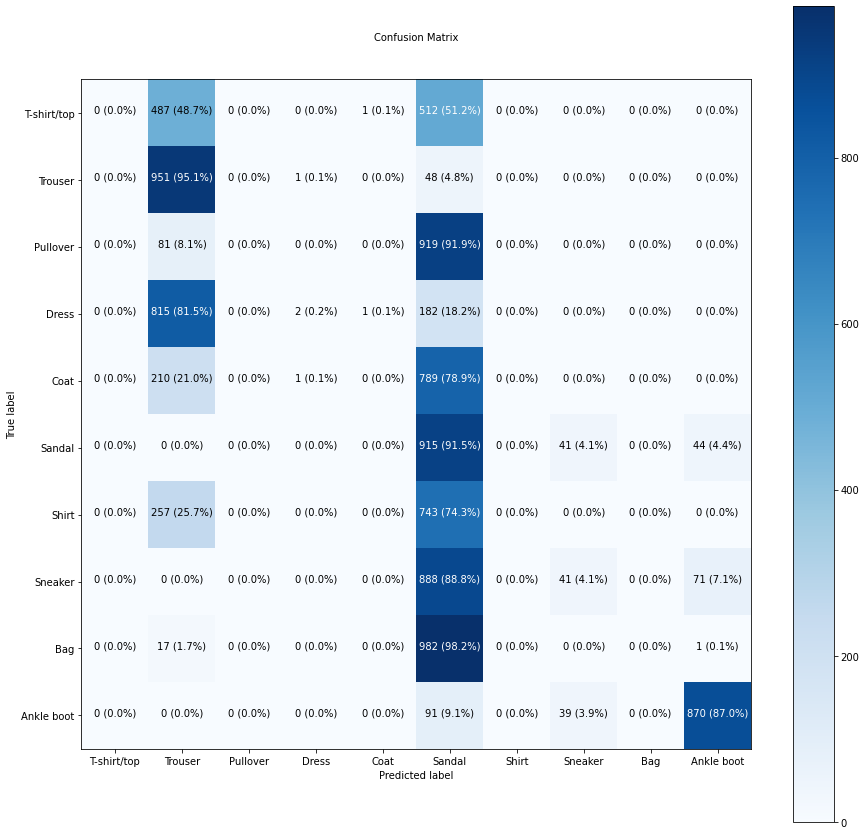

In [ ]:
make_confusion_matrix(test_labels, y_preds, classes = class_names, figsize = (15,15), text_size = 10)

Multi-class classification part 9: Visualising random model predictions

In [ ]:
#Create a random predicitions function
import random 

def plot_random_image(model, images, true_labels, classes):
  #Set random interger
  i = random.randint(0, len(images))

  #Create predictions and targets 
  target_image = images[i]
  pred_probs = model.predict(target_image.reshape(1,28,28))
  pred_label = classes[pred_probs.argmax()]
  true_label = classes[true_labels[i]]

  #Plot image
  plt.imshow(target_image, cmap =  plt.cm.binary)

  #Color title change
  if pred_label == true_label:
    color = "green"
  else:
    color = "red"
  
  #X label info
  plt.xlabel("Pred: {} {:2.0f}% (True: {})".format(pred_label, 
                                                   100 * tf.reduce_max(pred_probs),
                                                   true_label),
             color = color)

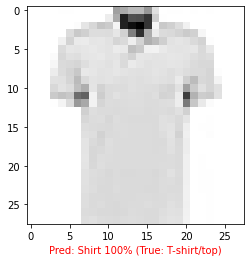

In [ ]:
plot_random_image(model_15, test_data, true_labels = test_labels,
                  classes = class_names)

What "patterns" is our model learning?

In [ ]:
model_15.layers

In [ ]:
weights, biases = model_14.layers[1].get_weights()

weights, weights.shape

(array([[ -2.8757718,  -7.820307 ,   5.4204435, -10.102428 ],
        [ -1.9730358,  -3.862489 ,  14.223724 ,  -6.0234976],
        [ 12.935272 ,  -2.6862042,   5.910449 , -17.648296 ],
        ...,
        [ -3.2967076,  16.030033 ,  -8.6996975,   1.5782489],
        [-13.965028 ,  19.780272 ,   2.5514057,   2.1067505],
        [ -2.2586572,   7.3217826,  13.264861 ,  -9.611256 ]],
       dtype=float32), (784, 4))

In [ ]:
#Bias vector
biases, biases.shape

(array([  4.8646007,  22.965055 , -27.678528 ,  19.524292 ], dtype=float32),
 (4,))

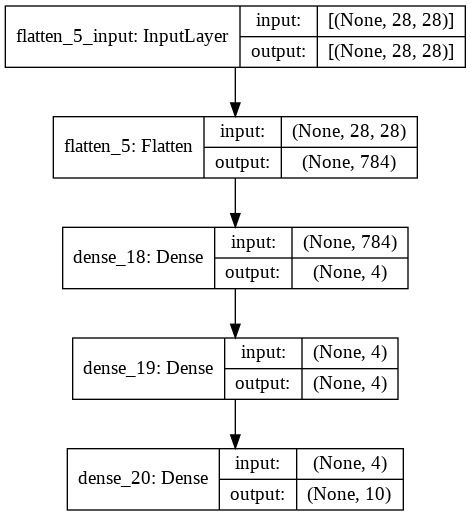

In [ ]:
#Another way of veiwing our model
from tensorflow.keras.utils import plot_model

plot_model(model_15, show_shapes = True)

Exercises

In [ ]:
from sklearn.datasets import make_circles
import tensorflow as tf
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt

In [ ]:
X,y = make_circles(1000, noise = 0.03, random_state = 42)
X

array([[ 0.75424625,  0.23148074],
       [-0.75615888,  0.15325888],
       [-0.81539193,  0.17328203],
       ...,
       [-0.13690036, -0.81001183],
       [ 0.67036156, -0.76750154],
       [ 0.28105665,  0.96382443]])

In [ ]:
y

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,

In [ ]:
tf.random.set_seed(42)

exercise_model = tf.keras.Sequential([
  tf.keras.layers.Dense(6, activation='relu'),
  tf.keras.layers.Dense(6, activation='relu'),
  tf.keras.layers.Dense(6, activation=tf.keras.activations.relu),
  tf.keras.layers.Dense(6, activation = tf.keras.activations.relu),
  tf.keras.layers.Dense(6, activation = 'relu'),
  tf.keras.layers.Dense(1, activation = 'sigmoid')
])

exercise_model.compile(loss = tf.keras.losses.BinaryCrossentropy(),
                       optimizer = tf.keras.optimizers.Adam(),
                       metrics = ["accuracy"])

exercise_model.fit(X,y,epochs = 50, verbose = False)

In [ ]:
exercise_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 6)                 18        
_________________________________________________________________
dense_4 (Dense)              (None, 6)                 42        
_________________________________________________________________
dense_5 (Dense)              (None, 6)                 42        
_________________________________________________________________
dense_6 (Dense)              (None, 6)                 42        
_________________________________________________________________
dense_7 (Dense)              (None, 6)                 42        
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 7         
Total params: 193
Trainable params: 193
Non-trainable params: 0
__________________________________________________________

In [ ]:
exercise_model.evaluate(X,y)

32/32 [==============================] - 0s 1ms/step - loss: 0.0068 - accuracy: 1.0000


[0.006758921314030886, 1.0]

In [ ]:
X_moons, y_moons = sklearn.datasets.make_moons(1000, noise = 0.03, random_state = 42)
X_moons, y_moons

(array([[-0.00933187,  0.39098105],
        [ 0.95457387, -0.47375583],
        [ 0.9185256 , -0.42519648],
        ...,
        [ 1.65391483, -0.29179795],
        [-0.9341017 ,  0.35358221],
        [ 0.7968358 ,  0.60423662]]),
 array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0,
        0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1,
        0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1,
        1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1,
        1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1,
        1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1,
        0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0,
        1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
        0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0,
        1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1,
        0, 1, 1, 0, 1, 0, 1, 

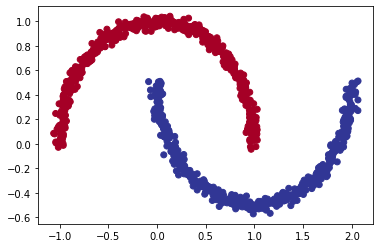

In [ ]:
plt.scatter(X_moons[:,0], X_moons[:,1], c = y_moons, cmap = plt.cm.RdYlBu)

In [ ]:
tf.random.set_seed(42)

exercise_model_2 = tf.keras.Sequential([
  tf.keras.layers.Dense(100, activation = 'relu'),
  tf.keras.layers.Dense(100, activation='relu'),
  tf.keras.layers.Dense(10, activation = 'relu'),
  tf.keras.layers.Dense(1, activation = 'sigmoid')
])

exercise_model_2.compile(loss = tf.keras.losses.BinaryCrossentropy(),
                         optimizer = tf.keras.optimizers.Adam(),
                         metrics = ["accuracy"])

exercise_model_2.fit(X_moons, y_moons, epochs = 100, verbose = False)

In [ ]:
exercise_model_2.evaluate(X_moons, y_moons)

32/32 [==============================] - 0s 1ms/step - loss: 3.9530e-05 - accuracy: 1.0000


[3.953026680392213e-05, 1.0]

Doing Binary


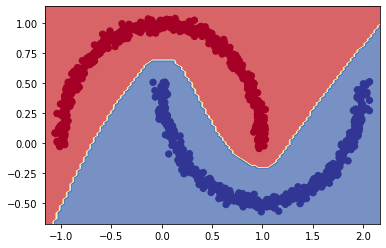

In [ ]:
plot_decision_boundary(exercise_model_2, X_moons, y_moons)

In [ ]:
from tensorflow.keras.datasets import fashion_mnist

# Already in train and test 
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [ ]:
tf.random.set_seed(42)

exercise_model_3 = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape = (28,28)),
  tf.keras.layers.Dense(1000, activation = 'relu'),
  tf.keras.layers.Dense(100, activation = 'relu'),
  tf.keras.layers.Dense(10, activation = 'relu'),
  tf.keras.layers.Dense(10, activation = 'softmax')
])

exercise_model_3.compile(loss = tf.keras.losses.SparseCategoricalCrossentropy(),
                         optimizer = tf.keras.optimizers.Adam(0.01),
                         metrics = ["accuracy"])

exercise_model_3.fit(X_train, y_train, epochs = 100, verbose = False)

In [ ]:
y_preds = exercise_model_3.predict(X_test)
y_preds = y_preds.argmax(axis = -1)
class_names = class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

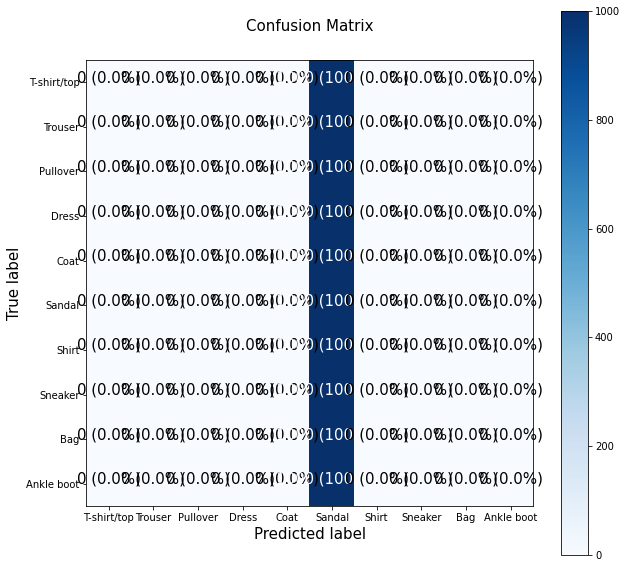

In [ ]:
make_confusion_matrix(y_test, y_preds, classes = class_names)

# [NoteBook_03](https://colab.research.google.com/github/mrdbourke/tensorflow-deep-learning/blob/main/03_convolutional_neural_networks_in_tensorflow.ipynb) **Computer Vision** **and Convolutional Neural Networks in TensorFlow**

In [ ]:
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
#Get the data
import zipfile

# Download zip file of pizza_steak images
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip 

#Unzip 
zip_ref = zipfile.ZipFile("pizza_steak.zip")
zip_ref.extractall()
zip_ref.close()

--2021-08-08 16:12:18--  https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 64.233.167.128, 74.125.133.128, 74.125.140.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|64.233.167.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109579078 (105M) [application/zip]
Saving to: ‘pizza_steak.zip’

pizza_steak.zip     100%[===================>] 104.50M  37.1MB/s    in 2.8s    

2021-08-08 16:12:22 (37.1 MB/s) - ‘pizza_steak.zip’ saved [109579078/109579078]



In [ ]:
!ls pizza_steak

test  train


In [ ]:
!ls pizza_steak/train

pizza  steak


In [ ]:
!ls pizza_steak/train/pizza

1008104.jpg  1638227.jpg  2235981.jpg  2774899.jpg  3464027.jpg  576236.jpg
1008144.jpg  1646974.jpg  2236914.jpg  2775763.jpg  3464858.jpg  5764.jpg
1008844.jpg  1649108.jpg  2241448.jpg  2778214.jpg  3473991.jpg  579691.jpg
1008941.jpg  1649276.jpg  2247711.jpg  277963.jpg   3475936.jpg  593400.jpg
1011404.jpg  1652943.jpg  2253670.jpg  2785084.jpg  3478964.jpg  59445.jpg
102037.jpg   1654444.jpg  2255361.jpg  2793535.jpg  3479875.jpg  596494.jpg
1026922.jpg  1660415.jpg  2274117.jpg  27963.jpg    3479936.jpg  598381.jpg
1029698.jpg  1663749.jpg  2279642.jpg  2800325.jpg  3484590.jpg  604977.jpg
1033251.jpg  1665654.jpg  2280345.jpg  2811032.jpg  3493457.jpg  608085.jpg
1035854.jpg  166823.jpg   2285269.jpg  282013.jpg   349946.jpg	 618021.jpg
1038357.jpg  1670471.jpg  2285942.jpg  2821034.jpg  350358.jpg	 61822.jpg
1040878.jpg  1671531.jpg  228778.jpg   2821048.jpg  3505182.jpg  618348.jpg
1044524.jpg  1678284.jpg  2291093.jpg  2827938.jpg  3512070.jpg  625687.jpg
1044789.jpg  16810

In [ ]:
import os

#Find how many files there are

for dirpath, dirnames, filenames in os.walk("pizza_steak"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

There are 2 directories and 1 images in 'pizza_steak'.
There are 2 directories and 1 images in 'pizza_steak/train'.
There are 0 directories and 750 images in 'pizza_steak/train/pizza'.
There are 0 directories and 750 images in 'pizza_steak/train/steak'.
There are 2 directories and 1 images in 'pizza_steak/test'.
There are 0 directories and 250 images in 'pizza_steak/test/pizza'.
There are 0 directories and 250 images in 'pizza_steak/test/steak'.


In [ ]:
#Getting to know our images visualizing
import pathlib

data_dir = pathlib.Path("pizza_steak/train")
class_names = np.array(sorted([item.name for item in data_dir.glob('*')]))
class_names = class_names[1:]
print(class_names)

['pizza' 'steak']


In [ ]:
#Visualize images
import matplotlib.image as mpimg
import random

def view_random_image(target_dir, target_class):
  target_folder = target_dir+target_class

  #Get a random image
  random_image = random.sample(os.listdir(target_folder),3)
  print(random_image)
  #Read in the image
  img = mpimg.imread(target_folder + "/" + random_image[0])

  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off")

  print(f"Image Shape {img.shape}")

  return img

['3589437.jpg', '877881.jpg', '2885050.jpg']
Image Shape (288, 512, 3)


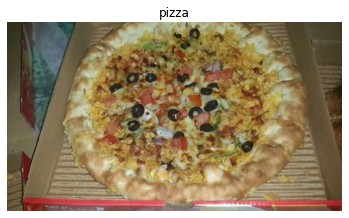

In [ ]:
#View random image

img = view_random_image("pizza_steak/train/",
                        target_class = "pizza")

In [ ]:
#When we read our pictures in they are big tensors
img.shape # Returns (width, height, color channels)

(288, 512, 3)

In [ ]:
img/225 #Small normalization

array([[[0.2       , 0.18666667, 0.10222222],
        [0.2       , 0.18666667, 0.10222222],
        [0.20444444, 0.19111111, 0.10666667],
        ...,
        [0.27555556, 0.25333333, 0.16444444],
        [0.28444444, 0.26222222, 0.17333333],
        [0.28      , 0.25777778, 0.16888889]],

       [[0.2       , 0.18666667, 0.10222222],
        [0.2       , 0.18666667, 0.10222222],
        [0.20888889, 0.19555556, 0.11111111],
        ...,
        [0.27555556, 0.25333333, 0.16444444],
        [0.28444444, 0.26222222, 0.17333333],
        [0.28444444, 0.26222222, 0.17333333]],

       [[0.2       , 0.18666667, 0.10222222],
        [0.20444444, 0.19111111, 0.10666667],
        [0.20888889, 0.19555556, 0.11111111],
        ...,
        [0.27111111, 0.24888889, 0.16      ],
        [0.28444444, 0.26222222, 0.17333333],
        [0.28444444, 0.26222222, 0.17333333]],

       ...,

       [[0.36      , 0.29333333, 0.16444444],
        [0.37777778, 0.31111111, 0.18222222],
        [0.39555556, 0

 Building an end to end CNN Model

In [ ]:
#We need a way to load our images, preprocess our images and then we need to compile
from tensorflow.keras.preprocessing.image import ImageDataGenerator

tf.random.set_seed(42)

#Get all the pixel values between 0 and 1
train_datagen = ImageDataGenerator(rescale = 1./255)
valid_datagen = ImageDataGenerator(rescale=1./255)

#Setup paths to our data directories
train_dir = '/content/pizza_steak/train'
test_dir = 'pizza_steak/test'

#Import data from directories and turn it into batches
train_data = train_datagen.flow_from_directory(train_dir, target_size=(224,224), class_mode = 'binary', seed = 42)
val_data = valid_datagen.flow_from_directory(test_dir, target_size = (224,224), class_mode = 'binary', seed = 42)

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [ ]:
#Buid the CNN model
model_1 = tf.keras.Sequential([
  tf.keras.layers.Conv2D(filters = 10, 
                         kernel_size = 3,
                         activation = 'relu',
                         input_shape = (224,224,3)),
  tf.keras.layers.Conv2D(10,3, activation = 'relu'),
  tf.keras.layers.MaxPool2D(pool_size=2,
                            padding = "valid"),
  tf.keras.layers.Conv2D(10,3, activation = 'relu'),
  tf.keras.layers.Conv2D(10, 3, activation = 'relu'),
  tf.keras.layers.MaxPool2D(2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(1, activation = 'sigmoid')
  
])

model_1.compile(loss = tf.keras.losses.BinaryCrossentropy(),
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ["accuracy"])

history = model_1.fit(train_data, epochs =  5, steps_per_epoch = len(train_data), validation_data = val_data, validation_steps = len(val_data))

Epoch 1/5
47/47 [==============================] - 42s 259ms/step - loss: 0.6012 - accuracy: 0.6460 - val_loss: 0.3803 - val_accuracy: 0.8440
Epoch 2/5
47/47 [==============================] - 11s 228ms/step - loss: 0.4373 - accuracy: 0.8093 - val_loss: 0.3351 - val_accuracy: 0.8640
Epoch 3/5
47/47 [==============================] - 11s 225ms/step - loss: 0.4159 - accuracy: 0.8153 - val_loss: 0.3625 - val_accuracy: 0.8560
Epoch 4/5
47/47 [==============================] - 11s 225ms/step - loss: 0.3797 - accuracy: 0.8347 - val_loss: 0.3511 - val_accuracy: 0.8660
Epoch 5/5
47/47 [==============================] - 11s 229ms/step - loss: 0.3446 - accuracy: 0.8593 - val_loss: 0.3205 - val_accuracy: 0.8660


Trying a non-CNN model on our image data

In [ ]:
tf.random.set_seed(42)

model_2 = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape  = (224,224,3)),
  tf.keras.layers.Dense(4, activation = 'relu'),
  tf.keras.layers.Dense(4, activation = 'relu'),
  tf.keras.layers.Dense(1, activation = 'sigmoid')
])

model_2.compile(loss = 'binary_crossentropy',
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ["accuracy"])

history_2 = model_2.fit(train_data, epochs = 5 ,
            steps_per_epoch = len(train_data),
            validation_data= val_data,
            validation_steps = len(val_data))

Epoch 1/5
47/47 [==============================] - 10s 207ms/step - loss: 0.8407 - accuracy: 0.5093 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 2/5
47/47 [==============================] - 9s 202ms/step - loss: 0.6933 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 3/5
47/47 [==============================] - 9s 201ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 4/5
47/47 [==============================] - 9s 201ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 5/5
47/47 [==============================] - 9s 201ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5000


Improving our non-CNN model by adding more layers

In [ ]:
#get a summary of model_2
model_2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 150528)            0         
_________________________________________________________________
dense_1 (Dense)              (None, 4)                 602116    
_________________________________________________________________
dense_2 (Dense)              (None, 4)                 20        
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 5         
Total params: 602,141
Trainable params: 602,141
Non-trainable params: 0
_________________________________________________________________


In [ ]:
tf.random.set_seed(42)

model_3 = tf.keras.Sequential([
 tf.keras.layers.Flatten(input_shape = (224, 224, 3)),
 tf.keras.layers.Dense(100, activation = 'relu'),
 tf.keras.layers.Dense(100, activation = 'relu'),
 tf.keras.layers.Dense(100, activation = 'relu'),
 tf.keras.layers.Dense(1, activation = 'sigmoid')
])

model_3.compile(loss = 'binary_crossentropy', 
                optimizer = 'Adam',
                metrics = ["accuracy"])

history_3 = model_3.fit(train_data, epochs = 5,
                        steps_per_epoch = len(train_data),
                        validation_data = val_data,
                validation_steps = len(val_data))

Epoch 1/5
47/47 [==============================] - 10s 212ms/step - loss: 3.7470 - accuracy: 0.6387 - val_loss: 1.8344 - val_accuracy: 0.5560
Epoch 2/5
47/47 [==============================] - 10s 205ms/step - loss: 1.0581 - accuracy: 0.6933 - val_loss: 1.1620 - val_accuracy: 0.7060
Epoch 3/5
47/47 [==============================] - 10s 207ms/step - loss: 0.7340 - accuracy: 0.7347 - val_loss: 0.5473 - val_accuracy: 0.7620
Epoch 4/5
47/47 [==============================] - 10s 207ms/step - loss: 0.5721 - accuracy: 0.7740 - val_loss: 0.4917 - val_accuracy: 0.7600
Epoch 5/5
47/47 [==============================] - 10s 205ms/step - loss: 0.5088 - accuracy: 0.7827 - val_loss: 0.4877 - val_accuracy: 0.7660


In [ ]:
model_3.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_2 (Flatten)          (None, 150528)            0         
_________________________________________________________________
dense_4 (Dense)              (None, 100)               15052900  
_________________________________________________________________
dense_5 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_6 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 101       
Total params: 15,073,201
Trainable params: 15,073,201
Non-trainable params: 0
_________________________________________________________________


Breaking our CNN model down part 1: Becoming one with the data

['1995252.jpg', '2300845.jpg', '2223787.jpg']
Image Shape (341, 512, 3)
['2980131.jpg', '972000.jpg', '1008844.jpg']
Image Shape (384, 512, 3)


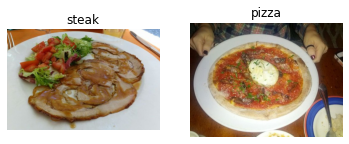

In [ ]:
plt.figure()
plt.subplot(1,2,1)
steak_img  = view_random_image("pizza_steak/train/" , "steak")
plt.subplot(1,2,2)
pizza_img = view_random_image("pizza_steak/train/", "pizza")

Breaking our CNN model down part 2: Preparing to load our data

In [ ]:
train_dir = "pizza_steak/train/"
test_dir = "pizza_steak/test/"

In [ ]:
#Now we need to turn our data into batches, we will first make train and test data generators
train_datagen = ImageDataGenerator(rescale = 1/255.)
test_datagen = ImageDataGenerator(rescale = 1/255.)

train_data = train_datagen.flow_from_directory(directory = train_dir,
                                               target_size = (224,224),
                                               class_mode = 'binary',
                                               batch_size = 32)
test_data = test_datagen.flow_from_directory(directory = test_dir,
                                              target_size = (224,224),
                                              class_mode = 'binary',
                                              batch_size = 32)



Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [ ]:
#Get a sample of a training data batch
images, labels = train_data.next()#Get the 'next' bacth of images/lables in the training data
len(images), len(labels)

(32, 32)

In [ ]:
images[:2], images[0].shape

(array([[[[0.47058827, 0.40784317, 0.34509805],
          [0.4784314 , 0.427451  , 0.3647059 ],
          [0.48627454, 0.43529415, 0.37254903],
          ...,
          [0.8313726 , 0.70980394, 0.48627454],
          [0.8431373 , 0.73333335, 0.5372549 ],
          [0.87843144, 0.7725491 , 0.5882353 ]],
 
         [[0.50980395, 0.427451  , 0.36078432],
          [0.5058824 , 0.42352945, 0.35686275],
          [0.5137255 , 0.4431373 , 0.3647059 ],
          ...,
          [0.82745105, 0.7058824 , 0.48235297],
          [0.82745105, 0.70980394, 0.5058824 ],
          [0.8431373 , 0.73333335, 0.5372549 ]],
 
         [[0.5254902 , 0.427451  , 0.34901962],
          [0.5372549 , 0.43921572, 0.36078432],
          [0.5372549 , 0.45098042, 0.36078432],
          ...,
          [0.82745105, 0.7019608 , 0.4784314 ],
          [0.82745105, 0.7058824 , 0.49411768],
          [0.8352942 , 0.7176471 , 0.5137255 ]],
 
         ...,
 
         [[0.77647066, 0.5647059 , 0.2901961 ],
          [0.78039

Breaking our CNN model down part 4: Building a baseline CNN mode

In [ ]:
#We are going to start with a basline (Existing result), good to set up in the begginig to beat the baseline
#You can start with a smaller model and then upgrade everything
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Activation
from tensorflow.keras.models import Sequential

In [ ]:
model_4 = Sequential([ 
 Conv2D(filters = 10,
        kernel_size = 3,
        strides = 1,
        padding = 'valid',
        activation='relu',
        input_shape = (224,224,3)),#input shape
  Conv2D(10,3, activation='relu'),
  Conv2D(10, 3, activation = 'relu'),
  Flatten(),
  Dense(1, activation= 'sigmoid')
])

Breaking our CNN model down part 6: Compiling and fitting our baseline CNNm

In [ ]:
model_4.compile(loss = 'binary_crossentropy',
                optimizer = Adam(),
                metrics = ["accuracy"])

In [ ]:
model_4.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 222, 222, 10)      280       
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 220, 220, 10)      910       
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 218, 218, 10)      910       
_________________________________________________________________
flatten_3 (Flatten)          (None, 475240)            0         
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 475241    
Total params: 477,341
Trainable params: 477,341
Non-trainable params: 0
_________________________________________________________________


In [ ]:
#Check the lengths of training and test data generators
len(train_data), len(test_data)

(47, 16)

In [ ]:
#Fit our model 
history_4 = model_4.fit(train_data,
            epochs = 5,
            steps_per_epoch = len(train_data),
            validation_data=test_data,
            validation_steps = len(test_data))

Epoch 1/5
47/47 [==============================] - 13s 251ms/step - loss: 1.3696 - accuracy: 0.6473 - val_loss: 0.5061 - val_accuracy: 0.7740
Epoch 2/5
47/47 [==============================] - 11s 235ms/step - loss: 0.4670 - accuracy: 0.7860 - val_loss: 0.4311 - val_accuracy: 0.8060
Epoch 3/5
47/47 [==============================] - 11s 229ms/step - loss: 0.3490 - accuracy: 0.8607 - val_loss: 0.3775 - val_accuracy: 0.8400
Epoch 4/5
47/47 [==============================] - 11s 233ms/step - loss: 0.1850 - accuracy: 0.9367 - val_loss: 0.4288 - val_accuracy: 0.8140
Epoch 5/5
47/47 [==============================] - 11s 234ms/step - loss: 0.0782 - accuracy: 0.9793 - val_loss: 0.5054 - val_accuracy: 0.8000


In [ ]:
model_1.evaluate(test_data)

16/16 [==============================] - 3s 160ms/step - loss: 0.3205 - accuracy: 0.8660


[0.32049423456192017, 0.8659999966621399]

Breaking our CNN model down part 7: Evaluating our CNN's training curves

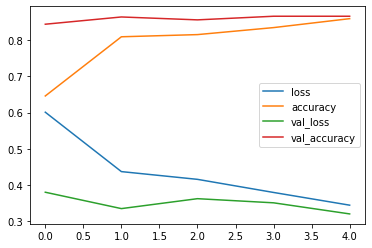

In [ ]:
import pandas as pd
pd.DataFrame(history.history).plot()

In [ ]:
# Plot the validation and training data separately
def plot_loss_curves(history):
  """
  Returns separate loss curves for training and validation metrics.
  """ 
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  accuracy = history.history['accuracy']
  val_accuracy = history.history['val_accuracy']

  epochs = range(len(history.history['loss']))

  # Plot loss
  plt.plot(epochs, loss, label='training_loss')
  plt.plot(epochs, val_loss, label='val_loss')
  plt.title('Loss')
  plt.xlabel('Epochs')
  plt.legend()

  # Plot accuracy
  plt.figure()
  plt.plot(epochs, accuracy, label='training_accuracy')
  plt.plot(epochs, val_accuracy, label='val_accuracy')
  plt.title('Accuracy')
  plt.xlabel('Epochs')
  plt.legend();


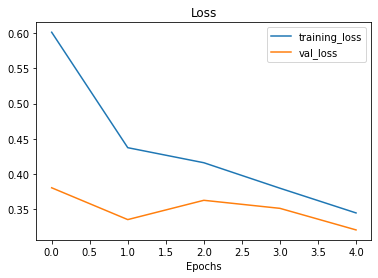

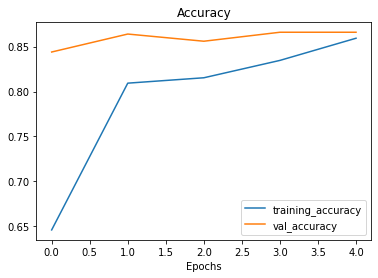

In [ ]:
plot_loss_curves(history)

Breaking our CNN model down part 8: Reducing overfitting with Max Pooling

In [ ]:
model_5 = Sequential([ 
 Conv2D(10,3, activation  = 'relu', input_shape = (224,224,3)),
 MaxPool2D(pool_size = 2),
 Conv2D(10,3, activation='relu'),
 MaxPool2D(2),
 Conv2D(10,3, activation = 'relu'),
 MaxPool2D(2),
 Flatten(),
 Dense(1, activation = 'sigmoid')
])

In [ ]:
 model_5.compile(loss = 'binary_crossentropy',
                 optimizer = Adam(),
                 metrics = ["accuracy"])

In [ ]:
history_5 = model_5.fit(train_data, epochs= 5,
            steps_per_epoch=  len(train_data),
            validation_data = test_data,
            validation_steps = len(test_data))

Epoch 1/5
47/47 [==============================] - 11s 221ms/step - loss: 0.6261 - accuracy: 0.6553 - val_loss: 0.5337 - val_accuracy: 0.7180
Epoch 2/5
47/47 [==============================] - 10s 211ms/step - loss: 0.4809 - accuracy: 0.7680 - val_loss: 0.4184 - val_accuracy: 0.7980
Epoch 3/5
47/47 [==============================] - 10s 211ms/step - loss: 0.4367 - accuracy: 0.8080 - val_loss: 0.3576 - val_accuracy: 0.8620
Epoch 4/5
47/47 [==============================] - 10s 215ms/step - loss: 0.3934 - accuracy: 0.8293 - val_loss: 0.3509 - val_accuracy: 0.8440
Epoch 5/5
47/47 [==============================] - 10s 213ms/step - loss: 0.3931 - accuracy: 0.8340 - val_loss: 0.3370 - val_accuracy: 0.8740


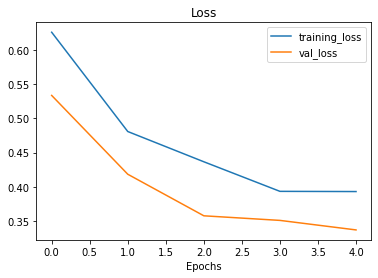

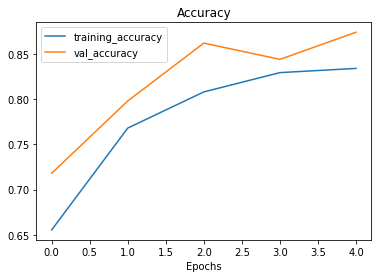

In [ ]:
plot_loss_curves(history_5)

Breaking our CNN model down part 9: Reducing overfitting with data augmentation

In [ ]:
#Create ImageDataGenerator training instance with data augmentation
train_datagen_augmented = ImageDataGenerator(rescale = 1/255.,
                                             rotation_range = 0.2,
                                             shear_range=  0.2,
                                             zoom_range = 0.2,
                                             width_shift_range = 0.2,
                                             height_shift_range = 0.2,
                                             horizontal_flip  =True)

Breaking our CNN model down part 10: Visualizing our augmented data

In [ ]:
train_data_augmented= train_datagen_augmented.flow_from_directory(train_dir,
                                                                  target_size = (224,224),
                                                                  class_mode= 'binary',
                                                                  shuffle = False)
#Non Augmented train
train_data = train_datagen.flow_from_directory(train_dir,
                                               target_size = (224,224),
                                               class_mode = 'binary',
                                               shuffle = False)

#Non Augmented test data
test_data = test_datagen.flow_from_directory(test_dir,
                                             target_size = (224,224),
                                             class_mode = 'binary')
#Usually Augmentation is done only on the train data

Found 1500 images belonging to 2 classes.
Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


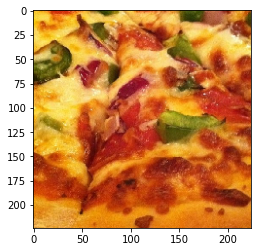

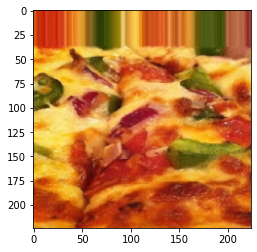

In [ ]:
#Sample Data Image
images, labels = train_data.next()
augmented_images, augmented_labels = train_data_augmented.next()

random_number = random.randint(0,32) #batch Sizes 32
plt.imshow(images[random_number]) #Plot the random number

plt.figure()
plt.imshow(augmented_images[random_number])

Breaking our CNN model down part 11: Training a CNN model on augmented data

In [ ]:
model_6 = Sequential([
  Conv2D(10, 3, activation = 'relu', input_shape = (224,224,3),),
  MaxPool2D(2),
  Conv2D(10,3, activation = 'relu'),
  MaxPool2D(2),
  Conv2D(10,3, activation='relu'),
  MaxPool2D(2),
  Flatten(),
  Dense(1, activation = 'sigmoid')

])

model_6.compile(loss = 'binary_crossentropy',
                optimizer = "Adam",
                metrics = ["accuracy"])

history_6 = model_6.fit(train_data_augmented, epochs= 5,
            steps_per_epoch = len(train_data_augmented),
            validation_data = test_data,
            validation_steps = len(test_data))

Epoch 1/5
47/47 [==============================] - 26s 541ms/step - loss: 0.7007 - accuracy: 0.5327 - val_loss: 0.6824 - val_accuracy: 0.6220
Epoch 2/5
47/47 [==============================] - 25s 527ms/step - loss: 0.7080 - accuracy: 0.4373 - val_loss: 0.6778 - val_accuracy: 0.5680
Epoch 3/5
47/47 [==============================] - 25s 523ms/step - loss: 0.6809 - accuracy: 0.5953 - val_loss: 0.6116 - val_accuracy: 0.7620
Epoch 4/5
47/47 [==============================] - 25s 534ms/step - loss: 0.6647 - accuracy: 0.6413 - val_loss: 0.5580 - val_accuracy: 0.7520
Epoch 5/5
47/47 [==============================] - 25s 531ms/step - loss: 0.6147 - accuracy: 0.6980 - val_loss: 0.5004 - val_accuracy: 0.7740


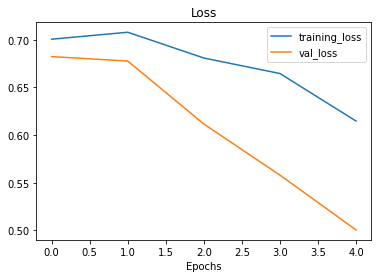

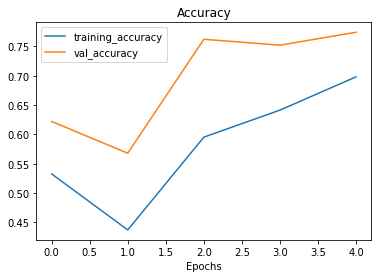

In [ ]:
plot_loss_curves(history_6)

Breaking our CNN model down part 12: Discovering the power of shuffling data

In [ ]:
augmented_train_data = train_datagen_augmented.flow_from_directory(train_dir,
                                               target_size = (224,224),
                                               batch_size = 32,
                                               class_mode = 'binary',
                                               shuffle = True)

Found 1500 images belonging to 2 classes.


In [ ]:
model_7 =Sequential([
  Conv2D(10,3,activation = 'relu', input_shape = (224,224,3)),
  MaxPool2D(2),
  Conv2D(10,3,activation = 'relu'),
  MaxPool2D(2),
  Conv2D(10,3,activation = 'relu',),
  MaxPool2D(2),
  Flatten(),
  Dense(1, activation = 'sigmoid')
])

model_7.compile(loss = 'binary_crossentropy',
                optimizer = 'Adam',
                metrics = ["accuracy"])

history_7 = model_7.fit(augmented_train_data, epochs = 5,
            steps_per_epoch = len(augmented_train_data),
            validation_data=  test_data,
            validation_steps = len(test_data))


Epoch 1/5
47/47 [==============================] - 26s 537ms/step - loss: 0.6557 - accuracy: 0.6040 - val_loss: 0.5608 - val_accuracy: 0.7100
Epoch 2/5
47/47 [==============================] - 25s 528ms/step - loss: 0.5543 - accuracy: 0.7213 - val_loss: 0.4095 - val_accuracy: 0.8240
Epoch 3/5
47/47 [==============================] - 25s 526ms/step - loss: 0.4964 - accuracy: 0.7587 - val_loss: 0.3494 - val_accuracy: 0.8620
Epoch 4/5
47/47 [==============================] - 25s 532ms/step - loss: 0.4721 - accuracy: 0.7847 - val_loss: 0.3304 - val_accuracy: 0.8580
Epoch 5/5
47/47 [==============================] - 25s 528ms/step - loss: 0.4456 - accuracy: 0.7987 - val_loss: 0.3135 - val_accuracy: 0.8660


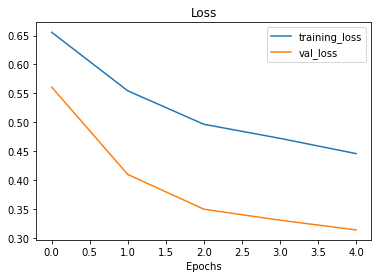

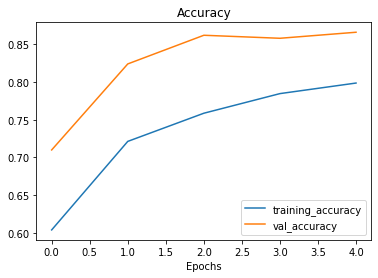

In [ ]:
plot_loss_curves(history_7)

Downloading a custom image to make predictions on

In [ ]:
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg 

--2021-08-08 16:22:19--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1978213 (1.9M) [image/jpeg]
Saving to: ‘03-steak.jpeg’

03-steak.jpeg       100%[===================>]   1.89M  --.-KB/s    in 0.06s   

2021-08-08 16:22:19 (32.9 MB/s) - ‘03-steak.jpeg’ saved [1978213/1978213]



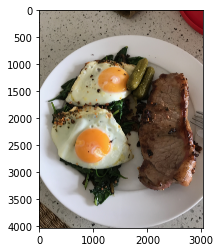

In [ ]:
steak = mpimg.imread("/content/03-steak.jpeg")
plt.imshow(steak)

Writing a helper function to load and preprocessing custom images

In [ ]:
# Create a function to import an image and resize it to be able to be used with our model
def load_and_prep_image(filename, img_shape=224):
  """
  Reads an image from filename, turns it into a tensor
  and reshapes it to (img_shape, img_shape, colour_channel).
  """
  # Read in target file (an image)
  img = tf.io.read_file(filename)

  # Decode the read file into a tensor & ensure 3 colour channels 
  # (our model is trained on images with 3 colour channels and sometimes images have 4 colour channels)
  img = tf.image.decode_image(img, channels=3)

  # Resize the image (to the same size our model was trained on)
  img = tf.image.resize(img, size = [img_shape, img_shape])

  # Rescale the image (get all values between 0 and 1)
  img = img/255.
  return img

In [ ]:
#Load and preprocess oru custom image
steak = load_and_prep_image("/content/03-steak.jpeg")
steak

<tf.Tensor: shape=(224, 224, 3), dtype=float32, numpy=
array([[[0.6377451 , 0.6220588 , 0.57892156],
        [0.6504902 , 0.63186276, 0.5897059 ],
        [0.63186276, 0.60833335, 0.5612745 ],
        ...,
        [0.52156866, 0.05098039, 0.09019608],
        [0.49509802, 0.04215686, 0.07058824],
        [0.52843136, 0.07745098, 0.10490196]],

       [[0.6617647 , 0.6460784 , 0.6107843 ],
        [0.6387255 , 0.6230392 , 0.57598037],
        [0.65588236, 0.63235295, 0.5852941 ],
        ...,
        [0.5352941 , 0.06862745, 0.09215686],
        [0.529902  , 0.05931373, 0.09460784],
        [0.5142157 , 0.05539216, 0.08676471]],

       [[0.6519608 , 0.6362745 , 0.5892157 ],
        [0.6392157 , 0.6137255 , 0.56764704],
        [0.65637255, 0.6269608 , 0.5828431 ],
        ...,
        [0.53137255, 0.06470589, 0.08039216],
        [0.527451  , 0.06862745, 0.1       ],
        [0.52254903, 0.05196078, 0.0872549 ]],

       ...,

       [[0.49313724, 0.42745098, 0.31029412],
        [0.05

In [ ]:
pred = model_7.predict(tf.expand_dims(steak, axis = 0)) #Wil come out in a prediction probability

Making a prediction on a custom image with our trained CNN

In [ ]:
# Lets create a function to show the prediction and the image
# We can index the predicted class
pred_class = class_names[int(tf.round(pred))]
pred_class

'steak'

In [ ]:
def pred_and_plot(model, filename, class_names = class_names):
  img = load_and_prep_image(filename)

  #Make a pred
  pred = model.predict(tf.expand_dims(img, axis = 0))

  #Predicted class
  pred_class = class_names[int(tf.round(pred))]

  #Plot the image and the predicted class
  plt.imshow(img)
  plt.title(f"Prediction: {pred_class}")
  plt.axis(False);

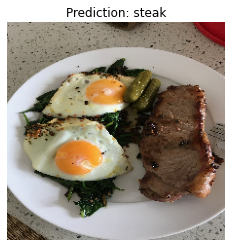

In [ ]:
pred_and_plot(model_7, "/content/03-steak.jpeg")

--2021-08-08 16:22:21--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-pizza-dad.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2874848 (2.7M) [image/jpeg]
Saving to: ‘03-pizza-dad.jpeg’

03-pizza-dad.jpeg   100%[===================>]   2.74M  --.-KB/s    in 0.06s   

2021-08-08 16:22:22 (47.0 MB/s) - ‘03-pizza-dad.jpeg’ saved [2874848/2874848]



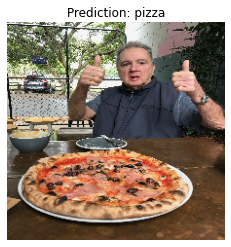

In [ ]:
#Download another custom image

!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-pizza-dad.jpeg
pred_and_plot(model_7, "03-pizza-dad.jpeg")

Multi-class CNN's part 1: Becoming one with the data

In [ ]:
#Import and become one with the data
import zipfile
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip

#Unzip
zip_ref = zipfile.ZipFile("10_food_classes_all_data.zip", "r")
zip_ref.extractall()
zip_ref.close()

--2021-08-08 16:22:22--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.251.5.128, 74.125.206.128, 64.233.184.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.251.5.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 519183241 (495M) [application/zip]
Saving to: ‘10_food_classes_all_data.zip’

10_food_classes_all 100%[===================>] 495.13M   115MB/s    in 4.4s    

2021-08-08 16:22:28 (112 MB/s) - ‘10_food_classes_all_data.zip’ saved [519183241/519183241]



In [ ]:
import os

#Walkt through 10 classes of food image data

for dirpath, dirnames, filenames in os.walk("10_food_classes_all_data"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}")

There are 2 directories and 0 images in '10_food_classes_all_data
There are 10 directories and 0 images in '10_food_classes_all_data/train
There are 0 directories and 750 images in '10_food_classes_all_data/train/ramen
There are 0 directories and 750 images in '10_food_classes_all_data/train/pizza
There are 0 directories and 750 images in '10_food_classes_all_data/train/chicken_wings
There are 0 directories and 750 images in '10_food_classes_all_data/train/sushi
There are 0 directories and 750 images in '10_food_classes_all_data/train/chicken_curry
There are 0 directories and 750 images in '10_food_classes_all_data/train/fried_rice
There are 0 directories and 750 images in '10_food_classes_all_data/train/steak
There are 0 directories and 750 images in '10_food_classes_all_data/train/hamburger
There are 0 directories and 750 images in '10_food_classes_all_data/train/grilled_salmon
There are 0 directories and 750 images in '10_food_classes_all_data/train/ice_cream
There are 10 directorie

In [ ]:
#set up the train and test directories
train_dir = "10_food_classes_all_data/train/"
test_dir = "10_food_classes_all_data/test/"

In [ ]:
import pathlib 
import numpy as np

data_dir = pathlib.Path(train_dir)
class_names = np.array(sorted([item.name for item in data_dir.glob('*')]))
print(class_names)

['chicken_curry' 'chicken_wings' 'fried_rice' 'grilled_salmon' 'hamburger'
 'ice_cream' 'pizza' 'ramen' 'steak' 'sushi']


['2899280.jpg', '3380181.jpg', '1003533.jpg']
Image Shape (512, 512, 3)


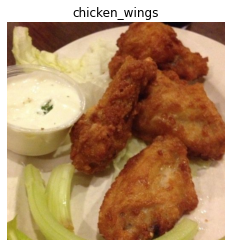

In [ ]:
#Visualize 
img = view_random_image(train_dir,
                        random.choice(class_names))


Multi-class CNN's part 2: Preparing our data (turning it into tensors)

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
#Personal Code, not from course
train_datagen = ImageDataGenerator(rescale = 1/225.)
test_datagen = ImageDataGenerator(rescale = 1/225.)

train_data = train_datagen.flow_from_directory(train_dir,
                                               target_size = (512,512),
                                               class_mode = 'sparse',
                                               )
test_data = test_datagen.flow_from_directory(test_dir,
                                             target_size = (512,512),
                                             class_mode = "sparse")

Found 7500 images belonging to 10 classes.
Found 2500 images belonging to 10 classes.


In [ ]:
#Code from course
from tensorflow.keras.preprocessing.image import ImageDataGenerator
#Personal Code, not from course
train_datagen = ImageDataGenerator(rescale = 1/225.)
test_datagen = ImageDataGenerator(rescale = 1/225.)

train_data = train_datagen.flow_from_directory(train_dir,
                                               target_size = (224,224),
                                               class_mode = 'categorical',
                                               )
test_data = test_datagen.flow_from_directory(test_dir,
                                             target_size = (224,224),
                                             class_mode = "categorical")

Found 7500 images belonging to 10 classes.
Found 2500 images belonging to 10 classes.


Multi-class CNN's part 3: Building a multi-class CNN model

In [ ]:
#Same model as the tiny vgg model
multiclass_model_1 = Sequential([
  Conv2D(10, 3, activation = 'relu',input_shape = (224,224,3)),
  #tf.keras.activations.relu()
  Conv2D(10,3, activation='relu'),
  #tf.keras.activations.relu(),
  MaxPool2D(2),
  Conv2D(10,3, activation = 'relu'),
  #tf.keras.activations.relu(),
  Conv2D(10,3, activation = 'relu'),
  #tf.keras.activations.relu(),
  MaxPool2D(2),
  Flatten(),
  Dense(10, activation = 'softmax')
])

Multi-class CNN's part 4: Fitting a multi-class CNN model to the data

In [ ]:
multiclass_model_1.compile(loss = 'categorical_crossentropy',
                           optimizer = 'Adam',
                           metrics = ["accuracy"])

In [ ]:
multiclass_history = multiclass_model_1.fit(train_data, epochs = 5,
                       steps_per_epoch = len(train_data),
                       validation_data = test_data,
                       validation_steps = len(test_data))

Epoch 1/5
235/235 [==============================] - 57s 240ms/step - loss: 2.1747 - accuracy: 0.1900 - val_loss: 2.1370 - val_accuracy: 0.2360
Epoch 2/5
235/235 [==============================] - 55s 236ms/step - loss: 1.9563 - accuracy: 0.3141 - val_loss: 1.9329 - val_accuracy: 0.3112
Epoch 3/5
235/235 [==============================] - 54s 231ms/step - loss: 1.5732 - accuracy: 0.4795 - val_loss: 1.9647 - val_accuracy: 0.3356
Epoch 4/5
235/235 [==============================] - 55s 235ms/step - loss: 0.9850 - accuracy: 0.6736 - val_loss: 2.4669 - val_accuracy: 0.2908
Epoch 5/5
235/235 [==============================] - 55s 235ms/step - loss: 0.4247 - accuracy: 0.8733 - val_loss: 3.2921 - val_accuracy: 0.2884


Multi-class CNN's part 5: Evaluating our multi-class CNN model

In [ ]:
multiclass_model_1.evaluate(test_data)

79/79 [==============================] - 13s 160ms/step - loss: 3.2921 - accuracy: 0.2884


[3.292055130004883, 0.28839999437332153]

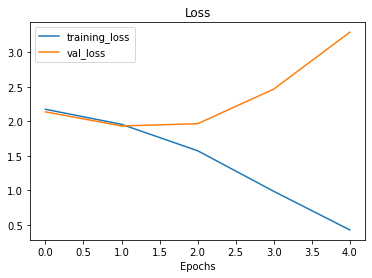

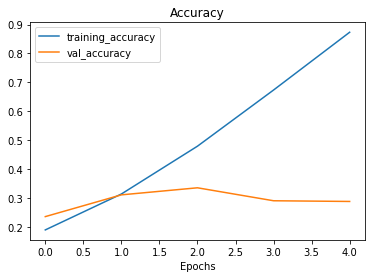

In [ ]:
plot_loss_curves(multiclass_history) # the model looks to be overfitting

Multi-class CNN's part 6: Trying to fix overfitting by removing layers



In [ ]:
#Lets try and remove 2 Conv2D layers
multiclass_model_2 = Sequential([ 
  Conv2D(10,3,activation='relu', input_shape = (224,224,3)),
  MaxPool2D(),
  Conv2D(10,3,activation = 'relu'),
  MaxPool2D(),
  Flatten(),
  Dense(10, activation = 'softmax')
])

In [ ]:
multiclass_model_2.compile(loss = 'categorical_crossentropy',
                           optimizer=  'Adam',
                           metrics = ['accuracy'])

In [ ]:
multiclass_history_2 = multiclass_model_2.fit(train_data, epochs = 5,
                                              steps_per_epoch = len(train_data),
                                              validation_data = test_data,
                                              validation_steps = len(test_data))

Epoch 1/5
235/235 [==============================] - 51s 213ms/step - loss: 2.4069 - accuracy: 0.2176 - val_loss: 1.9597 - val_accuracy: 0.3136
Epoch 2/5
235/235 [==============================] - 50s 211ms/step - loss: 1.8004 - accuracy: 0.3835 - val_loss: 1.8755 - val_accuracy: 0.3272
Epoch 3/5
235/235 [==============================] - 49s 210ms/step - loss: 1.4652 - accuracy: 0.5143 - val_loss: 2.0021 - val_accuracy: 0.3208
Epoch 4/5
235/235 [==============================] - 50s 211ms/step - loss: 1.0651 - accuracy: 0.6529 - val_loss: 2.3442 - val_accuracy: 0.2916
Epoch 5/5
235/235 [==============================] - 50s 211ms/step - loss: 0.6750 - accuracy: 0.7995 - val_loss: 2.5806 - val_accuracy: 0.2952


Multi-class CNN's part 7: Trying to fix overfitting with data augmentation

In [ ]:
train_datagen = ImageDataGenerator(rescale = 1/255.,
                                   shear_range = 0.2,
                                   zoom_range = 0.3,
                                   vertical_flip = True,
                                   horizontal_flip = True,
                                   width_shift_range = 0.4,
                                   height_shift_range= 0.5)
train_data_augmented = train_datagen.flow_from_directory(train_dir,
                                                         target_size= (224,224),
                                                         class_mode= 'categorical')

Found 7500 images belonging to 10 classes.


In [ ]:
#create another model but fit with augmented 
multiclass_model_3 = tf.keras.models.clone_model(multiclass_model_1)

In [ ]:
multiclass_model_3.compile(loss = 'categorical_crossentropy',
                           optimizer = 'Adam',
                           metrics = ["accuracy"])

In [ ]:
multiclass_history_3 = multiclass_model_3.fit(train_data_augmented, epochs = 5,
                       steps_per_epoch  =len(train_data_augmented),
                       validation_data=  test_data,
                       validation_steps = len(test_data))

Epoch 1/5
235/235 [==============================] - 133s 562ms/step - loss: 2.3011 - accuracy: 0.1208 - val_loss: 2.2751 - val_accuracy: 0.1560
Epoch 2/5
235/235 [==============================] - 131s 559ms/step - loss: 2.2650 - accuracy: 0.1492 - val_loss: 2.2135 - val_accuracy: 0.1684
Epoch 3/5
235/235 [==============================] - 131s 559ms/step - loss: 2.2273 - accuracy: 0.1760 - val_loss: 2.1503 - val_accuracy: 0.2320
Epoch 4/5
235/235 [==============================] - 131s 557ms/step - loss: 2.2165 - accuracy: 0.1889 - val_loss: 2.1660 - val_accuracy: 0.2360
Epoch 5/5
235/235 [==============================] - 130s 552ms/step - loss: 2.2055 - accuracy: 0.1996 - val_loss: 2.1040 - val_accuracy: 0.2700


Making some predictions

In [ ]:
#Donwload custom images
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-hamburger.jpeg
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-sushi.jpeg

--2021-08-08 16:50:26--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-hamburger.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.110.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3564285 (3.4M) [image/jpeg]
Saving to: ‘03-hamburger.jpeg’

03-hamburger.jpeg   100%[===================>]   3.40M  --.-KB/s    in 0.09s   

2021-08-08 16:50:26 (37.9 MB/s) - ‘03-hamburger.jpeg’ saved [3564285/3564285]

--2021-08-08 16:50:26--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-sushi.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting res

In [ ]:
#Make our function work with multiclass
def pred_and_plot(model, filename, class_names = class_names):
  img = load_and_prep_image(filename)

  #Make a pred
  pred = model.predict(tf.expand_dims(img, axis = 0))

  #if 
  if len(pred[0]) > 1:
    pred_class = class_names[tf.argmax(pred[0])]
  else:
    pred_class = class_names[int(tf.round(pred))]

  #Plot the image and the predicted class
  plt.imshow(img)
  plt.title(f"Prediction: {pred_class}")
  plt.axis(False);

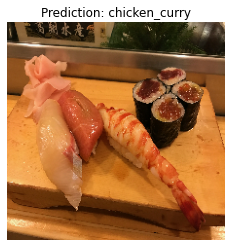

In [ ]:
pred_and_plot(model = multiclass_model_3, filename = "03-sushi.jpeg", class_names = class_names)

 Saving and loading our model

In [ ]:
#save a model
multiclass_model_3.save("saved_multiclass_model_3")

INFO:tensorflow:Assets written to: saved_multiclass_model_3/assets


In [ ]:
#Load in our model
loaded_multiclass_model_3 = tf.keras.models.load_model("saved_multiclass_model_3")

In [ ]:
loaded_multiclass_model_3.evaluate(test_data)

79/79 [==============================] - 13s 162ms/step - loss: 2.1040 - accuracy: 0.2700


[2.1039695739746094, 0.27000001072883606]

Exercises

In [ ]:
!wget -c https://s3.amazonaws.com/content.udacity-data.com/nd089/Cat_Dog_data.zip
!unzip -qq Cat_Dog_data.zip

--2021-08-08 17:24:50--  https://s3.amazonaws.com/content.udacity-data.com/nd089/Cat_Dog_data.zip
Resolving s3.amazonaws.com (s3.amazonaws.com)... 52.216.248.182
Connecting to s3.amazonaws.com (s3.amazonaws.com)|52.216.248.182|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 580495262 (554M) [application/zip]
Saving to: ‘Cat_Dog_data.zip’

Cat_Dog_data.zip    100%[===================>] 553.60M  35.5MB/s    in 16s     

2021-08-08 17:25:07 (34.1 MB/s) - ‘Cat_Dog_data.zip’ saved [580495262/580495262]



In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import cv2
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from sklearn.model_selection import train_test_split
import os, shutil
from os import listdir
from os.path import isfile, join
import tensorflow as tf

In [ ]:
!find $"Cat_Dog_data" -type d -print

Cat_Dog_data
Cat_Dog_data/train
Cat_Dog_data/train/cat
Cat_Dog_data/train/dog
Cat_Dog_data/test
Cat_Dog_data/test/cat
Cat_Dog_data/test/dog


In [ ]:
train_val_split = len(listdir("Cat_Dog_data/train/cat")) //4

In [ ]:
try:
  os.mkdir(os.path.join("Cat_Dog_data", 'validation'))
except Exception:
  pass
try:
  os.mkdir(os.path.join("Cat_Dog_data", 'validation/cat'))
except Exception:
  pass
try:
  os.mkdir(os.path.join("Cat_Dog_data", 'validation/dog'))
except Exception:
  pass
# Print directory structure
!find $"Cat_Dog_data" -type d -print

Cat_Dog_data
Cat_Dog_data/train
Cat_Dog_data/train/cat
Cat_Dog_data/train/dog
Cat_Dog_data/validation
Cat_Dog_data/validation/cat
Cat_Dog_data/validation/dog
Cat_Dog_data/test
Cat_Dog_data/test/cat
Cat_Dog_data/test/dog


In [ ]:
# list all files in the cat directory 
onlyfiles = [f for f in listdir("Cat_Dog_data/train/cat") if isfile(join("Cat_Dog_data/train/cat", f))]
print(len(onlyfiles))
onlyfiles[:10]

11250


['cat.3987.jpg',
 'cat.1045.jpg',
 'cat.1185.jpg',
 'cat.9471.jpg',
 'cat.11195.jpg',
 'cat.6477.jpg',
 'cat.4172.jpg',
 'cat.661.jpg',
 'cat.6969.jpg',
 'cat.8392.jpg']

In [ ]:
# copy the first 1/4 to validation
for f in onlyfiles[:train_val_split]:
  shutil.move(os.path.join("Cat_Dog_data/train/cat", f), 'Cat_Dog_data/validation/cat')

In [ ]:
# list all files in the dog directory 
onlyfiles = [f for f in listdir("Cat_Dog_data/train/dog") if isfile(join("Cat_Dog_data/train/dog", f))]
print(len(onlyfiles))
onlyfiles[:10]

11250


['dog.10409.jpg',
 'dog.2223.jpg',
 'dog.354.jpg',
 'dog.9550.jpg',
 'dog.5221.jpg',
 'dog.1740.jpg',
 'dog.9659.jpg',
 'dog.1519.jpg',
 'dog.745.jpg',
 'dog.10476.jpg']

In [ ]:
# copy the first 1/4 to validation
for f in onlyfiles[:train_val_split]:
  shutil.move(os.path.join("Cat_Dog_data/train/dog", f), 'Cat_Dog_data/validation/dog')

In [ ]:
# list all files in the dog directory 
onlyfiles = [f for f in listdir("Cat_Dog_data/train/dog") if isfile(join("Cat_Dog_data/train/dog", f))]
print(len(onlyfiles))
onlyfiles[:10]

8438


['dog.2303.jpg',
 'dog.2164.jpg',
 'dog.2580.jpg',
 'dog.5640.jpg',
 'dog.3320.jpg',
 'dog.5826.jpg',
 'dog.12287.jpg',
 'dog.7988.jpg',
 'dog.309.jpg',
 'dog.3123.jpg']

In [ ]:
base_dir = "Cat_Dog_data"

train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')

train_cats_dir = os.path.join(train_dir, 'cat')  # directory with our training cat pictures
train_dogs_dir = os.path.join(train_dir, 'dog')  # directory with our training dog pictures
validation_cats_dir = os.path.join(validation_dir, 'cat')  # directory with our validation cat pictures
validation_dogs_dir = os.path.join(validation_dir, 'dog')  # directory with our validation dog pictures

In [ ]:
num_cats_tr = len(os.listdir(train_cats_dir))
num_dogs_tr = len(os.listdir(train_dogs_dir))

num_cats_val = len(os.listdir(validation_cats_dir))
num_dogs_val = len(os.listdir(validation_dogs_dir))

total_train = num_cats_tr + num_dogs_tr
total_val = num_cats_val + num_dogs_val

In [ ]:
rows = 128
cols = 128

In [ ]:
exercise_model = Sequential([
  Conv2D(10,3, activation='relu', input_shape = (224,224, 3)),
  Conv2D(10,3, activation = 'relu'),
  MaxPool2D(),
  Conv2D(10,3,activation = 'relu'),
  Conv2D(10,3, activation = 'relu'),
  MaxPool2D(),
  Conv2D(10,3,activation='relu'),
  Conv2D(10,3,activation = 'relu'),
  MaxPool2D(),
  Flatten(),
  Dense(1, activation = 'sigmoid')
])

In [ ]:
exercise_model.compile(loss = 'binary_crossentropy',
                       optimizer = 'Adam',
                       metrics = ["accuracy"])

In [ ]:
train_datagen = ImageDataGenerator(rescale= 1/255.)
test_datagen = ImageDataGenerator(rescale = 1/255.)

train_data = train_datagen.flow_from_directory("Cat_Dog_data/train", target_size= (224,224),
                                               class_mode=  'binary')
test_data = train_datagen.flow_from_directory("Cat_Dog_data/test", target_size= (224,224),
                                               class_mode=  'binary')

Found 16876 images belonging to 2 classes.
Found 2500 images belonging to 2 classes.


In [ ]:
exercise_model.fit(train_data, epochs= 5,
                   steps_per_epoch = len(train_data),
                   validation_data = test_data,
                   validation_steps = len(test_data))

Epoch 1/5
528/528 [==============================] - 80s 149ms/step - loss: 0.6383 - accuracy: 0.6145 - val_loss: 0.5744 - val_accuracy: 0.7028
Epoch 2/5
528/528 [==============================] - 78s 148ms/step - loss: 0.5451 - accuracy: 0.7203 - val_loss: 0.5298 - val_accuracy: 0.7384
Epoch 3/5
528/528 [==============================] - 79s 149ms/step - loss: 0.4867 - accuracy: 0.7650 - val_loss: 0.5304 - val_accuracy: 0.7360
Epoch 4/5
528/528 [==============================] - 78s 148ms/step - loss: 0.4543 - accuracy: 0.7884 - val_loss: 0.5173 - val_accuracy: 0.7436
Epoch 5/5
528/528 [==============================] - 78s 148ms/step - loss: 0.4273 - accuracy: 0.8020 - val_loss: 0.4767 - val_accuracy: 0.7884


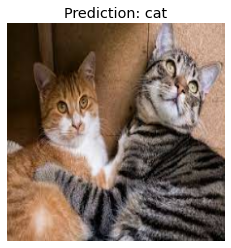

In [ ]:
pred_and_plot(exercise_model, filename = "/content/b.jfif", class_names = ["cat", "dog"])

# [NoteBook_04](https://colab.research.google.com/github/mrdbourke/tensorflow-deep-learning/blob/main/04_transfer_learning_in_tensorflow_part_1_feature_extraction.ipynb) **Transfer Learning in TensorFlow Part 1: Feature extraction**

Downloading and preparing data for our first transfer learning model

In [ ]:
# Transfer learning is using other peoples officially working NN's and using it on our problem
import tensorflow as tf
import pandas as pd
import numpy as np

In [ ]:
#Downloading the data %10 of the 10 classes food data
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_10_percent.zip

#un-zip
import zipfile
zip_ref = zipfile.ZipFile("10_food_classes_10_percent.zip")
zip_ref.extractall()
zip_ref.close()

--2021-08-10 17:08:46--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_10_percent.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.251.2.128, 74.125.137.128, 142.250.141.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.251.2.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 168546183 (161M) [application/zip]
Saving to: ‘10_food_classes_10_percent.zip’

10_food_classes_10_ 100%[===================>] 160.74M   271MB/s    in 0.6s    

2021-08-10 17:08:46 (271 MB/s) - ‘10_food_classes_10_percent.zip’ saved [168546183/168546183]



In [ ]:
# How many images
import os

#Walk through the directory and list the num of files
for dirpath, dirnames, filenames in os.walk("10_food_classes_10_percent"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

There are 2 directories and 0 images in '10_food_classes_10_percent'.
There are 10 directories and 0 images in '10_food_classes_10_percent/train'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/pizza'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/sushi'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/chicken_curry'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/steak'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/ice_cream'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/ramen'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/hamburger'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/fried_rice'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/chicken_wings'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/gr

In [ ]:
#Loading our images 
from tensorflow.keras.preprocessing.image import ImageDataGenerator

IMAGE_SHAPE = (224,224)
BATCH_SIZE = 32

train_dir = "10_food_classes_10_percent/train/"
test_dir = "10_food_classes_10_percent/test/"

train_datagen = ImageDataGenerator(rescale = 1/255.)
test_datagen = ImageDataGenerator(rescale = 1/255.)

train_data_10_percent = train_datagen.flow_from_directory(train_dir, 
                                                   target_size = IMAGE_SHAPE,
                                                   batch_size = BATCH_SIZE,
                                                   class_mode = 'categorical')

test_data_10_percent = test_datagen.flow_from_directory(test_dir, 
                                                 target_size = IMAGE_SHAPE,
                                                 batch_size = BATCH_SIZE,
                                                 class_mode = 'categorical')

Found 750 images belonging to 10 classes.
Found 2500 images belonging to 10 classes.


Introducing Callbacks in TensorFlow and making a callback to track our models

In [ ]:
#Creating a TensorBoard callback function, it helps us experiment track
import datetime

def create_tensorboard_callback(dir_name, experiment_name):
  log_dir = dir_name + "/" + experiment_name + "/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
  tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir)
  print(f"Saving TensorBoard log files to: {log_dir}")
  return tensorboard_callback

Building and compiling a TensorFlow Hub feature extraction model


In [ ]:
#Lets compare 
resnet_url = "https://tfhub.dev/google/imagenet/resnet_v2_50/feature_vector/4"
efficientnet_url = "https://tfhub.dev/tensorflow/efficientnet/b0/feature-vector/1"

In [ ]:
# import dependencies
import tensorflow_hub as hub
from tensorflow.keras import layers

In [ ]:
#Lets make a create model Func

def create_model(model_url, num_classes = 10):
  #Down,oad pretrained model and save it as a keras layers
  feature_extractor_layer = hub.KerasLayer(model_url,
                                           trainable = False,
                                           name = "feature_extraction_model",
                                           input_shape = IMAGE_SHAPE+(3,)) #freeze already learned patterns
            
  #Create our own model

  model = tf.keras.Sequential([
                               feature_extractor_layer,
                               layers.Dense(num_classes, activation = 'softmax', name = 'output_layer')
                       
                      
            ])

  return model

In [ ]:
#Create resnet model
resnet_model = create_model(resnet_url, num_classes=10)

In [ ]:
resnet_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
feature_extraction_model (Ke (None, 2048)              23564800  
_________________________________________________________________
output_layer (Dense)         (None, 10)                20490     
Total params: 23,585,290
Trainable params: 20,490
Non-trainable params: 23,564,800
_________________________________________________________________


In [ ]:
#Compile
resnet_model.compile(loss = 'categorical_crossentropy',
                     optimizer = 'Adam',
                     metrics = ["accuracy"])

Blowing our previous models out of the water with transfer learning

In [ ]:
resnet_history = resnet_model.fit(train_data_10_percent, epochs = 5,
                 steps_per_epoch = len(train_data_10_percent),
                 validation_data = test_data_10_percent,
                 validation_steps = len(test_data_10_percent),
                 callbacks = [create_tensorboard_callback(dir_name = "tensorflow_hub", experiment_name="resnet_50_v2")])

Saving TensorBoard log files to: tensorflow_hub/resnet_50_v2/20210810-170858
Epoch 1/5
24/24 [==============================] - 51s 761ms/step - loss: 1.8868 - accuracy: 0.3480 - val_loss: 1.1772 - val_accuracy: 0.6288
Epoch 2/5
24/24 [==============================] - 15s 661ms/step - loss: 0.9116 - accuracy: 0.7307 - val_loss: 0.8389 - val_accuracy: 0.7284
Epoch 3/5
24/24 [==============================] - 16s 689ms/step - loss: 0.6142 - accuracy: 0.8280 - val_loss: 0.7486 - val_accuracy: 0.7584
Epoch 4/5
24/24 [==============================] - 16s 667ms/step - loss: 0.4754 - accuracy: 0.8787 - val_loss: 0.6985 - val_accuracy: 0.7700
Epoch 5/5
24/24 [==============================] - 15s 649ms/step - loss: 0.3777 - accuracy: 0.9200 - val_loss: 0.6826 - val_accuracy: 0.7764


Ploting our loss curves

In [ ]:
#Make our function 
import matplotlib.pyplot as plt

def plot_loss_curves(history):
  loss = history.history["loss"]
  val_loss = history.history["val_loss"]

  accuracy = history.history["accuracy"]
  val_accuracy = history.history["val_accuracy"]

  epochs =  range(len(history.history["loss"]))

  plt.plot(epochs, loss, label = 'Train_loss')
  plt.plot(epochs, val_loss, label = "val_loss")
  plt.title("loss")
  plt.xlabel("Epochs")
  plt.legend()

  plt.figure()
  plt.plot(epochs, accuracy, label = "Train_ACC")
  plt.plot(epochs, val_accuracy, label = "val_accuracy")
  plt.title("ACC")
  plt.xlabel("Epochs")
  plt.legend()

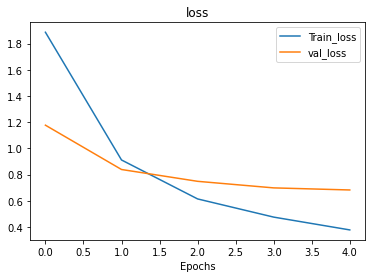

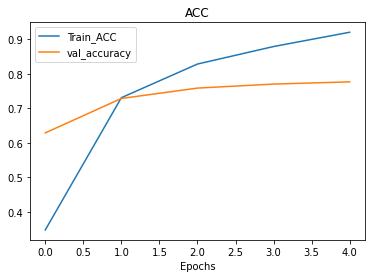

In [ ]:
plot_loss_curves(resnet_history)

Building and training a pre-trained EfficientNet model on our data

In [ ]:
#Create EfficientNet model 
efficientnet_model = create_model(efficientnet_url, num_classes = 10)

#Compile
efficientnet_model.compile(loss = 'categorical_crossentropy',
                           optimizer= "Adam",
                           metrics = ["accuracy"])

effecientnet_history = efficientnet_model.fit(train_data_10_percent,
                       epochs = 5, 
                       steps_per_epoch = len(train_data_10_percent),
                       validation_data = test_data_10_percent,
                       validation_steps = len(test_data_10_percent),
                       callbacks = [create_tensorboard_callback(dir_name = "tensorflow_hub", experiment_name='efficientnet_b0')])

Saving TensorBoard log files to: tensorflow_hub/efficientnet_b0/20210810-171106
Epoch 1/5
24/24 [==============================] - 27s 819ms/step - loss: 1.8262 - accuracy: 0.4507 - val_loss: 1.2829 - val_accuracy: 0.7444
Epoch 2/5
24/24 [==============================] - 15s 625ms/step - loss: 1.0530 - accuracy: 0.7640 - val_loss: 0.8578 - val_accuracy: 0.8280
Epoch 3/5
24/24 [==============================] - 14s 621ms/step - loss: 0.7552 - accuracy: 0.8320 - val_loss: 0.6865 - val_accuracy: 0.8504
Epoch 4/5
24/24 [==============================] - 15s 629ms/step - loss: 0.6047 - accuracy: 0.8747 - val_loss: 0.6065 - val_accuracy: 0.8560
Epoch 5/5
24/24 [==============================] - 15s 660ms/step - loss: 0.5115 - accuracy: 0.8960 - val_loss: 0.5516 - val_accuracy: 0.8640


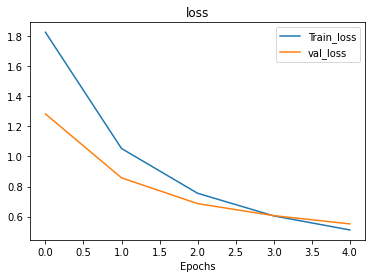

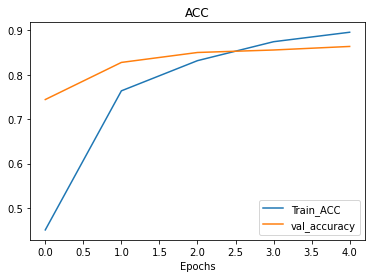

In [ ]:
plot_loss_curves(effecientnet_history)

Comparing Our Model's Results

In [ ]:
# Upload Tensorboard dev records
!tensorboard dev upload --logdir ./tensorflow_hub/ \
--name "EfficientnetB0 vs. ResNet50V2" \
--description "Two different tensorflow hub models" \
--one_shot

2021-08-10 17:12:34.979578: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudart.so.11.0

***** TensorBoard Uploader *****

This will upload your TensorBoard logs to https://tensorboard.dev/ from
the following directory:

./tensorflow_hub/

This TensorBoard will be visible to everyone. Do not upload sensitive
data.

Your use of this service is subject to Google's Terms of Service
<https://policies.google.com/terms> and Privacy Policy
<https://policies.google.com/privacy>, and TensorBoard.dev's Terms of Service
<https://tensorboard.dev/policy/terms/>.

This notice will not be shown again while you are logged into the uploader.
To log out, run `tensorboard dev auth revoke`.

Continue? (yes/NO) yes

Please visit this URL to authorize this application: https://accounts.google.com/o/oauth2/auth?response_type=code&client_id=373649185512-8v619h5kft38l4456nm2dj4ubeqsrvh6.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2

In [ ]:
# Our TensorBoard is here https://tensorboard.dev/experiment/XmJcVvKmToua43mmUacXNg/

Exercises

In [ ]:
exercise_model = create_model("https://tfhub.dev/google/imagenet/mobilenet_v2_100_224/feature_vector/5", num_classes = 10)

In [ ]:
exercise_model.compile(loss = 'categorical_crossentropy',
                       optimizer = 'Adam',
                       metrics = ['accuracy'])

In [ ]:
exercise_history = exercise_model.fit(train_data_10_percent, epochs = 5, steps_per_epoch=len(train_data_10_percent),
                   validation_data = test_data_10_percent,
                   validation_steps = len(test_data_10_percent),
                   callbacks = [create_tensorboard_callback("tensorflow_hub", experiment_name="mobilenet_v2")])

Saving TensorBoard log files to: tensorflow_hub/mobilenet_v2/20210810-172016
Epoch 1/5
24/24 [==============================] - 15s 664ms/step - loss: 0.7075 - accuracy: 0.8173 - val_loss: 0.7579 - val_accuracy: 0.7672
Epoch 2/5
24/24 [==============================] - 14s 617ms/step - loss: 0.5672 - accuracy: 0.8720 - val_loss: 0.6924 - val_accuracy: 0.7836
Epoch 3/5
24/24 [==============================] - 14s 614ms/step - loss: 0.4712 - accuracy: 0.8907 - val_loss: 0.6498 - val_accuracy: 0.7992
Epoch 4/5
24/24 [==============================] - 15s 650ms/step - loss: 0.3974 - accuracy: 0.9227 - val_loss: 0.6290 - val_accuracy: 0.7948
Epoch 5/5
24/24 [==============================] - 15s 643ms/step - loss: 0.3411 - accuracy: 0.9427 - val_loss: 0.6077 - val_accuracy: 0.8064


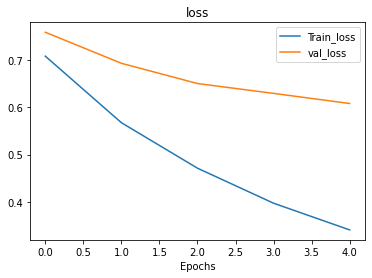

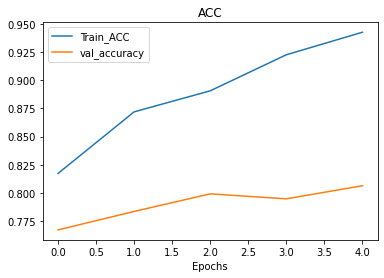

In [ ]:
plot_loss_curves(exercise_history)

# [NoteBook_05](https://colab.research.google.com/github/mrdbourke/tensorflow-deep-learning/blob/main/05_transfer_learning_in_tensorflow_part_2_fine_tuning.ipynb) **Transfer Learning in TensorFlow Part 2: Fine tuning**

Importing a script full of helper functions (and saving lots of space)

In [ ]:
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py

--2021-08-11 16:55:04--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10246 (10K) [text/plain]
Saving to: ‘helper_functions.py’

helper_functions.py 100%[===================>]  10.01K  --.-KB/s    in 0s      

2021-08-11 16:55:04 (86.4 MB/s) - ‘helper_functions.py’ saved [10246/10246]



In [ ]:
#Importing our functions that we are going to use in this notebook
from helper_functions import create_tensorboard_callback, plot_loss_curves, unzip_data, walk_through_dir

Downloading and turning our images into a TensorFlow BatchDataset

In [ ]:
#We are going to use tf.keras.applications
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_10_percent.zip

unzip_data("10_food_classes_10_percent.zip")

--2021-08-11 16:55:11--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_10_percent.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.250.136.128, 142.250.148.128, 209.85.200.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.250.136.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 168546183 (161M) [application/zip]
Saving to: ‘10_food_classes_10_percent.zip’

10_food_classes_10_ 100%[===================>] 160.74M   176MB/s    in 0.9s    

2021-08-11 16:55:12 (176 MB/s) - ‘10_food_classes_10_percent.zip’ saved [168546183/168546183]



In [ ]:
#check how many images and sub-directories
walk_through_dir("10_food_classes_10_percent")

There are 2 directories and 0 images in '10_food_classes_10_percent'.
There are 10 directories and 0 images in '10_food_classes_10_percent/test'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/fried_rice'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/ramen'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/hamburger'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/sushi'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/pizza'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/ice_cream'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/chicken_wings'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/steak'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/grilled_salmon'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/ch

In [ ]:
#Create training and test directories
train_dir = "10_food_classes_10_percent/train/"
test_dir = "10_food_classes_10_percent/test/"

In [ ]:
#this time we are going to use image data from directory
IMG_SIZE = (224,224)
BATCH_SIZE = 32
train_data_10_percent = tf.keras.preprocessing.image_dataset_from_directory(train_dir, image_size = IMG_SIZE, label_mode = "categorical", batch_size = BATCH_SIZE)
test_data = tf.keras.preprocessing.image_dataset_from_directory(test_dir, image_size=IMG_SIZE, label_mode = 'categorical', batch_size=BATCH_SIZE)

Found 750 files belonging to 10 classes.
Found 2500 files belonging to 10 classes.


In [ ]:
train_data_10_percent #makes the images into batches

<BatchDataset shapes: ((None, 224, 224, 3), (None, 10)), types: (tf.float32, tf.float32)>

In [ ]:
#Class names
train_data_10_percent.class_names

['chicken_curry',
 'chicken_wings',
 'fried_rice',
 'grilled_salmon',
 'hamburger',
 'ice_cream',
 'pizza',
 'ramen',
 'steak',
 'sushi']

In [ ]:
for images, labels in train_data_10_percent.take(1):
  print(images, labels)

tf.Tensor(
[[[[1.00000000e+00 2.00000000e+00 0.00000000e+00]
   [1.00000000e+00 2.00000000e+00 0.00000000e+00]
   [3.00000000e+00 2.00000000e+00 0.00000000e+00]
   ...
   [0.00000000e+00 1.00000000e+00 3.00000000e+00]
   [0.00000000e+00 1.00000000e+00 3.00000000e+00]
   [0.00000000e+00 2.00000000e+00 3.00000000e+00]]

  [[1.00000000e+00 2.00000000e+00 0.00000000e+00]
   [2.06632662e+00 1.06632650e+00 0.00000000e+00]
   [3.00000000e+00 2.00000000e+00 0.00000000e+00]
   ...
   [0.00000000e+00 1.00000000e+00 3.00000000e+00]
   [0.00000000e+00 1.00000000e+00 3.00000000e+00]
   [0.00000000e+00 1.00000000e+00 3.00000000e+00]]

  [[2.29081655e+00 1.71938777e+00 0.00000000e+00]
   [2.98469400e+00 1.98469388e+00 0.00000000e+00]
   [3.00000000e+00 2.00000000e+00 0.00000000e+00]
   ...
   [0.00000000e+00 1.00000000e+00 3.00000000e+00]
   [0.00000000e+00 1.00000000e+00 3.00000000e+00]
   [0.00000000e+00 1.00000000e+00 3.00000000e+00]]

  ...

  [[8.21429443e+00 2.14294434e-01 0.00000000e+00]
   [8

Creating our first model with the TensorFlow Keras Functional API

In [ ]:
#Model_0 building  a trasfer learning model using the Keras Funtional API
base_model = tf.keras.applications.EfficientNetB0(include_top = False)

#Freeze all layers
base_model.trainable = False

#Create inputs into our model
inputs = tf.keras.layers.Input(shape = (224,224,3), name = 'input_layer')

#*Optional* normalize inputs (not for efficientnet)
#x = tf.keras.layers.experimental.preprocessing.Rescaling(1/255.)(inputs0
                                                                 
#Input into the base model
x = base_model(inputs)
print(f"Shape after passing inputs through base model: {x.shape}")

#Average pool the output
x = tf.keras.layers.GlobalAveragePooling2D(name = "global_average_pooling_layer") (x)
print(f"Shape after GlobalAveragePooling2D: {x.shape}")

#Create output activation layer
outputs = tf.keras.layers.Dense(10, activation = 'softmax', name = "output_layers") (x)

#Combine inputs with the outputs into a model
model_0 = tf.keras.Model(inputs, outputs)                                                                

16711680/16705208 [==============================] - 0s 0us/step
Shape after passing inputs through base model: (None, 7, 7, 1280)
Shape after GlobalAveragePooling2D: (None, 1280)


Compiling and fitting our first Functional API model

In [ ]:
model_0.compile(loss = 'categorical_crossentropy',
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ['accuracy'])

In [ ]:
history_0 = model_0.fit(train_data_10_percent, epochs = 5,
            steps_per_epoch = len(train_data_10_percent),
            validation_data = test_data,
            validation_steps = int(0.25*len(test_data)),
            callbacks = [create_tensorboard_callback("transfer_learning", "10_percent_feature_extraction")])

Saving TensorBoard log files to: transfer_learning/10_percent_feature_extraction/20210811-165534
Epoch 1/5


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


24/24 [==============================] - 43s 440ms/step - loss: 1.9348 - accuracy: 0.3467 - val_loss: 1.3622 - val_accuracy: 0.6859
Epoch 2/5
24/24 [==============================] - 6s 253ms/step - loss: 1.1576 - accuracy: 0.7200 - val_loss: 0.9506 - val_accuracy: 0.7664
Epoch 3/5
24/24 [==============================] - 6s 251ms/step - loss: 0.8503 - accuracy: 0.8013 - val_loss: 0.7704 - val_accuracy: 0.8109
Epoch 4/5
24/24 [==============================] - 6s 254ms/step - loss: 0.6970 - accuracy: 0.8440 - val_loss: 0.6506 - val_accuracy: 0.8503
Epoch 5/5
24/24 [==============================] - 6s 253ms/step - loss: 0.5958 - accuracy: 0.8640 - val_loss: 0.6240 - val_accuracy: 0.8257


In [ ]:
model_0.evaluate(test_data)

79/79 [==============================] - 12s 144ms/step - loss: 0.6128 - accuracy: 0.8404


[0.612773060798645, 0.840399980545044]

In [ ]:
#Check the layers the layers in put base model
for layer_number, layer in enumerate(base_model.layers):
  print(layer_number, layer.name)

0 input_1
1 rescaling
2 normalization
3 stem_conv_pad
4 stem_conv
5 stem_bn
6 stem_activation
7 block1a_dwconv
8 block1a_bn
9 block1a_activation
10 block1a_se_squeeze
11 block1a_se_reshape
12 block1a_se_reduce
13 block1a_se_expand
14 block1a_se_excite
15 block1a_project_conv
16 block1a_project_bn
17 block2a_expand_conv
18 block2a_expand_bn
19 block2a_expand_activation
20 block2a_dwconv_pad
21 block2a_dwconv
22 block2a_bn
23 block2a_activation
24 block2a_se_squeeze
25 block2a_se_reshape
26 block2a_se_reduce
27 block2a_se_expand
28 block2a_se_excite
29 block2a_project_conv
30 block2a_project_bn
31 block2b_expand_conv
32 block2b_expand_bn
33 block2b_expand_activation
34 block2b_dwconv
35 block2b_bn
36 block2b_activation
37 block2b_se_squeeze
38 block2b_se_reshape
39 block2b_se_reduce
40 block2b_se_expand
41 block2b_se_excite
42 block2b_project_conv
43 block2b_project_bn
44 block2b_drop
45 block2b_add
46 block3a_expand_conv
47 block3a_expand_bn
48 block3a_expand_activation
49 block3a_dwcon

In [ ]:
model_0.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_layer (InputLayer)     [(None, 224, 224, 3)]     0         
_________________________________________________________________
efficientnetb0 (Functional)  (None, None, None, 1280)  4049571   
_________________________________________________________________
global_average_pooling_layer (None, 1280)              0         
_________________________________________________________________
output_layers (Dense)        (None, 10)                12810     
Total params: 4,062,381
Trainable params: 12,810
Non-trainable params: 4,049,571
_________________________________________________________________


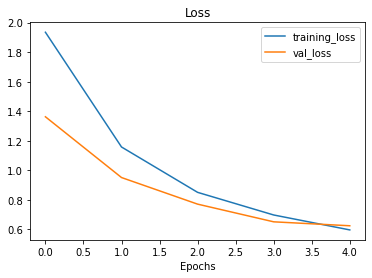

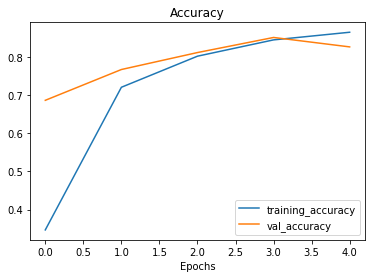

In [ ]:
plot_loss_curves(history_0)

Getting a feature vector from our trained model

In [ ]:
#Lets Demo the GlobalAveragePooling2D layer
input_shape = (1,4,4,3)

#make a random tensor
tf.random.set_seed(42)
input_tensor = tf.random.normal(input_shape)
print(f"Random input tensor:\n {input_tensor}\n")

#Check shape
print(f"shape of input_tensor: {input_tensor.shape}")
#print(f'shape of global2d tensor: {global_average_pooled_tensor.shape}')

Random input tensor:
 [[[[ 0.3274685  -0.8426258   0.3194337 ]
   [-1.4075519  -2.3880599  -1.0392479 ]
   [-0.5573232   0.539707    1.6994323 ]
   [ 0.28893656 -1.5066116  -0.2645474 ]]

  [[-0.59722406 -1.9171132  -0.62044144]
   [ 0.8504023  -0.40604794 -3.0258412 ]
   [ 0.9058464   0.29855987 -0.22561555]
   [-0.7616443  -1.8917141  -0.93847126]]

  [[ 0.77852213 -0.47338897  0.97772694]
   [ 0.24694404  0.20573747 -0.5256233 ]
   [ 0.32410017  0.02545409 -0.10638497]
   [-0.6369475   1.1603122   0.2507359 ]]

  [[-0.41728503  0.4012578  -1.4145443 ]
   [-0.5931857  -1.6617213   0.33567193]
   [ 0.10815629  0.23479682 -0.56668764]
   [-0.35819843  0.88698614  0.52744764]]]]

shape of input_tensor: (1, 4, 4, 3)


In [ ]:
#Pass the random tensor through the global average pooling 2d layer
global_average_pooled_tensor = tf.keras.layers.GlobalAveragePooling2D()(input_tensor)
print(f"2D global average pooled tensor: \n{global_average_pooled_tensor}\n ")

2D global average pooled tensor: 
[[-0.09368646 -0.45840448 -0.2885598 ]]
 


In [ ]:
#Lets replicate the global average 2d layer
tf.reduce_mean(input_tensor, axis = [1,2]) == global_average_pooled_tensor

<tf.Tensor: shape=(1, 3), dtype=bool, numpy=array([[ True,  True,  True]])>

Downloading and preparing the data for Model 1 (1 percent of training data)

In [ ]:
#We will do this for 5 models (we will use 1% for model_1)
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_1_percent.zip

unzip_data("10_food_classes_1_percent.zip")


--2021-08-11 16:59:29--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_1_percent.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.251.6.128, 74.125.126.128, 74.125.70.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.251.6.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 133612354 (127M) [application/zip]
Saving to: ‘10_food_classes_1_percent.zip’

10_food_classes_1_p 100%[===================>] 127.42M   216MB/s    in 0.6s    

2021-08-11 16:59:29 (216 MB/s) - ‘10_food_classes_1_percent.zip’ saved [133612354/133612354]



In [ ]:
train_dir_1_percent = "10_food_classes_1_percent/train/"
test_dir = "10_food_classes_1_percent/test/"

In [ ]:
walk_through_dir("10_food_classes_1_percent")

There are 2 directories and 0 images in '10_food_classes_1_percent'.
There are 10 directories and 0 images in '10_food_classes_1_percent/test'.
There are 0 directories and 250 images in '10_food_classes_1_percent/test/fried_rice'.
There are 0 directories and 250 images in '10_food_classes_1_percent/test/ramen'.
There are 0 directories and 250 images in '10_food_classes_1_percent/test/hamburger'.
There are 0 directories and 250 images in '10_food_classes_1_percent/test/sushi'.
There are 0 directories and 250 images in '10_food_classes_1_percent/test/pizza'.
There are 0 directories and 250 images in '10_food_classes_1_percent/test/ice_cream'.
There are 0 directories and 250 images in '10_food_classes_1_percent/test/chicken_wings'.
There are 0 directories and 250 images in '10_food_classes_1_percent/test/steak'.
There are 0 directories and 250 images in '10_food_classes_1_percent/test/grilled_salmon'.
There are 0 directories and 250 images in '10_food_classes_1_percent/test/chicken_curry'

In [ ]:
#Setup data loaders
IMG_SIZE = (224,224)

train_data_1_percent = tf.keras.preprocessing.image_dataset_from_directory(train_dir_1_percent, label_mode = 'categorical', image_size=IMG_SIZE)
test_data = tf.keras.preprocessing.image_dataset_from_directory(test_dir, label_mode = 'categorical', image_size = IMG_SIZE)

Found 70 files belonging to 10 classes.
Found 2500 files belonging to 10 classes.


Building a data augmentation layer to use inside our model

In [ ]:
#To add daat aug right into our model, we can use
#tf.keras.layers.experimental.preprocessing()

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import preprocessing

data_augmentation = keras.Sequential([
  tf.keras.layers.experimental.preprocessing.RandomFlip("horizontal"),
  tf.keras.layers.experimental.preprocessing.RandomRotation(0.2),
  tf.keras.layers.experimental.preprocessing.RandomZoom(0.2),
  tf.keras.layers.experimental.preprocessing.RandomHeight(0.2),
  tf.keras.layers.experimental.preprocessing.RandomWidth(0.2),
  #preproccesing.Rescale(1/255.) good for other modelsb
])

Visualising what happens when images pass through our data augmentation layer


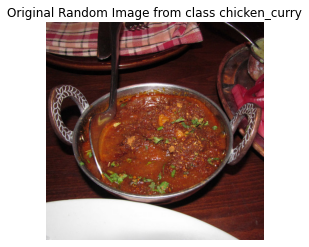

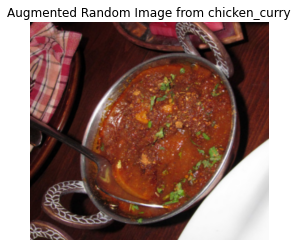

In [ ]:
#Veiw a random image and then see its augmented layer
import matplotlib.image as mpimg
import random
import os
target_classes = random.choice(train_data_1_percent.class_names)
target_dir = "10_food_classes_1_percent/train/" + target_classes

random_image = random.choice(os.listdir(target_dir))
random_image_path = target_dir + "/" + random_image

#Read in our random image
img = mpimg.imread(random_image_path)
plt.imshow(img)
plt.title(f"Original Random Image from class {target_classes}")
plt.axis(False);

#Plot augmneted random image
aug_img = data_augmentation(tf.expand_dims(img, axis = 0))
plt.figure()
plt.imshow(tf.squeeze(aug_img)/255.)
plt.title(f"Augmented Random Image from {target_classes}")
plt.axis(False);

Building Model 1 (with a data augmentation layer and 1% of training data)

In [ ]:
# Setup input shape and base model, freezing the base model layers
input_shape = (224, 224, 3)
base_model = tf.keras.applications.EfficientNetB0(include_top=False)
base_model.trainable = False

# Create input layer
inputs = layers.Input(shape=input_shape, name="input_layer")

# Add in data augmentation Sequential model as a layer
x = data_augmentation(inputs)

# Give base_model inputs (after augmentation) and don't train it
x = base_model(x, training=False)

# Pool output features of base model
x = layers.GlobalAveragePooling2D(name="global_average_pooling_layer")(x)

# Put a dense layer on as the output
outputs = layers.Dense(10, activation="softmax", name="output_layer")(x)

# Make a model with inputs and outputs
model_1 = keras.Model(inputs, outputs)

# Compile the model
model_1.compile(loss="categorical_crossentropy",
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

# Fit the model
history_1_percent = model_1.fit(train_data_1_percent,
                    epochs=5,
                    steps_per_epoch=len(train_data_1_percent),
                    validation_data=test_data,
                    validation_steps=int(0.25* len(test_data)), # validate for less steps
                    # Track model training logs
                    callbacks=[create_tensorboard_callback("transfer_learning", "1_percent_data_aug")])

Saving TensorBoard log files to: transfer_learning/1_percent_data_aug/20210811-172357
Epoch 1/5


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


3/3 [==============================] - 13s 4s/step - loss: 2.3268 - accuracy: 0.1143 - val_loss: 2.2010 - val_accuracy: 0.1859
Epoch 2/5
3/3 [==============================] - 6s 3s/step - loss: 2.1549 - accuracy: 0.1857 - val_loss: 2.0771 - val_accuracy: 0.2566
Epoch 3/5
3/3 [==============================] - 4s 2s/step - loss: 1.9554 - accuracy: 0.3571 - val_loss: 1.9795 - val_accuracy: 0.3174
Epoch 4/5
3/3 [==============================] - 6s 3s/step - loss: 1.8152 - accuracy: 0.4857 - val_loss: 1.8881 - val_accuracy: 0.3882
Epoch 5/5
3/3 [==============================] - 4s 2s/step - loss: 1.6301 - accuracy: 0.6571 - val_loss: 1.7897 - val_accuracy: 0.4408


In [ ]:
model_1.summary()

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_layer (InputLayer)     [(None, 224, 224, 3)]     0         
_________________________________________________________________
sequential (Sequential)      (None, None, None, 3)     0         
_________________________________________________________________
efficientnetb0 (Functional)  (None, None, None, 1280)  4049571   
_________________________________________________________________
global_average_pooling_layer (None, 1280)              0         
_________________________________________________________________
output_layer (Dense)         (None, 10)                12810     
Total params: 4,062,381
Trainable params: 12,810
Non-trainable params: 4,049,571
_________________________________________________________________


In [ ]:
#Evaluate on full test
results_1_precent_data_aug = model_1.evaluate(test_data)
results_1_precent_data_aug

79/79 [==============================] - 11s 140ms/step - loss: 1.8202 - accuracy: 0.4112


[1.8201689720153809, 0.41119998693466187]

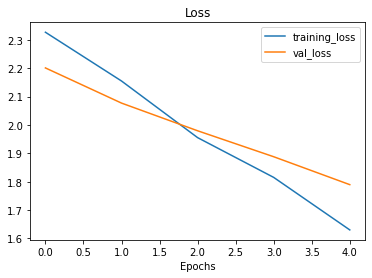

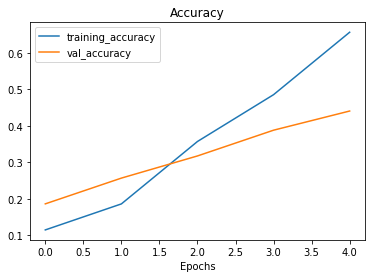

In [ ]:
plot_loss_curves(history_1_percent)

Building Model 2 (with a data augmentation layer and 10% of training data)

In [ ]:
#Model 2 with 10% data but with data augmentation
# !wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_10_percent.zip

train_dir_10_percent = "10_food_classes_10_percent/train/"
test_dir = "10_food_classes_10_percent/test/"

In [ ]:
train_data_10_percent = tf.keras.preprocessing.image_dataset_from_directory(train_dir_10_percent,
                                                                            label_mode = "categorical",
                                                                            image_size = (224,224))

test_data = tf.keras.preprocessing.image_dataset_from_directory(test_dir,
                                                                label_mode = "categorical",
                                                                image_size = (224,224))

Found 750 files belonging to 10 classes.
Found 2500 files belonging to 10 classes.


In [ ]:
# Create a functional model with data augmentation
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.layers.experimental import preprocessing
from tensorflow.keras.models import Sequential

# Build data augmentation layer
data_augmentation = Sequential([
  preprocessing.RandomFlip('horizontal'),
  preprocessing.RandomHeight(0.2),
  preprocessing.RandomWidth(0.2),
  preprocessing.RandomZoom(0.2),
  preprocessing.RandomRotation(0.2),
  # preprocessing.Rescaling(1./255) # keep for ResNet50V2, remove for EfficientNet                 
], name="data_augmentation")

# Setup the input shape to our model
input_shape = (224, 224, 3)

# Create a frozen base model
base_model = tf.keras.applications.EfficientNetB0(include_top=False)
base_model.trainable = False

# Create input and output layers
inputs = layers.Input(shape=input_shape, name="input_layer") # create input layer
x = data_augmentation(inputs) # augment our training images
x = base_model(x, training=False) # pass augmented images to base model but keep it in inference mode, so batchnorm layers don't get updated: https://keras.io/guides/transfer_learning/#build-a-model 
x = layers.GlobalAveragePooling2D(name="global_average_pooling_layer")(x)
outputs = layers.Dense(10, activation="softmax", name="output_layer")(x)
model_2 = tf.keras.Model(inputs, outputs)

# Compile
model_2.compile(loss="categorical_crossentropy",
              optimizer=tf.keras.optimizers.Adam(lr=0.001), # use Adam optimizer with base learning rate
              metrics=["accuracy"])

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [ ]:
model_2.summary()

Model: "model_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_layer (InputLayer)     [(None, 224, 224, 3)]     0         
_________________________________________________________________
data_augmentation (Sequentia (None, None, None, 3)     0         
_________________________________________________________________
efficientnetb0 (Functional)  (None, None, None, 1280)  4049571   
_________________________________________________________________
global_average_pooling_layer (None, 1280)              0         
_________________________________________________________________
output_layer (Dense)         (None, 10)                12810     
Total params: 4,062,381
Trainable params: 12,810
Non-trainable params: 4,049,571
_________________________________________________________________


Creating a ModelCheckpoint to save our model's weights during training


In [ ]:
#Set checkpoint paht
checkpoint_path = "10%_model_checkpoints_weights/checkpoint.ckpt"

#create a model checkpoint callback, models weights only (very quickly)
checkpoint_callback  =tf.keras.callbacks.ModelCheckpoint(filepath = checkpoint_path,
                                                         save_weights_only = True,
                                                         save_best_only = False,
                                                         save_freq = 'epoch',
                                                         verbose = 1)

Fit model_2 with our callback

In [ ]:
initial_epoch = 5

history_10_percent_data_aug = model_2.fit(train_data_10_percent, epochs = initial_epoch,
                                          steps_per_epoch = len(train_data_10_percent),
                                          validation_data = test_data,
                                          validation_steps = int(0.25*len(test_data)),
                                          callbacks = [create_tensorboard_callback("transfer_learning", "10_percent_data_aug"),
                                                       checkpoint_callback])

Saving TensorBoard log files to: transfer_learning/10_percent_data_aug/20210811-180301
Epoch 1/5


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


24/24 [==============================] - 21s 661ms/step - loss: 2.0407 - accuracy: 0.3253 - val_loss: 1.5339 - val_accuracy: 0.6299

Epoch 00001: saving model to 10%_model_checkpoints_weights/checkpoint.ckpt
Epoch 2/5
24/24 [==============================] - 13s 536ms/step - loss: 1.3872 - accuracy: 0.6600 - val_loss: 1.0858 - val_accuracy: 0.7632

Epoch 00002: saving model to 10%_model_checkpoints_weights/checkpoint.ckpt
Epoch 3/5
24/24 [==============================] - 10s 415ms/step - loss: 1.0692 - accuracy: 0.7280 - val_loss: 0.8738 - val_accuracy: 0.8043

Epoch 00003: saving model to 10%_model_checkpoints_weights/checkpoint.ckpt
Epoch 4/5
24/24 [==============================] - 10s 398ms/step - loss: 0.9137 - accuracy: 0.7653 - val_loss: 0.7611 - val_accuracy: 0.8224

Epoch 00004: saving model to 10%_model_checkpoints_weights/checkpoint.ckpt
Epoch 5/5
24/24 [==============================] - 12s 491ms/step - loss: 0.8191 - accuracy: 0.7867 - val_loss: 0.7179 - val_accuracy: 0.8

In [ ]:
results_10_precent_data_aug = model_2.evaluate(test_data)
results_10_precent_data_aug

79/79 [==============================] - 11s 136ms/step - loss: 0.6957 - accuracy: 0.8156


[0.6957120299339294, 0.8155999779701233]

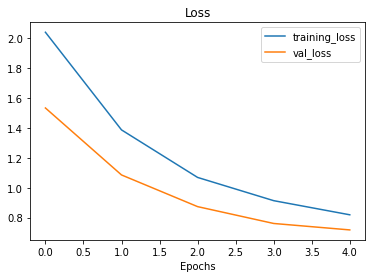

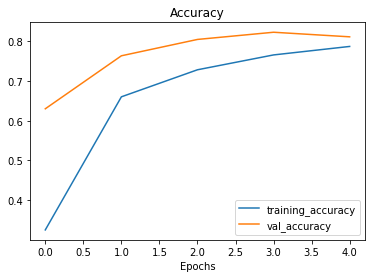

In [ ]:
plot_loss_curves(history_10_percent_data_aug)

Loading and comparing saved weights to our existing trained Model 2

In [ ]:
#Load in checkpointed weights and evaluate model
model_2.load_weights(checkpoint_path)

In [ ]:
  loaded_weights_model_results = model_2.evaluate(test_data)

79/79 [==============================] - 11s 140ms/step - loss: 0.6957 - accuracy: 0.8156


In [ ]:
results_10_percent_data_aug == loaded_weights_model_results

False

Preparing Model 3 (our first fine-tuned model)

In [ ]:
#Layers in our loaded model
model_2.layers

In [ ]:
#Are they trainable?
for layer  in model_2.layers:
  print(layer, layer.trainable)

<tensorflow.python.keras.engine.input_layer.InputLayer object at 0x7f1927d27bd0> True
<tensorflow.python.keras.engine.sequential.Sequential object at 0x7f19279b1290> True
<tensorflow.python.keras.engine.functional.Functional object at 0x7f19274c0d10> False
<tensorflow.python.keras.layers.pooling.GlobalAveragePooling2D object at 0x7f1927d278d0> True
<tensorflow.python.keras.layers.core.Dense object at 0x7f1927696a90> True


In [ ]:
#Layer in our base model
for i, layer in enumerate(model_2.layers[2].layers):
  print(i, layer.name, layer.trainable)

0 input_9 False
1 rescaling_8 False
2 normalization_8 False
3 stem_conv_pad False
4 stem_conv False
5 stem_bn False
6 stem_activation False
7 block1a_dwconv False
8 block1a_bn False
9 block1a_activation False
10 block1a_se_squeeze False
11 block1a_se_reshape False
12 block1a_se_reduce False
13 block1a_se_expand False
14 block1a_se_excite False
15 block1a_project_conv False
16 block1a_project_bn False
17 block2a_expand_conv False
18 block2a_expand_bn False
19 block2a_expand_activation False
20 block2a_dwconv_pad False
21 block2a_dwconv False
22 block2a_bn False
23 block2a_activation False
24 block2a_se_squeeze False
25 block2a_se_reshape False
26 block2a_se_reduce False
27 block2a_se_expand False
28 block2a_se_excite False
29 block2a_project_conv False
30 block2a_project_bn False
31 block2b_expand_conv False
32 block2b_expand_bn False
33 block2b_expand_activation False
34 block2b_dwconv False
35 block2b_bn False
36 block2b_activation False
37 block2b_se_squeeze False
38 block2b_se_resha

In [ ]:
#How many trainable vars are in our base model
print(len(model_2.layers[2].trainable_variables))

0


In [ ]:
#To begin fine-tuning , lets start by setting the last 10 layers of our base_model.trainable to true

base_model.trainable = True

for layer in base_model.layers[:-10]:
  layer.trainable = False

#Recompile because we changed something
model_2.compile(loss = 'categorical_crossentropy',
                optimizer = tf.keras.optimizers.Adam(lr = 0.0001), #when fine-tuning, you should lower learning rate by 10x
                metrics = ['accuracy'])


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [ ]:
#Lets check how many trainable vars
print(len(model_2.trainable_variables))

12


Fitting and evaluating Model 3 (our first fine-tuned model)

In [ ]:
#Fine tune for another 5 epochs
fine_tune_epochs = initial_epoch + 5

#Refit the model (same as model_2 except more trainable layers)
history_fine_10_percent_data_aug = model_2.fit(train_data_10_percent,
                                               epochs = fine_tune_epochs,
                                               steps_per_epoch = len(train_data_10_percent),
                                               validation_data = test_data,
                                               validation_steps = int(0.25*len(test_data)),
                                               initial_epoch = history_10_percent_data_aug.epoch[-1],
                                               callbacks = [create_tensorboard_callback("transfer_learning", "10_percent_fine_tune_last_10")])

Saving TensorBoard log files to: transfer_learning/10_percent_fine_tune_last_10/20210811-183855
Epoch 5/10


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


24/24 [==============================] - 21s 603ms/step - loss: 0.7072 - accuracy: 0.7987 - val_loss: 0.5740 - val_accuracy: 0.8158
Epoch 6/10
24/24 [==============================] - 10s 379ms/step - loss: 0.5793 - accuracy: 0.8320 - val_loss: 0.5050 - val_accuracy: 0.8306
Epoch 7/10
24/24 [==============================] - 12s 486ms/step - loss: 0.4950 - accuracy: 0.8533 - val_loss: 0.4953 - val_accuracy: 0.8306
Epoch 8/10
24/24 [==============================] - 12s 480ms/step - loss: 0.4527 - accuracy: 0.8600 - val_loss: 0.4906 - val_accuracy: 0.8306
Epoch 9/10
24/24 [==============================] - 10s 393ms/step - loss: 0.4127 - accuracy: 0.8613 - val_loss: 0.4594 - val_accuracy: 0.8454
Epoch 10/10
24/24 [==============================] - 9s 350ms/step - loss: 0.3946 - accuracy: 0.8853 - val_loss: 0.4925 - val_accuracy: 0.8174


In [ ]:
#Evaluate fine-tuned model_3 which is actually model_2 with 5 epochs fine-tuned
results_fine_tune_10_percent = model_2.evaluate(test_data)

79/79 [==============================] - 11s 139ms/step - loss: 0.5035 - accuracy: 0.8332


Comparing our model's results before and after fine-tuning


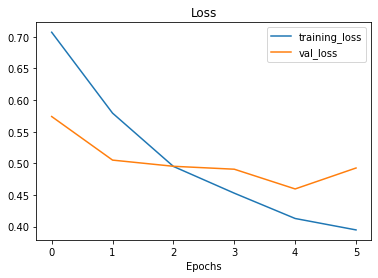

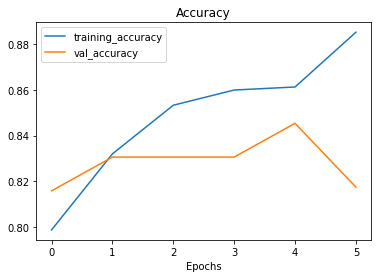

In [ ]:
#Loss curves
plot_loss_curves(history_fine_10_percent_data_aug)

In [ ]:
def compare_historys(original_history, new_history, initial_epochs=5):
    """
    Compares two model history objects.
    """
    # Get original history measurements
    acc = original_history.history["accuracy"]
    loss = original_history.history["loss"]

    print(len(acc))

    val_acc = original_history.history["val_accuracy"]
    val_loss = original_history.history["val_loss"]

    # Combine original history with new history
    total_acc = acc + new_history.history["accuracy"]
    total_loss = loss + new_history.history["loss"]

    total_val_acc = val_acc + new_history.history["val_accuracy"]
    total_val_loss = val_loss + new_history.history["val_loss"]

    print(len(total_acc))
    print(total_acc)

    # Make plots
    plt.figure(figsize=(8, 8))
    plt.subplot(2, 1, 1)
    plt.plot(total_acc, label='Training Accuracy')
    plt.plot(total_val_acc, label='Validation Accuracy')
    plt.plot([initial_epochs-1, initial_epochs-1],
              plt.ylim(), label='Start Fine Tuning') # reshift plot around epochs
    plt.legend(loc='lower right')
    plt.title('Training and Validation Accuracy')

    plt.subplot(2, 1, 2)
    plt.plot(total_loss, label='Training Loss')
    plt.plot(total_val_loss, label='Validation Loss')
    plt.plot([initial_epochs-1, initial_epochs-1],
              plt.ylim(), label='Start Fine Tuning') # reshift plot around epochs
    plt.legend(loc='upper right')
    plt.title('Training and Validation Loss')
    plt.xlabel('epoch')
    plt.show()

5
11
[0.3253333270549774, 0.6600000262260437, 0.7279999852180481, 0.765333354473114, 0.7866666913032532, 0.7986666560173035, 0.8320000171661377, 0.8533333539962769, 0.8600000143051147, 0.8613333106040955, 0.8853333592414856]


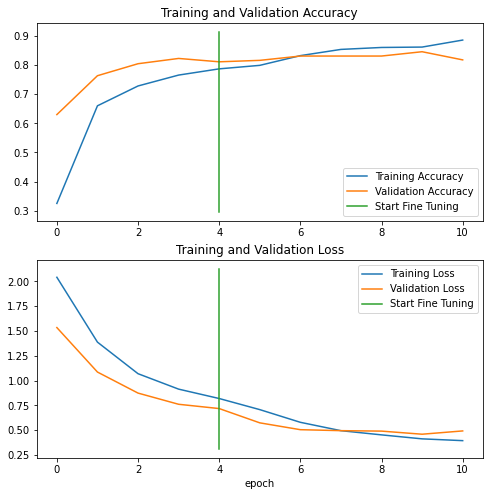

In [ ]:
compare_historys(history_10_percent_data_aug, history_fine_10_percent_data_aug, initial_epochs=5)

Downloading and preparing data for our biggest experiment yet (Model 4)


In [ ]:
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip

unzip_data("10_food_classes_all_data.zip")

--2021-08-11 18:54:54--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 173.194.194.128, 173.194.195.128, 173.194.196.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|173.194.194.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 519183241 (495M) [application/zip]
Saving to: ‘10_food_classes_all_data.zip’

10_food_classes_all 100%[===================>] 495.13M   146MB/s    in 3.4s    

2021-08-11 18:54:57 (146 MB/s) - ‘10_food_classes_all_data.zip’ saved [519183241/519183241]



In [ ]:
#Set train and test dir
train_dir_all_data = "10_food_classes_all_data/train"
test_dir = "10_food_classes_all_data/test"

In [ ]:
#how many images
walk_through_dir("10_food_classes_all_data")

There are 2 directories and 0 images in '10_food_classes_all_data'.
There are 10 directories and 0 images in '10_food_classes_all_data/test'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/fried_rice'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/ramen'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/hamburger'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/sushi'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/pizza'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/ice_cream'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/chicken_wings'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/steak'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/grilled_salmon'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/chicken_curry'.
There are 

In [ ]:
#Setup data inputs
IMG_SIZE = (224,224)

train_data_10_classes_full = tf.keras.preprocessing.image_dataset_from_directory(train_dir_all_data, label_mode = 'categorical', image_size=IMG_SIZE)
test= tf.keras.preprocessing.image_dataset_from_directory(test_dir, label_mode = 'categorical', image_size=IMG_SIZE)


Found 7500 files belonging to 10 classes.
Found 2500 files belonging to 10 classes.


Preparing our final modelling experiment (Model 4)

In [ ]:
#Evaluate model_2 (fine_tuned) 
check = model_2.evaluate(test_data)

79/79 [==============================] - 11s 137ms/step - loss: 0.5035 - accuracy: 0.8332


In [ ]:
results_fine_tune_10_percent == check

True

In [ ]:
#Revert our model back into a not fine_tuned model, but we can call the checkpoint weights
model_2.load_weights(checkpoint_path)

In [ ]:
model_2.evaluate(test_data)

79/79 [==============================] - 11s 138ms/step - loss: 0.6957 - accuracy: 0.8156


[0.6957120895385742, 0.8155999779701233]

In [ ]:
#Check to see if our model have been reverted
results_10_percent_data_aug 
 #Not showing but it works becuase they are not equal

In [ ]:
results_10_percent_data_aug == model_2.evaluate(test_data)

79/79 [==============================] - 11s 136ms/step - loss: 0.6957 - accuracy: 0.8156


False

In [ ]:
#Check which layers are tunable
for layer_number, layer in enumerate(model_2.layers):
  print(layer_number, layer.name, layer.trainable) #If any layers are trainable it will say True

0 input_layer True
1 data_augmentation True
2 efficientnetb0 True
3 global_average_pooling_layer True
4 output_layer True


In [ ]:
#Lets drill deeper
for layer_number, layer in enumerate(model_2.layers[2].layers):
  print(layer_number, layer.trainableb)

0 False
1 False
2 False
3 False
4 False
5 False
6 False
7 False
8 False
9 False
10 False
11 False
12 False
13 False
14 False
15 False
16 False
17 False
18 False
19 False
20 False
21 False
22 False
23 False
24 False
25 False
26 False
27 False
28 False
29 False
30 False
31 False
32 False
33 False
34 False
35 False
36 False
37 False
38 False
39 False
40 False
41 False
42 False
43 False
44 False
45 False
46 False
47 False
48 False
49 False
50 False
51 False
52 False
53 False
54 False
55 False
56 False
57 False
58 False
59 False
60 False
61 False
62 False
63 False
64 False
65 False
66 False
67 False
68 False
69 False
70 False
71 False
72 False
73 False
74 False
75 False
76 False
77 False
78 False
79 False
80 False
81 False
82 False
83 False
84 False
85 False
86 False
87 False
88 False
89 False
90 False
91 False
92 False
93 False
94 False
95 False
96 False
97 False
98 False
99 False
100 False
101 False
102 False
103 False
104 False
105 False
106 False
107 False
108 False
109 False
110 False


Fine-tuning Model 4 on 100% of the training data and evaluating its results


In [ ]:
model_2.compile(loss = "categorical_crossentropy",
                optimizer = tf.keras.optimizers.Adam(lr = 0.0001),
                metrics = ["accuracy"])

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [ ]:
fine_tune_epochs = initial_epoch + 5
history_full_data = model_2.fit(train_data_10_classes_full, epochs = fine_tune_epochs,
                                steps_per_epoch = len(train_data_10_classes_full),
                                validation_data = test_data,
                                validation_steps = int(0.25*len(test_data)),
                                initial_epoch = history_10_percent_data_aug.epoch[-1],
                                callbacks = [create_tensorboard_callback("transfer_learning", "full_10_classes_fine_tune_last_10")])

Saving TensorBoard log files to: transfer_learning/full_10_classes_fine_tune_last_10/20210811-191433
Epoch 5/10


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


235/235 [==============================] - 57s 221ms/step - loss: 0.7541 - accuracy: 0.7547 - val_loss: 0.4094 - val_accuracy: 0.8651
Epoch 6/10
235/235 [==============================] - 60s 255ms/step - loss: 0.6028 - accuracy: 0.8069 - val_loss: 0.3820 - val_accuracy: 0.8734
Epoch 7/10
235/235 [==============================] - 56s 237ms/step - loss: 0.5227 - accuracy: 0.8329 - val_loss: 0.3588 - val_accuracy: 0.8799
Epoch 8/10
235/235 [==============================] - 59s 249ms/step - loss: 0.4820 - accuracy: 0.8476 - val_loss: 0.3403 - val_accuracy: 0.8865
Epoch 9/10
235/235 [==============================] - 56s 239ms/step - loss: 0.4549 - accuracy: 0.8511 - val_loss: 0.3119 - val_accuracy: 0.8931
Epoch 10/10
235/235 [==============================] - 51s 215ms/step - loss: 0.4228 - accuracy: 0.8649 - val_loss: 0.3102 - val_accuracy: 0.8947


In [ ]:
#Eval on all data
results_fine_tune_full_data = model_2.evaluate(test_data)
results_fine_tune_full_data

79/79 [==============================] - 11s 137ms/step - loss: 0.3204 - accuracy: 0.8948


[0.3203941285610199, 0.8948000073432922]

5
11
[0.3253333270549774, 0.6600000262260437, 0.7279999852180481, 0.765333354473114, 0.7866666913032532, 0.7546666860580444, 0.8069333434104919, 0.8329333066940308, 0.847599983215332, 0.8510666489601135, 0.8649333119392395]


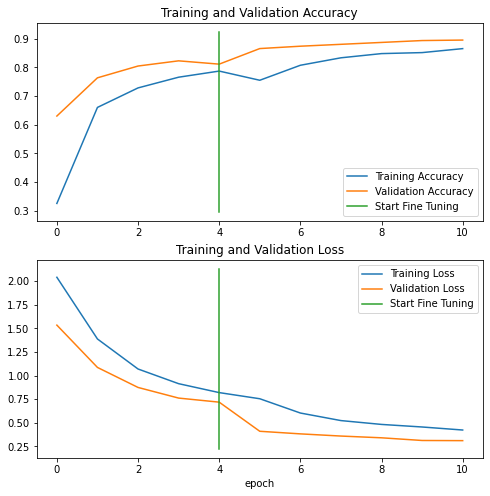

In [ ]:
#How finetuning go with more data
compare_historys(history_10_percent_data_aug, history_full_data, initial_epochs = 5)

Comparing our modelling experiment results in TensorBoard

In [ ]:
!tensorboard dev upload --logdir ./transfer_learning \
  --name "Transfer Learning Experiment with 10 Food101 Classes" \
  --description "Different transfer learning experiment" \
  --one_shot

Exercises

In [ ]:
input_shape = (224,224,3)

base_model = tf.keras.applications.EfficientNetB0(include_top = False)
base_model.trainable = False

inputs = tf.keras.layers.Input(shape = input_shape)

x = data_augmentation(inputs)
x = base_model(x, training = False)
x = layers.GlobalAveragePooling2D()(x)

outputs = tf.keras.layers.Dense(10, activation = 'softmax')(x)

exercise_model = tf.keras.Model(inputs, outputs)

exercise_model.compile(loss = 'categorical_crossentropy',
                       optimizer = 'Adam',
                       metrics = ['accuracy'])

exercise_hist = exercise_model.fit(train_data_10_percent, epochs = 10, steps_per_epoch = len(train_data_10_percent),
                   validation_data = test_data,
                   validation_steps = int(0.25*len(test_data)),
                   callbacks = [tf.keras.callbacks.ModelCheckpoint("Exercise_model_weights", save_best_only = True, save_weights_only = False, save_freq='epoch')])

Epoch 1/10
24/24 [==============================] - 14s 372ms/step - loss: 2.0314 - accuracy: 0.3160 - val_loss: 1.5223 - val_accuracy: 0.6530


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


INFO:tensorflow:Assets written to: Exercise_model_weights/assets
Epoch 2/10
24/24 [==============================] - 8s 318ms/step - loss: 1.3806 - accuracy: 0.6493 - val_loss: 1.0755 - val_accuracy: 0.7533


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


INFO:tensorflow:Assets written to: Exercise_model_weights/assets
Epoch 3/10
24/24 [==============================] - 8s 320ms/step - loss: 1.0638 - accuracy: 0.7280 - val_loss: 0.8769 - val_accuracy: 0.7796


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


INFO:tensorflow:Assets written to: Exercise_model_weights/assets
Epoch 4/10
24/24 [==============================] - 8s 330ms/step - loss: 0.9086 - accuracy: 0.7627 - val_loss: 0.7830 - val_accuracy: 0.7878


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


INFO:tensorflow:Assets written to: Exercise_model_weights/assets
Epoch 5/10
24/24 [==============================] - 8s 302ms/step - loss: 0.8186 - accuracy: 0.8067 - val_loss: 0.6939 - val_accuracy: 0.8141


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


INFO:tensorflow:Assets written to: Exercise_model_weights/assets
Epoch 6/10
24/24 [==============================] - 8s 315ms/step - loss: 0.7437 - accuracy: 0.7933 - val_loss: 0.6694 - val_accuracy: 0.7961


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


INFO:tensorflow:Assets written to: Exercise_model_weights/assets
Epoch 7/10
24/24 [==============================] - 8s 310ms/step - loss: 0.6630 - accuracy: 0.8333 - val_loss: 0.6273 - val_accuracy: 0.8174


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


INFO:tensorflow:Assets written to: Exercise_model_weights/assets
Epoch 8/10
24/24 [==============================] - 8s 315ms/step - loss: 0.6494 - accuracy: 0.8320 - val_loss: 0.6078 - val_accuracy: 0.8141


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


INFO:tensorflow:Assets written to: Exercise_model_weights/assets
Epoch 9/10
24/24 [==============================] - 8s 316ms/step - loss: 0.5987 - accuracy: 0.8507 - val_loss: 0.5964 - val_accuracy: 0.8125


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


INFO:tensorflow:Assets written to: Exercise_model_weights/assets
Epoch 10/10
24/24 [==============================] - 8s 302ms/step - loss: 0.5677 - accuracy: 0.8587 - val_loss: 0.5747 - val_accuracy: 0.8207


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


INFO:tensorflow:Assets written to: Exercise_model_weights/assets


In [ ]:
for layer in base_model.layers[:-20]:
  layer.trainable = True

exercise_model.compile(loss = 'categorical_crossentropy',
                       optimizer = tf.keras.optimizers.Adam(lr = 0.0001),
                       metrics=  ["accuracy"])

exercise_hist_fine_tune = exercise_model.fit(train_data_10_percent, epochs = 20, steps_per_epoch = len(train_data_10_percent),
                                             validation_data = test_data,
                                             validation_steps = int(0.25*len(test_data)),
                                             initial_epoch = exercise_hist.epoch[-1])

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


Epoch 10/20
24/24 [==============================] - 14s 370ms/step - loss: 0.5469 - accuracy: 0.8587 - val_loss: 0.5601 - val_accuracy: 0.8224
Epoch 11/20
24/24 [==============================] - 8s 309ms/step - loss: 0.5410 - accuracy: 0.8707 - val_loss: 0.5642 - val_accuracy: 0.8207
Epoch 12/20
24/24 [==============================] - 7s 294ms/step - loss: 0.5206 - accuracy: 0.8693 - val_loss: 0.5694 - val_accuracy: 0.8224
Epoch 13/20
24/24 [==============================] - 8s 311ms/step - loss: 0.5192 - accuracy: 0.8707 - val_loss: 0.5305 - val_accuracy: 0.8322
Epoch 14/20
24/24 [==============================] - 7s 295ms/step - loss: 0.5202 - accuracy: 0.8627 - val_loss: 0.5759 - val_accuracy: 0.8158
Epoch 15/20
24/24 [==============================] - 7s 298ms/step - loss: 0.5068 - accuracy: 0.8720 - val_loss: 0.5677 - val_accuracy: 0.8125
Epoch 16/20
24/24 [==============================] - 7s 301ms/step - loss: 0.5112 - accuracy: 0.8733 - val_loss: 0.5457 - val_accuracy: 0.824

In [ ]:
exercise_model.evaluate(test_data)

79/79 [==============================] - 11s 140ms/step - loss: 0.5434 - accuracy: 0.8360


[0.543361485004425, 0.8360000252723694]

# [NoteBook_06](https://colab.research.google.com/github/mrdbourke/tensorflow-deep-learning/blob/main/06_transfer_learning_in_tensorflow_part_3_scaling_up.ipynb) **Transfer** **Learning with TensorFlow Part 3:** **Scaling up**

Getting helper functions ready and downloading data to model


In [ ]:
# Get our helper function file
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py

--2021-08-16 16:33:43--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.111.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10246 (10K) [text/plain]
Saving to: ‘helper_functions.py’

helper_functions.py 100%[===================>]  10.01K  --.-KB/s    in 0s      

2021-08-16 16:33:44 (76.4 MB/s) - ‘helper_functions.py’ saved [10246/10246]



In [ ]:
#import our helper functions and other libraries
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from helper_functions import create_tensorboard_callback, plot_loss_curves, unzip_data, compare_historys, walk_through_dir

In [ ]:
#101 food classes but with onluy 10% of the data, but we want to crush the original food101
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/101_food_classes_10_percent.zip
unzip_data("101_food_classes_10_percent.zip")

train_dir = "101_food_classes_10_percent/train/"
test_dir = "101_food_classes_10_percent/test/"

--2021-08-16 16:33:46--  https://storage.googleapis.com/ztm_tf_course/food_vision/101_food_classes_10_percent.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 173.194.194.128, 173.194.195.128, 64.233.191.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|173.194.194.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1625420029 (1.5G) [application/zip]
Saving to: ‘101_food_classes_10_percent.zip’

101_food_classes_10 100%[===================>]   1.51G   137MB/s    in 11s     

2021-08-16 16:33:57 (143 MB/s) - ‘101_food_classes_10_percent.zip’ saved [1625420029/1625420029]



In [ ]:
walk_through_dir("10_food_classes_10_percent")

In [ ]:
#Set up data inputs
IMG_SIZE = (224,224)

train_data_all_10_percent = tf.keras.preprocessing.image_dataset_from_directory(train_dir, label_mode = 'categorical', image_size = IMG_SIZE)
test_data = tf.keras.preprocessing.image_dataset_from_directory(test_dir, label_mode = 'categorical', image_size = IMG_SIZE, shuffle = False) #dont shuffle test data for prediction analysis

Found 7575 files belonging to 101 classes.
Found 25250 files belonging to 101 classes.


Outlining the model we're going to build and building a ModelCheckpoint callback


In [ ]:
#create checkpoint callback
checkpoint_path = "101_classes_10_percent_data_model_checkpoint"
checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(checkpoint_path, save_weights_only = True, monitor = "val_accuracy", save_best_only = True)

Creating a data augmentation layer to use with our model


In [ ]:
from tensorflow.keras import layers
from tensorflow.keras.layers.experimental import preprocessing
from tensorflow.keras.models import Sequential

data_augmentation = Sequential([
  preprocessing.RandomFlip("horizontal"),
  preprocessing.RandomRotation(0.2),
  preprocessing.RandomHeight(0.2),
  preprocessing.RandomWidth(0.2),
  preprocessing.RandomZoom(0.2),
  #preprocessing.Rescale(1/255.) for ResNetV50
])

Creating a headless EfficientNetB0 model with data augmentation built in

In [ ]:
#Make a functional API model
input_shape =(224,224,3)

base_model = tf.keras.applications.EfficientNetB0(include_top=False)
base_model.trainable = False

inputs = tf.keras.layers.Input(shape = input_shape, name = "input_layer")

x = data_augmentation(inputs)
x = base_model(x, training = False)
x = layers.GlobalAveragePooling2D(name = 'pooling_layer')(x)

outputs = layers.Dense(101, activation = 'softmax', name = "output_layer")(x)

model_101_10_percent_data = tf.keras.Model(inputs, outputs)

16711680/16705208 [==============================] - 0s 0us/step


In [ ]:
#Compile our model
model_101_10_percent_data.compile(loss = 'categorical_crossentropy',
                                  optimizer = tf.keras.optimizers.Adam(),
                                  metrics = ["accuracy"])

In [ ]:
history_all_classes_10_percent = model_101_10_percent_data.fit(train_data_all_10_percent, epochs = 5, #keep experiments quick
                                                               steps_per_epoch = len(train_data_all_10_percent),
                                                               validation_data = test_data, validation_steps = int(0.15*len(test_data)),
                                                               callbacks = [checkpoint_callback])

Epoch 1/5
237/237 [==============================] - 124s 380ms/step - loss: 3.4696 - accuracy: 0.2457 - val_loss: 2.6952 - val_accuracy: 0.4012
Epoch 2/5
237/237 [==============================] - 78s 326ms/step - loss: 2.3506 - accuracy: 0.4564 - val_loss: 2.2217 - val_accuracy: 0.4762
Epoch 3/5
237/237 [==============================] - 73s 305ms/step - loss: 1.9725 - accuracy: 0.5348 - val_loss: 2.0569 - val_accuracy: 0.4960
Epoch 4/5
237/237 [==============================] - 71s 298ms/step - loss: 1.7496 - accuracy: 0.5791 - val_loss: 1.9989 - val_accuracy: 0.4979
Epoch 5/5
237/237 [==============================] - 69s 292ms/step - loss: 1.6005 - accuracy: 0.6086 - val_loss: 1.9376 - val_accuracy: 0.5064


In [ ]:
#Evalute our model
fine_tuning_results = model_101_10_percent_data.evaluate(test_data)
fine_tuning_results

790/790 [==============================] - 119s 151ms/step - loss: 1.7102 - accuracy: 0.5577


[1.7102428674697876, 0.5577029585838318]

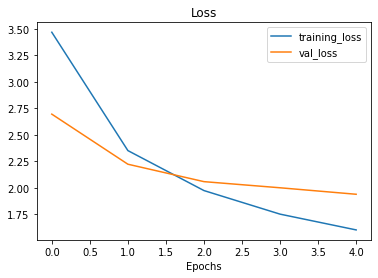

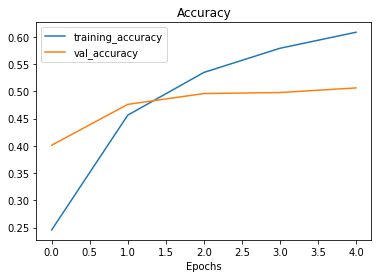

In [ ]:
plot_loss_curves(history_all_classes_10_percent)

Unfreezing some layers in our base model to prepare for fine-tuning


In [ ]:
#Unfreeze all layers in the base model

base_model.trainable = True

#Refreeze every layer  except the last 5
for layer in base_model.layers[:-5]:
  layer.trainable = False

In [ ]:
for layer in base_model.layers:
  print(layer, layer.trainable)

<tensorflow.python.keras.engine.input_layer.InputLayer object at 0x7f121f5dced0> False
<tensorflow.python.keras.layers.preprocessing.image_preprocessing.Rescaling object at 0x7f1220319950> False
<tensorflow.python.keras.layers.preprocessing.normalization.Normalization object at 0x7f121ef7add0> False
<tensorflow.python.keras.layers.convolutional.ZeroPadding2D object at 0x7f1228449490> False
<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7f121f661f10> False
<tensorflow.python.keras.layers.normalization_v2.BatchNormalization object at 0x7f121f685cd0> False
<tensorflow.python.keras.layers.core.Activation object at 0x7f121f68a410> False
<tensorflow.python.keras.layers.convolutional.DepthwiseConv2D object at 0x7f121f6c3750> False
<tensorflow.python.keras.layers.normalization_v2.BatchNormalization object at 0x7f121f6b1090> False
<tensorflow.python.keras.layers.core.Activation object at 0x7f121f68a750> False
<tensorflow.python.keras.layers.pooling.GlobalAveragePooling2D objec

In [ ]:
#Re compile with a lower learning rate
model_101_10_percent_data.compile(loss = 'categorical_crossentropy',
                                  optimizer = tf.keras.optimizers.Adam(learning_rate=0.0001),
                                  metrics = ["accuracy"])

In [ ]:
#Whatg layers are trainable
for layer in model_101_10_percent_data.layers:
  print(layer.name, layer.trainable)

input_layer True
sequential True
efficientnetb0 True
pooling_layer True
output_layer True


In [ ]:
#Check which layers are trainable
for layer_number, layer in enumerate(model_101_10_percent_data.layers[2].layers):
  print(layer_number, layer.name, layer.trainable)

0 input_1 False
1 rescaling False
2 normalization False
3 stem_conv_pad False
4 stem_conv False
5 stem_bn False
6 stem_activation False
7 block1a_dwconv False
8 block1a_bn False
9 block1a_activation False
10 block1a_se_squeeze False
11 block1a_se_reshape False
12 block1a_se_reduce False
13 block1a_se_expand False
14 block1a_se_excite False
15 block1a_project_conv False
16 block1a_project_bn False
17 block2a_expand_conv False
18 block2a_expand_bn False
19 block2a_expand_activation False
20 block2a_dwconv_pad False
21 block2a_dwconv False
22 block2a_bn False
23 block2a_activation False
24 block2a_se_squeeze False
25 block2a_se_reshape False
26 block2a_se_reduce False
27 block2a_se_expand False
28 block2a_se_excite False
29 block2a_project_conv False
30 block2a_project_bn False
31 block2b_expand_conv False
32 block2b_expand_bn False
33 block2b_expand_activation False
34 block2b_dwconv False
35 block2b_bn False
36 block2b_activation False
37 block2b_se_squeeze False
38 block2b_se_reshape F

Fine-tuning our feature extraction model and evaluating its performance


In [ ]:
#Fine tuning our model 
fine_tune_epochs = 10

fine_tune_history = model_101_10_percent_data.fit(train_data_all_10_percent, epochs= fine_tune_epochs, steps_per_epoch=len(train_data_all_10_percent),
                              validation_data = test_data, validation_steps = int(0.15*len(test_data)),
                              initial_epoch = history_all_classes_10_percent.epoch[-1])
                              #callbacks = [checkpoint_callback])

Epoch 5/10
237/237 [==============================] - 75s 286ms/step - loss: 1.3528 - accuracy: 0.6504 - val_loss: 1.8545 - val_accuracy: 0.5228
Epoch 6/10
237/237 [==============================] - 66s 278ms/step - loss: 1.2425 - accuracy: 0.6722 - val_loss: 1.8910 - val_accuracy: 0.5177
Epoch 7/10
237/237 [==============================] - 64s 270ms/step - loss: 1.1555 - accuracy: 0.6912 - val_loss: 1.8777 - val_accuracy: 0.5177
Epoch 8/10
237/237 [==============================] - 65s 274ms/step - loss: 1.0817 - accuracy: 0.7126 - val_loss: 1.8606 - val_accuracy: 0.5180
Epoch 9/10
237/237 [==============================] - 64s 268ms/step - loss: 1.0122 - accuracy: 0.7306 - val_loss: 1.8789 - val_accuracy: 0.5169
Epoch 10/10
237/237 [==============================] - 64s 267ms/step - loss: 0.9713 - accuracy: 0.7389 - val_loss: 1.8974 - val_accuracy: 0.5175


In [ ]:
all_classes_10_percent_fine_tune_results = model_101_10_percent_data.evaluate(test_data)
all_classes_10_percent_fine_tune_results

790/790 [==============================] - 119s 150ms/step - loss: 1.6030 - accuracy: 0.5787


[1.602994441986084, 0.5786534547805786]

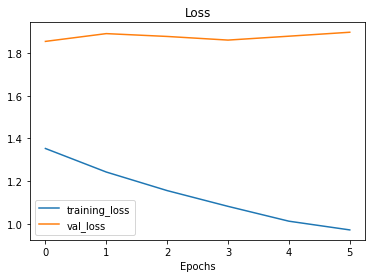

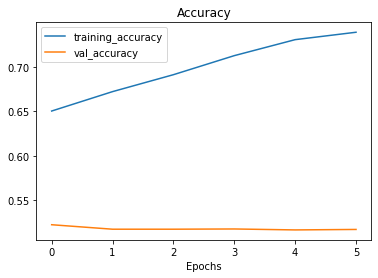

In [ ]:
plot_loss_curves(fine_tune_history)

Saving and loading our trained model

In [ ]:
model_101_10_percent_data.save("/content/drive/MyDrive/Colab Notebooks/101_food_classes_10_percent_saved_big_dog_model")

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


INFO:tensorflow:Assets written to: /content/drive/MyDrive/Colab Notebooks/101_food_classes_10_percent_saved_big_dog_model/assets


In [ ]:
loaded_model = tf.keras.models.load_model("/content/drive/MyDrive/Colab Notebooks/101_food_classes_10_percent_saved_big_dog_model")

In [ ]:
loaded_model_results = loaded_model.evaluate(test_data)
loaded_model_results

790/790 [==============================] - 121s 152ms/step - loss: 1.6030 - accuracy: 0.5787


[1.602994441986084, 0.5786534547805786]

In [ ]:
all_classes_10_percent_fine_tune_results

[1.602994441986084, 0.5786534547805786]

In [ ]:
 loaded_model_results == all_classes_10_percent_fine_tune_results

True

Downloading a pretrained model to make and evaluate predictions with


In [ ]:
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/06_101_food_class_10_percent_saved_big_dog_model.zip

--2021-08-16 16:56:59--  https://storage.googleapis.com/ztm_tf_course/food_vision/06_101_food_class_10_percent_saved_big_dog_model.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.250.152.128, 172.253.119.128, 108.177.111.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.250.152.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 46760742 (45M) [application/zip]
Saving to: ‘06_101_food_class_10_percent_saved_big_dog_model.zip’

06_101_food_class_1 100%[===================>]  44.59M   163MB/s    in 0.3s    

2021-08-16 16:57:00 (163 MB/s) - ‘06_101_food_class_10_percent_saved_big_dog_model.zip’ saved [46760742/46760742]



In [ ]:
unzip_data("/content/06_101_food_class_10_percent_saved_big_dog_model.zip")

In [ ]:
#Load saved model
model = tf.keras.models.load_model("/content/06_101_food_class_10_percent_saved_big_dog_model")

In [ ]:
#Evaluate our loaded model (downloaded)
results_downloaded_model = model.evaluate(test_data)
results_downloaded_model

790/790 [==============================] - 123s 153ms/step - loss: 1.8027 - accuracy: 0.6078


[1.8027207851409912, 0.6077623963356018]

Making predictions with our trained model on 25,250 test samples

In [ ]:
pred_probs = model.predict(test_data, verbose = 1)

790/790 [==============================] - 68s 85ms/step


In [ ]:
len(test_data)

790

In [ ]:
len(pred_probs)

25250

In [ ]:
pred_probs.shape

(25250, 101)

In [ ]:
#Lets see what the first 10 preds look like
pred_probs[:10]

array([[5.9542134e-02, 3.5742110e-06, 4.1376989e-02, ..., 1.4138677e-09,
        8.3530736e-05, 3.0897488e-03],
       [9.6401680e-01, 1.3753246e-09, 8.4780541e-04, ..., 5.4286997e-05,
        7.8362507e-12, 9.8466213e-10],
       [9.5925868e-01, 3.2533582e-05, 1.4866934e-03, ..., 7.1891060e-07,
        5.4397316e-07, 4.0275772e-05],
       ...,
       [4.7313222e-01, 1.2931199e-07, 1.4805659e-03, ..., 5.9749966e-04,
        6.6969100e-05, 2.3469256e-05],
       [4.4571884e-02, 4.7265442e-07, 1.2258486e-01, ..., 6.3498392e-06,
        7.5318376e-06, 3.6778590e-03],
       [7.2438973e-01, 1.9249813e-09, 5.2311054e-05, ..., 1.2291399e-03,
        1.5792777e-09, 9.6395757e-05]], dtype=float32)

In [ ]:
print(f"Numbr of prediction probabilities fro sample 0: {len(pred_probs[0])}")
print(f"What prediction probabililty sample 0 looks like:\n {pred_probs[0]}")
print(f"The class with the highest predicted probability: {pred_probs[0].argmax()}")

Numbr of prediction probabilities fro sample 0: 101
What prediction probabililty sample 0 looks like:
 [5.9542134e-02 3.5742110e-06 4.1376989e-02 1.0660594e-09 8.1614573e-09
 8.6639469e-09 8.0927026e-07 8.5652727e-07 1.9859068e-05 8.0977821e-07
 3.1727796e-09 9.8673718e-07 2.8532225e-04 7.8048884e-10 7.4230251e-04
 3.8916369e-05 6.4740229e-06 2.4977251e-06 3.7891088e-05 2.0678401e-07
 1.5538462e-05 8.1507005e-07 2.6230512e-06 2.0010719e-07 8.3827507e-07
 5.4215920e-06 3.7391094e-06 1.3150555e-08 2.7761490e-03 2.8051913e-05
 6.8562661e-10 2.5574802e-05 1.6688893e-04 7.6406981e-10 4.0452849e-04
 1.3150681e-08 1.7957424e-06 1.4448199e-06 2.3062952e-02 8.2466835e-07
 8.5365667e-07 1.7138624e-06 7.0525148e-06 1.8402163e-08 2.8553370e-07
 7.9483289e-06 2.0681648e-06 1.8525219e-07 3.3619635e-08 3.1522560e-04
 1.0410960e-05 8.5448096e-07 8.4741843e-01 1.0555463e-05 4.4094864e-07
 3.7404097e-05 3.5306119e-05 3.2489061e-05 6.7314468e-05 1.2852564e-08
 2.6219754e-10 1.0318126e-05 8.5744177e-05 1.

In [ ]:
test_data.class_names[52]

'gyoza'

In [ ]:
#get pred classes of each label
pred_classes = pred_probs.argmax(axis = 1)

#How to they look
pred_classes[:10]

array([52,  0,  0, 80, 79, 61, 29,  0, 85,  0])

In [ ]:
#how many pred classes do we have
len(pred_classes)

25250

Unravelling our test dataset for comparing ground truth labels to predictions

In [ ]:
y_labels = []

for images, labels in test_data.unbatch():
  y_labels.append(labels.numpy().argmax())

y_labels[:100]

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0]

Confirming our model's predictions are in the same order as the test labels

In [ ]:
from sklearn.metrics import accuracy_score

sklearn_accuracy = accuracy_score(y_labels, pred_classes)

In [ ]:
sklearn_accuracy

0.6077623762376237

In [ ]:
#Does it come to close to our models evalute
np.isclose(results_downloaded_model[1], sklearn_accuracy)

True

Creating a confusion matrix for our model's 101 different classes

In [ ]:
from helper_functions import make_confusion_matrix

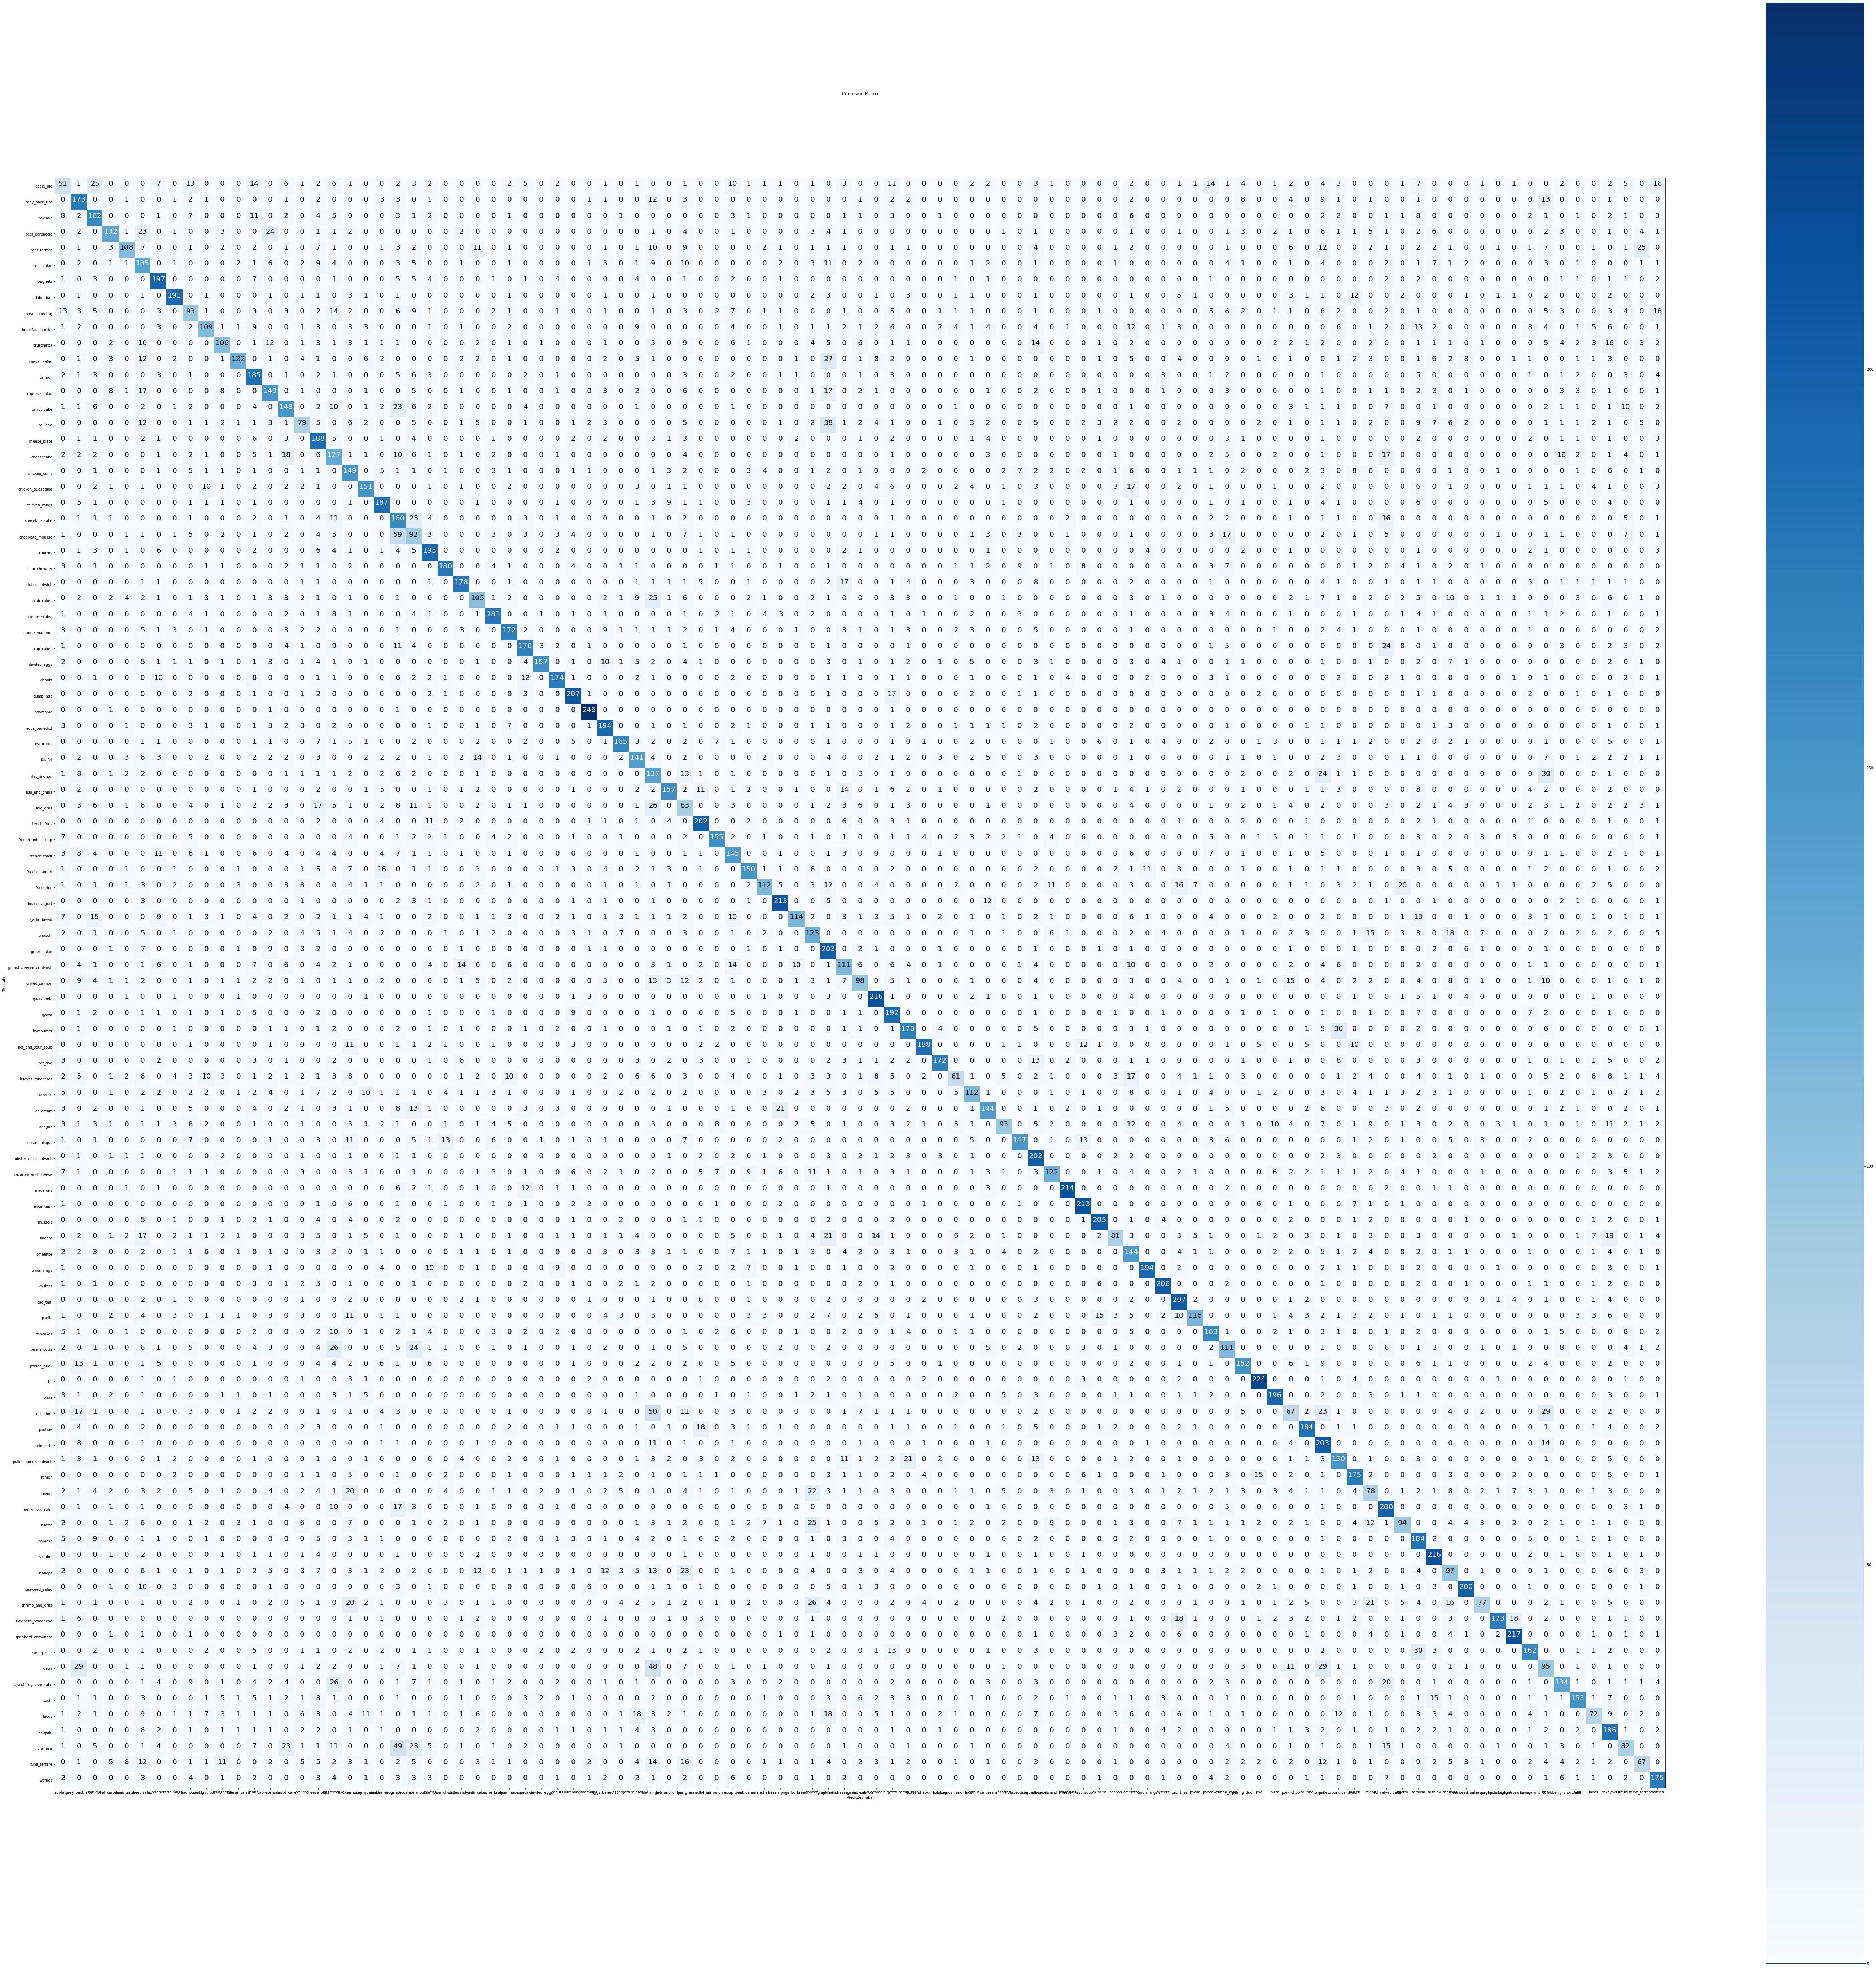

In [ ]:
make_confusion_matrix(y_labels, pred_classes, classes = test_data.class_names, figsize = (100,100),text_size=20)

In [ ]:
import itertools
from sklearn.metrics import confusion_matrix

def make_confusion_matrix(y_true, y_pred, classes=None, figsize=(10, 10), text_size=15, norm=False, savefig=False): 
  """Makes a labelled confusion matrix comparing predictions and ground truth labels.

  If classes is passed, confusion matrix will be labelled, if not, integer class values
  will be used.

  Args:
    y_true: Array of truth labels (must be same shape as y_pred).
    y_pred: Array of predicted labels (must be same shape as y_true).
    classes: Array of class labels (e.g. string form). If `None`, integer labels are used.
    figsize: Size of output figure (default=(10, 10)).
    text_size: Size of output figure text (default=15).
    norm: normalize values or not (default=False).
    savefig: save confusion matrix to file (default=False).
  
  Returns:
    A labelled confusion matrix plot comparing y_true and y_pred.

  Example usage:
    make_confusion_matrix(y_true=test_labels, # ground truth test labels
                          y_pred=y_preds, # predicted labels
                          classes=class_names, # array of class label names
                          figsize=(15, 15),
                          text_size=10)
  """  
  # Create the confustion matrix
  cm = confusion_matrix(y_true, y_pred)
  cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis] # normalize it
  n_classes = cm.shape[0] # find the number of classes we're dealing with

  # Plot the figure and make it pretty
  fig, ax = plt.subplots(figsize=figsize)
  cax = ax.matshow(cm, cmap=plt.cm.Blues) # colors will represent how 'correct' a class is, darker == better
  fig.colorbar(cax)

  # Are there a list of classes?
  if classes:
    labels = classes
  else:
    labels = np.arange(cm.shape[0])
  
  # Label the axes
  ax.set(title="Confusion Matrix",
         xlabel="Predicted label",
         ylabel="True label",
         xticks=np.arange(n_classes), # create enough axis slots for each class
         yticks=np.arange(n_classes), 
         xticklabels=labels, # axes will labeled with class names (if they exist) or ints
         yticklabels=labels)
  
  # Make x-axis labels appear on bottom
  ax.xaxis.set_label_position("bottom")
  ax.xaxis.tick_bottom()

  ##Changed (plot x-labels vertically) ##
  plt.xticks(rotation =70, fontsize = text_size)
  plt.yticks(fontsize = text_size)

  # Set the threshold for different colors
  threshold = (cm.max() + cm.min()) / 2.

  # Plot the text on each cell
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    if norm:
      plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)",
              horizontalalignment="center",
              color="white" if cm[i, j] > threshold else "black",
              size=text_size)
    else:
      plt.text(j, i, f"{cm[i, j]}",
              horizontalalignment="center",
              color="white" if cm[i, j] > threshold else "black",
              size=text_size)

  # Save the figure to the current working directory
  if savefig:
    fig.savefig("confusion_matrix.png")
  

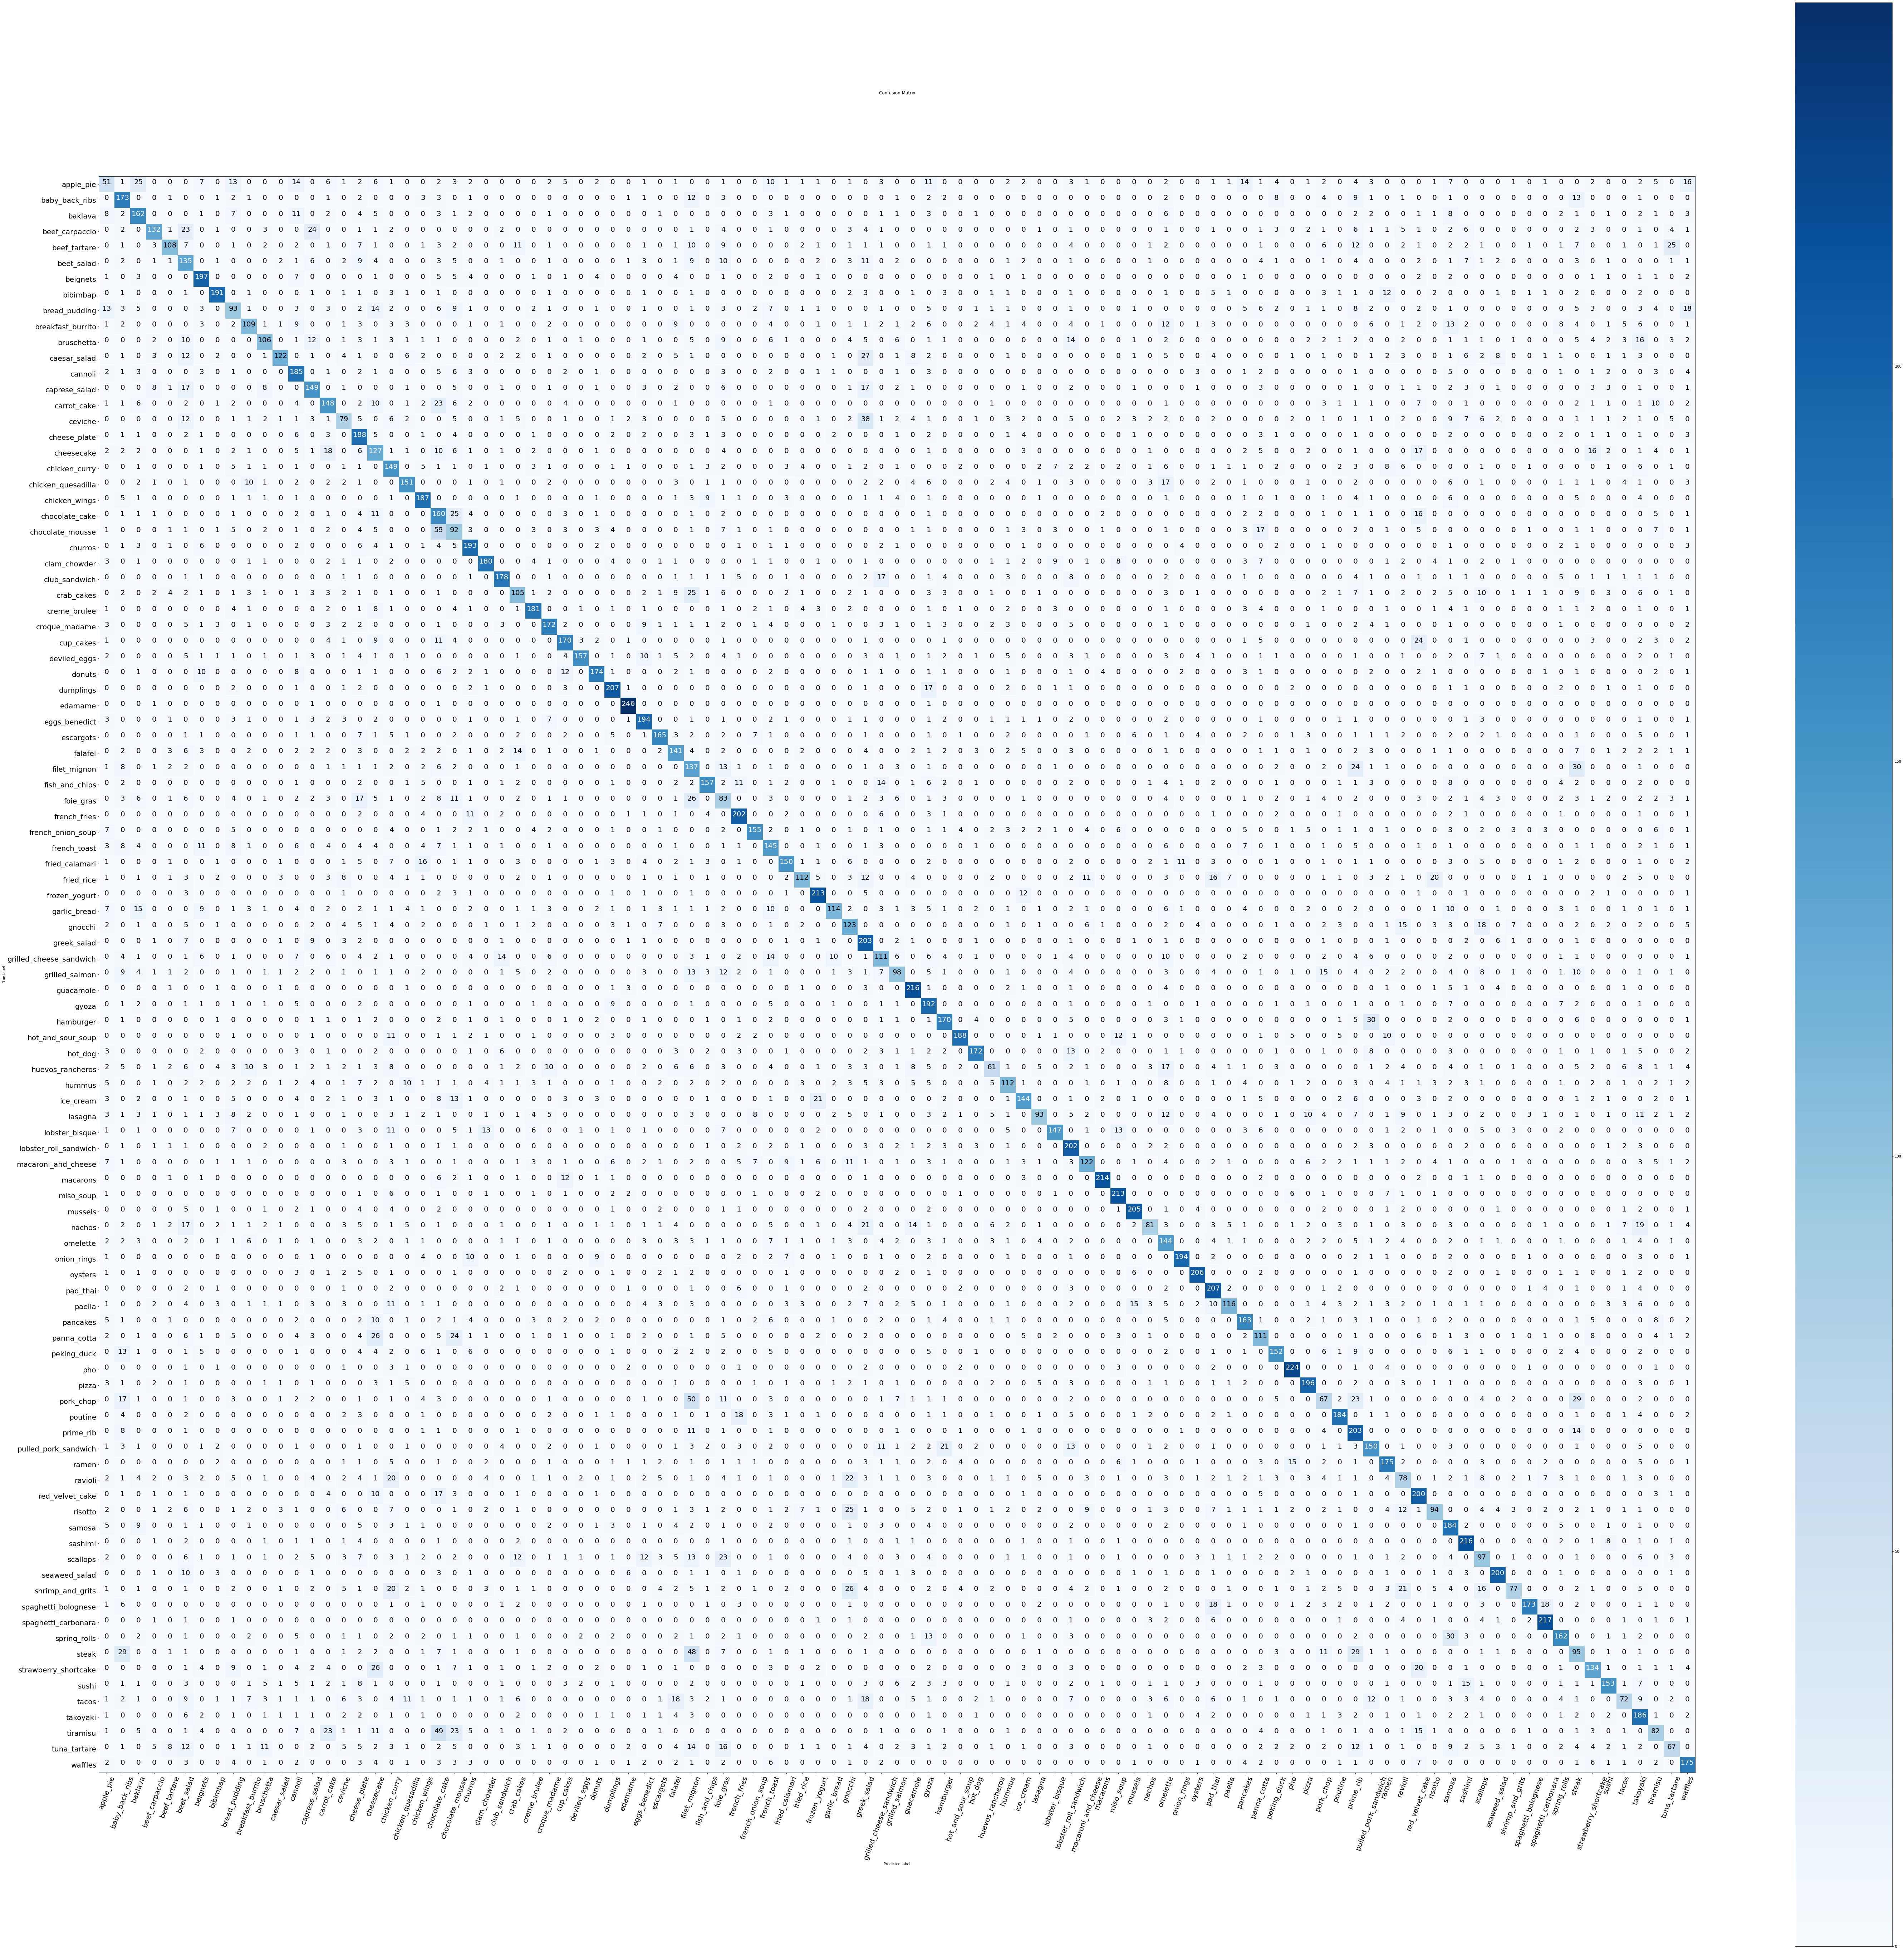

In [ ]:
make_confusion_matrix(y_labels, pred_classes, classes = test_data.class_names, figsize = (100,100),text_size=20)

Evaluating every individual class in our dataset

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_labels, pred_classes))

              precision    recall  f1-score   support

           0       0.29      0.20      0.24       250
           1       0.51      0.69      0.59       250
           2       0.56      0.65      0.60       250
           3       0.74      0.53      0.62       250
           4       0.73      0.43      0.54       250
           5       0.34      0.54      0.42       250
           6       0.67      0.79      0.72       250
           7       0.82      0.76      0.79       250
           8       0.40      0.37      0.39       250
           9       0.62      0.44      0.51       250
          10       0.62      0.42      0.50       250
          11       0.84      0.49      0.62       250
          12       0.52      0.74      0.61       250
          13       0.56      0.60      0.58       250
          14       0.56      0.59      0.57       250
          15       0.44      0.32      0.37       250
          16       0.45      0.75      0.57       250
          17       0.37    

In [ ]:
#Get a dictionary classification_report
classification_report_dict = classification_report(y_labels, pred_classes, output_dict=True)
classification_report_dict #support is how many images there are

{'0': {'f1-score': 0.24056603773584903,
  'precision': 0.29310344827586204,
  'recall': 0.204,
  'support': 250},
 '1': {'f1-score': 0.5864406779661017,
  'precision': 0.5088235294117647,
  'recall': 0.692,
  'support': 250},
 '10': {'f1-score': 0.5047619047619047,
  'precision': 0.6235294117647059,
  'recall': 0.424,
  'support': 250},
 '100': {'f1-score': 0.641025641025641,
  'precision': 0.5912162162162162,
  'recall': 0.7,
  'support': 250},
 '11': {'f1-score': 0.6161616161616161,
  'precision': 0.8356164383561644,
  'recall': 0.488,
  'support': 250},
 '12': {'f1-score': 0.6105610561056106,
  'precision': 0.5196629213483146,
  'recall': 0.74,
  'support': 250},
 '13': {'f1-score': 0.5775193798449612,
  'precision': 0.5601503759398496,
  'recall': 0.596,
  'support': 250},
 '14': {'f1-score': 0.574757281553398,
  'precision': 0.5584905660377358,
  'recall': 0.592,
  'support': 250},
 '15': {'f1-score': 0.36744186046511623,
  'precision': 0.4388888888888889,
  'recall': 0.316,
  'su

In [ ]:
class_names = test_data.class_names

In [ ]:
class_names[70]

'pad_thai'

In [ ]:
#Plot our classes F1-score
#Empty Dict
class_f1_scores = {}

#loop through our classification report dict
for k, v in classification_report_dict.items():
  if k == "accuracy": # stop once we get to accuracy key
    break
  else:
    # Append class names and f1-scores to new dictionary
    class_f1_scores[class_names[int(k)]] = v["f1-score"]
class_f1_scores

{'apple_pie': 0.24056603773584903,
 'baby_back_ribs': 0.5864406779661017,
 'baklava': 0.6022304832713754,
 'beef_carpaccio': 0.616822429906542,
 'beef_tartare': 0.544080604534005,
 'beet_salad': 0.41860465116279066,
 'beignets': 0.7229357798165138,
 'bibimbap': 0.7908902691511386,
 'bread_pudding': 0.3866943866943867,
 'breakfast_burrito': 0.5117370892018779,
 'bruschetta': 0.5047619047619047,
 'caesar_salad': 0.6161616161616161,
 'cannoli': 0.6105610561056106,
 'caprese_salad': 0.5775193798449612,
 'carrot_cake': 0.574757281553398,
 'ceviche': 0.36744186046511623,
 'cheese_plate': 0.5654135338345864,
 'cheesecake': 0.42546063651591287,
 'chicken_curry': 0.5008403361344538,
 'chicken_quesadilla': 0.6411889596602972,
 'chicken_wings': 0.7123809523809523,
 'chocolate_cake': 0.45261669024045265,
 'chocolate_mousse': 0.3291592128801431,
 'churros': 0.7134935304990757,
 'clam_chowder': 0.7708779443254817,
 'club_sandwich': 0.734020618556701,
 'crab_cakes': 0.4625550660792952,
 'creme_brulee

In [ ]:
#Turn visuallization into a dataframe
f1_scores = pd.DataFrame({"class_names": list(class_f1_scores.keys()),
                        "f1-score":list(class_f1_scores.values())}).sort_values("f1-score", ascending = False)

In [ ]:
f1_scores[:-10]

class_names  f1-score
33              edamame  0.937143
63             macarons  0.895397
75                  pho  0.866538
91  spaghetti_carbonara  0.847656
69              oysters  0.834008
..                  ...       ...
5            beet_salad  0.418605
87             scallops  0.397541
37         filet_mignon  0.387006
8         bread_pudding  0.386694
98             tiramisu  0.385882

[91 rows x 2 columns]

Plotting our model's F1-scores for each separate class

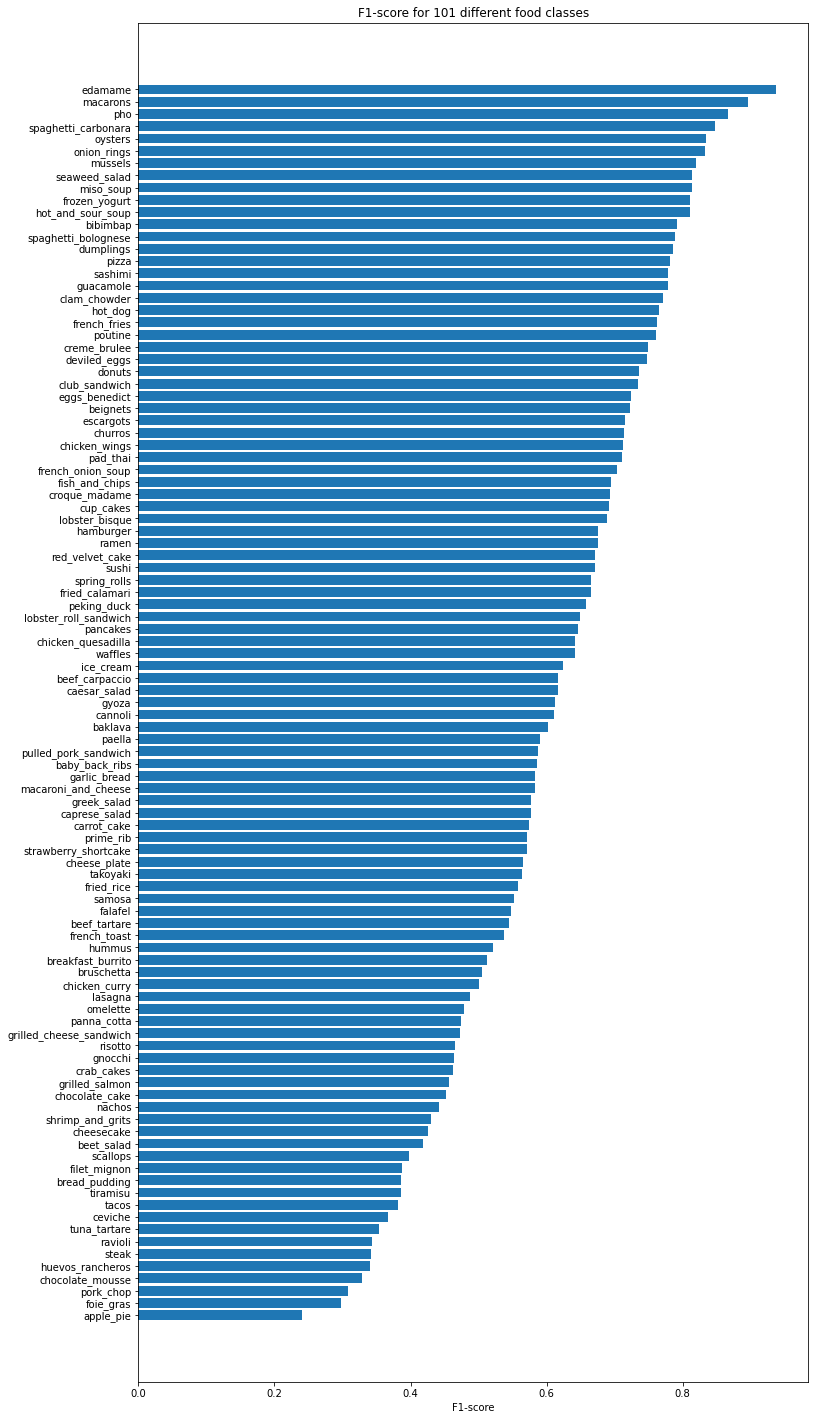

In [ ]:
fig, ax = plt.subplots(figsize = (12,25))
scores = ax.barh(range(len(f1_scores)), f1_scores["f1-score"].values)
ax.set_yticks(range(len(f1_scores)))
ax.set_yticklabels(f1_scores["class_names"]);
ax.set_xlabel("F1-score")
ax.set_title("F1-score for 101 different food classes")
ax.invert_yaxis()

Creating a function to load and prepare images for making predictions


In [ ]:
def load_and_prep_image(filename, img_shape=224, scale=True):
  """
  Reads in an image from filename, turns it into a tensor and reshapes into
  (224, 224, 3).

  Parameters
  ----------
  filename (str): string filename of target image
  img_shape (int): size to resize target image to, default 224
  scale (bool): whether to scale pixel values to range(0, 1), default True
  """
  # Read in the image
  img = tf.io.read_file(filename)
  # Decode it into a tensor
  img = tf.io.decode_image(img)
  # Resize the image
  img = tf.image.resize(img, [img_shape, img_shape])
  if scale:
    # Rescale the image (get all values between 0 and 1)
    return img/255.
  else:
    return img

Making predictions on our test images and evaluating them


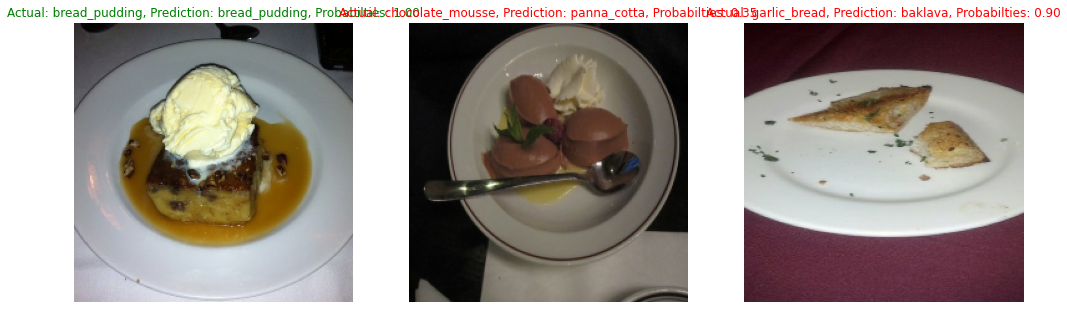

In [ ]:
import os
import random
plt.figure(figsize=(17,10))

for i in range(3):
  class_name = random.choice(class_names)
  filename = random.choice(os.listdir(test_dir + "/" + class_name))
  filepath = test_dir + class_name + "/" + filename

  #Load our image
  img = load_and_prep_image(filepath, scale = False)
  #print(img.shape)
  img_expanded = tf.expand_dims(img, axis = 0)
  #print(img_expanded.shape)
  pred_probs = model.predict(img_expanded) #Prediction Preds
  pred_class = class_names[pred_probs.argmax()] #Highest Prediction probs
  #print(pred_probs)
  #print(pred_class)

  #Plot images
  plt.subplot(1,3,i+1)
  plt.imshow(img/255.)
  if class_name == pred_class:
    title_color = 'g'
  else:
    title_color = 'r'
  plt.title(f"Actual: {class_name}, Prediction: {pred_class}, Probabilties: {pred_probs.max():.2f}", c = title_color)
  plt.axis(False);

Writing code to uncover our model's most wrong predictions

In [ ]:
#Get all file paths
filepaths = []
#Star means all
for filepath in test_data.list_files("/content/101_food_classes_10_percent/test/*/*.jpg", shuffle = False):
  filepaths.append(filepath.numpy())
filepaths

[b'/content/101_food_classes_10_percent/test/apple_pie/1011328.jpg',
 b'/content/101_food_classes_10_percent/test/apple_pie/101251.jpg',
 b'/content/101_food_classes_10_percent/test/apple_pie/1034399.jpg',
 b'/content/101_food_classes_10_percent/test/apple_pie/103801.jpg',
 b'/content/101_food_classes_10_percent/test/apple_pie/1038694.jpg',
 b'/content/101_food_classes_10_percent/test/apple_pie/1047447.jpg',
 b'/content/101_food_classes_10_percent/test/apple_pie/1068632.jpg',
 b'/content/101_food_classes_10_percent/test/apple_pie/110043.jpg',
 b'/content/101_food_classes_10_percent/test/apple_pie/1106961.jpg',
 b'/content/101_food_classes_10_percent/test/apple_pie/1113017.jpg',
 b'/content/101_food_classes_10_percent/test/apple_pie/116705.jpg',
 b'/content/101_food_classes_10_percent/test/apple_pie/1167170.jpg',
 b'/content/101_food_classes_10_percent/test/apple_pie/1174330.jpg',
 b'/content/101_food_classes_10_percent/test/apple_pie/1180600.jpg',
 b'/content/101_food_classes_10_percen

In [ ]:
# 2. Create a dataframe out of current prediction data for analysis
import pandas as pd
pred_df = pd.DataFrame({"img_path": filepaths,
                        "y_true": y_labels,
                        "y_pred": pred_classes,
                        "pred_conf": pred_probs.max(axis=1), # get the maximum prediction probability value
                        "y_true_classname": [class_names[i] for i in y_labels],
                        "y_pred_classname": [class_names[i] for i in pred_classes]}) 
pred_df.head() #PERSONAL PROBLEM, CAN'T SOLVE IT, MISTAKE IN UDEMY TEACHERS CODE

Making predictions on and plotting our own custom images

In [ ]:
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/custom_food_images.zip
unzip_data("custom_food_images.zip")

--2021-08-16 18:47:45--  https://storage.googleapis.com/ztm_tf_course/food_vision/custom_food_images.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 173.194.194.128, 173.194.195.128, 173.194.197.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|173.194.194.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 13192985 (13M) [application/zip]
Saving to: ‘custom_food_images.zip.1’

custom_food_images. 100%[===================>]  12.58M  --.-KB/s    in 0.04s   

2021-08-16 18:47:45 (302 MB/s) - ‘custom_food_images.zip.1’ saved [13192985/13192985]



In [ ]:
#Get filepaths
custom_food_images = ["custom_food_images/" + img_path for img_path in os.listdir("custom_food_images")]

In [ ]:
custom_food_images

['custom_food_images/chicken_wings.jpeg',
 'custom_food_images/steak.jpeg',
 'custom_food_images/sushi.jpeg',
 'custom_food_images/hamburger.jpeg',
 'custom_food_images/ramen.jpeg',
 'custom_food_images/pizza-dad.jpeg']

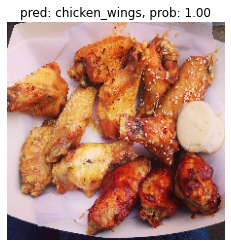

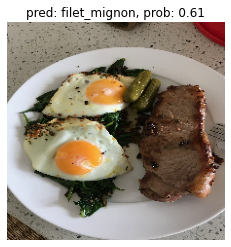

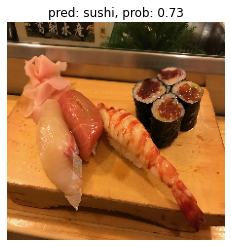

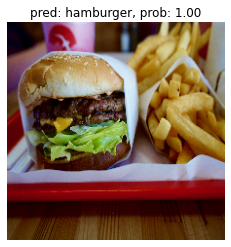

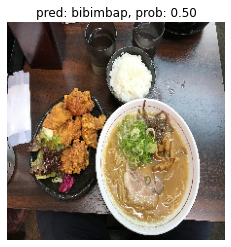

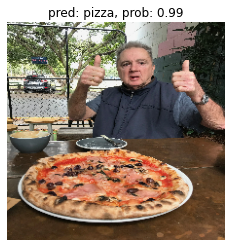

In [ ]:
# Make predictions on custom food images
for img in custom_food_images:
  img = load_and_prep_image(img, scale=False) # load in target image and turn it into tensor
  pred_prob = model.predict(tf.expand_dims(img, axis=0)) # make prediction on image with shape [None, 224, 224, 3]
  pred_class = class_names[pred_prob.argmax()] # find the predicted class label
  # Plot the image with appropriate annotations
  plt.figure()
  plt.imshow(img/255.) # imshow() requires float inputs to be normalized
  plt.title(f"pred: {pred_class}, prob: {pred_prob.max():.2f}")
  plt.axis(False)

Exercises

In [ ]:
data_aug = tf.keras.Sequential([
  preprocessing.RandomContrast(0.2),
  preprocessing.RandomHeight(0.2),
  preprocessing.RandomWidth(0.2)
])

base_model = tf.keras.applications.EfficientNetB0(include_top = False)
base_model.trainable = False
input_shape = (224,224,3)

inputs = tf.keras.layers.Input(shape = input_shape)
x = data_aug(inputs)
x = base_model(x, training = False)
x = tf.keras.layers.GlobalAveragePooling2D()(x)

outputs = tf.keras.layers.Dense(101, activation = 'softmax')(x)

exercise_model_1 = tf.keras.Model(inputs, outputs)

In [ ]:
exercise_model_1.compile(loss = 'categorical_crossentropy',
                         optimizer = "Adam",
                         metrics = ["accuracy"])

In [ ]:
exercise_hist_1 = exercise_model_1.fit(train_data_all_10_percent, epochs = 10)

Epoch 1/10
237/237 [==============================] - 42s 174ms/step - loss: 2.2774 - accuracy: 0.4957
Epoch 2/10
237/237 [==============================] - 42s 175ms/step - loss: 1.7142 - accuracy: 0.5995
Epoch 3/10
237/237 [==============================] - 42s 175ms/step - loss: 1.4374 - accuracy: 0.6562
Epoch 4/10
237/237 [==============================] - 42s 176ms/step - loss: 1.2438 - accuracy: 0.7088
Epoch 5/10
237/237 [==============================] - 41s 170ms/step - loss: 1.0915 - accuracy: 0.7447
Epoch 6/10
237/237 [==============================] - 40s 165ms/step - loss: 0.9740 - accuracy: 0.7823
Epoch 7/10
237/237 [==============================] - 39s 164ms/step - loss: 0.8724 - accuracy: 0.8091
Epoch 8/10
237/237 [==============================] - 40s 165ms/step - loss: 0.7884 - accuracy: 0.8321
Epoch 9/10
237/237 [==============================] - 39s 162ms/step - loss: 0.7168 - accuracy: 0.8502
Epoch 10/10
237/237 [==============================] - 39s 162ms/step - l

In [ ]:
base_model = tf.keras.applications.EfficientNetB0(include_top=False)
base_model.trainable = False

inputs = tf.keras.layers.Input(shape = (224,224,3))

x = data_aug(input)
x = base_model(x, training = False)
x = tf.keras.layers.GlobalAveragePooling2D()(x)

outputs = tf.keras.layers.Dense(101, activation = 'softmax')
exercise_model_2 = tf.keras.Model(inputs, outputs)

# [NoteBook_06](https://colab.research.google.com/github/mrdbourke/tensorflow-deep-learning/blob/main/07_food_vision_milestone_project_1.ipynb) **Project Food Vision Practice**
[Real Notebook](https://colab.research.google.com/drive/1kTA8B2Q3ytD_R90RxsqNDrnTdXo78eDA)

Making Sure We Have the right GPU for mixed Precision

In [ ]:
!nvidia-smi # We need to have a Tesla T4 for a mixed Precision Training

Tue Aug 17 17:12:03 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 470.57.02    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   40C    P8     9W /  70W |      0MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

Getting our helper functions ready

In [ ]:
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py

--2021-08-17 17:12:03--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.110.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10246 (10K) [text/plain]
Saving to: ‘helper_functions.py’

helper_functions.py 100%[===================>]  10.01K  --.-KB/s    in 0s      

2021-08-17 17:12:03 (102 MB/s) - ‘helper_functions.py’ saved [10246/10246]



In [ ]:
from helper_functions import create_tensorboard_callback, plot_loss_curves, compare_historys

Introduction To Tensorflow Datasets

In [ ]:
#Get Tensorflow datasets
import tensorflow_datasets as tfds

In [ ]:
datasets_list = tfds.list_builders()
print("food101" in datasets_list) #Is our dataset in the datasets

True


In [ ]:
# Load our datasets
(train_data, test_data), ds_info = tfds.load(name = "food101",
                                            split = ["train", "validation"], #validation basically test_data
                                            shuffle_files = True,
                                            as_supervised = True, #Data gets returned in tuples (data, label)
                                            with_info = True)

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

0 examples [00:00, ? examples/s]

Shuffling and writing examples to /root/tensorflow_datasets/food101/2.0.0.incomplete344UI8/food101-train.tfrecord


  0%|          | 0/75750 [00:00<?, ? examples/s]

0 examples [00:00, ? examples/s]

Shuffling and writing examples to /root/tensorflow_datasets/food101/2.0.0.incomplete344UI8/food101-validation.tfrecord


  0%|          | 0/25250 [00:00<?, ? examples/s]

Dataset food101 downloaded and prepared to /root/tensorflow_datasets/food101/2.0.0. Subsequent calls will reuse this data.


Becoming One With the Data

In [ ]:
ds_info.features

FeaturesDict({
    'image': Image(shape=(None, None, 3), dtype=tf.uint8),
    'label': ClassLabel(shape=(), dtype=tf.int64, num_classes=101),
})

In [ ]:
class_names = ds_info.features["label"].names #It is dot name for tensorflow datasets
class_names

['apple_pie',
 'baby_back_ribs',
 'baklava',
 'beef_carpaccio',
 'beef_tartare',
 'beet_salad',
 'beignets',
 'bibimbap',
 'bread_pudding',
 'breakfast_burrito',
 'bruschetta',
 'caesar_salad',
 'cannoli',
 'caprese_salad',
 'carrot_cake',
 'ceviche',
 'cheesecake',
 'cheese_plate',
 'chicken_curry',
 'chicken_quesadilla',
 'chicken_wings',
 'chocolate_cake',
 'chocolate_mousse',
 'churros',
 'clam_chowder',
 'club_sandwich',
 'crab_cakes',
 'creme_brulee',
 'croque_madame',
 'cup_cakes',
 'deviled_eggs',
 'donuts',
 'dumplings',
 'edamame',
 'eggs_benedict',
 'escargots',
 'falafel',
 'filet_mignon',
 'fish_and_chips',
 'foie_gras',
 'french_fries',
 'french_onion_soup',
 'french_toast',
 'fried_calamari',
 'fried_rice',
 'frozen_yogurt',
 'garlic_bread',
 'gnocchi',
 'greek_salad',
 'grilled_cheese_sandwich',
 'grilled_salmon',
 'guacamole',
 'gyoza',
 'hamburger',
 'hot_and_sour_soup',
 'hot_dog',
 'huevos_rancheros',
 'hummus',
 'ice_cream',
 'lasagna',
 'lobster_bisque',
 'lobster

In [ ]:
# Take one sample of the train data
train_one_sample = train_data.take(1)
train_one_sample #it will be a take dataset

<TakeDataset shapes: ((None, None, 3), ()), types: (tf.uint8, tf.int64)>

In [ ]:
#output info about our training sample
for image, label in train_one_sample: #Labels not one_hot encoded
  print(f"""
  Image Shape: {image.shape},
  Image Dtype: {image.dtype},
  Target Class from food101 (tensor form): {label},   
  Class name (str form): {class_names[label.numpy()]}
  """)


  Image Shape: (384, 512, 3),
  Image Dtype: <dtype: 'uint8'>,
  Target Class from food101 (tensor form): 97,
  Class name (str form): takoyaki
  


In [ ]:
#What does our image tensor from tfds food101 look like
image

<tf.Tensor: shape=(384, 512, 3), dtype=uint8, numpy=
array([[[ 54,  30,  26],
        [ 57,  33,  29],
        [ 72,  49,  43],
        ...,
        [192, 184, 163],
        [190, 179, 159],
        [181, 169, 147]],

       [[ 51,  28,  22],
        [ 60,  37,  31],
        [ 81,  58,  52],
        ...,
        [191, 183, 162],
        [189, 176, 157],
        [176, 164, 142]],

       [[ 78,  58,  49],
        [ 96,  76,  67],
        [122, 102,  93],
        ...,
        [191, 183, 162],
        [188, 175, 156],
        [172, 157, 136]],

       ...,

       [[162, 140, 117],
        [164, 142, 119],
        [169, 147, 126],
        ...,
        [  5,   5,   5],
        [  6,   6,   6],
        [  6,   6,   6]],

       [[168, 146, 123],
        [170, 148, 125],
        [176, 154, 131],
        ...,
        [  5,   5,   5],
        [  6,   6,   6],
        [  6,   6,   6]],

       [[173, 151, 128],
        [176, 154, 131],
        [182, 160, 137],
        ...,
        [  4,   4,   

In [ ]:
import tensorflow as tf
tf.reduce_min(image), tf.reduce_max(image)

(<tf.Tensor: shape=(), dtype=uint8, numpy=0>,
 <tf.Tensor: shape=(), dtype=uint8, numpy=255>)

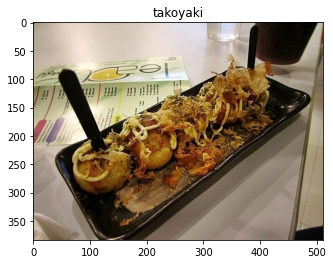

In [ ]:
#plot an image
import matplotlib.pyplot as plt
plt.imshow(image)
plt.title(class_names[label.numpy()]);

Creating a preprocessing function to prepare our data for modelling


In [ ]:
#make a function for preproccesing images
def preprocess_image(image, label, img_shape = 224):
  """ Convert image dtype to 'unint8' --> 'float32'
  and reshape image to [img_shape, img_shape, color_channels]
  """
  image = tf.image.resize(image, [img_shape, img_shape]) #Reshape our image
  return tf.cast(image, tf.float32), label #Return a tuple of float 32 images and a label tuple

In [ ]:
#Preprocces a single sample image
preprocessed_img = preprocess_image(image, label)[0]
print(f"Image before: {image[:2]}, {image.shape}, {image.dtype}")
print(f"Image After: {preprocessed_img[:2]}, {preprocessed_img.shape}, {preprocessed_img.dtype}")

Image before: [[[ 54  30  26]
  [ 57  33  29]
  [ 72  49  43]
  ...
  [192 184 163]
  [190 179 159]
  [181 169 147]]

 [[ 51  28  22]
  [ 60  37  31]
  [ 81  58  52]
  ...
  [191 183 162]
  [189 176 157]
  [176 164 142]]], (384, 512, 3), <dtype: 'uint8'>
Image After: [[[ 56.23469   32.591835  27.877552]
  [ 98.16328   75.16328   68.50001 ]
  [121.62245  101.62245   91.63265 ]
  ...
  [191.72456  191.36736  170.93883 ]
  [202.18863  196.9743   176.90286 ]
  [185.918    174.10167  153.6169  ]]

 [[ 93.47959   73.55102   64.19388 ]
  [144.57143  124.64286  113.561226]
  [169.66327  150.20409  138.79082 ]
  ...
  [196.22955  195.22955  176.80103 ]
  [202.02025  194.9335   175.87225 ]
  [182.24942  168.44324  148.72888 ]]], (224, 224, 3), <dtype: 'float32'>


Batching and preparing our datasets (to make them run fast)

In [ ]:
#Map preproccesing function to  train_data (and parallelize)
train_data = train_data.map(map_func = preprocess_image, num_parallel_calls=tf.data.AUTOTUNE)
#Shuffle train data and turn it into batchs and prefetch it
train_data = train_data.shuffle(buffer_size = 1000).batch(batch_size = 32).prefetch(buffer_size = tf.data.AUTOTUNE)

#Same for test
test_data = test_data.map(map_func = preprocess_image, num_parallel_calls = tf.data.AUTOTUNE).batch(32).prefetch(tf.data.AUTOTUNE)

In [ ]:
train_data, test_data

(<PrefetchDataset shapes: ((None, 224, 224, 3), (None,)), types: (tf.float32, tf.int64)>,
 <PrefetchDataset shapes: ((None, 224, 224, 3), (None,)), types: (tf.float32, tf.int64)>)

Creating modelling callbacks for our feature extraction model

In [ ]:
#Making our modelling callbacks 
from helper_functions import create_tensorboard_callback

#Make a modelcheckpoint callback
checkpoint_path = "model_checkpoint/cp.ckpt"
model_checkpoint = tf.keras.callbacks.ModelCheckpoint(checkpoint_path,
                                                      monitor = "val_acc",
                                                      save_best_only = True,
                                                      save_weights_only = True,
                                                      verbose = 0) 

Turning on mixed precision training

In [ ]:
from tensorflow.keras import mixed_precision
mixed_precision.set_global_policy("mixed_float16") #Global data policy to mixed precision

INFO:tensorflow:Mixed precision compatibility check (mixed_float16): OK
Your GPU will likely run quickly with dtype policy mixed_float16 as it has compute capability of at least 7.0. Your GPU: Tesla T4, compute capability 7.5


INFO:tensorflow:Mixed precision compatibility check (mixed_float16): OK
Your GPU will likely run quickly with dtype policy mixed_float16 as it has compute capability of at least 7.0. Your GPU: Tesla T4, compute capability 7.5


Creating a feature extraction model capable of using mixed precision training

In [ ]:
#Building our feature extraction model
from tensorflow.keras import layers
from tensorflow.keras.layers.experimental import preprocessing

#Make base model
input_shape = (224,224,3)
base_model = tf.keras.applications.EfficientNetB0(include_top=False)
base_model.trainable = False

inputs = layers.Input(shape = input_shape, name = 'input layer')
x = base_model(inputs, training = False)
x = layers.GlobalAveragePooling2D()(x)
x = layers.Dense(len(class_names))(x)
outputs = layers.Activation("softmax", dtype = tf.float32)(x)

model = tf.keras.Model(inputs, outputs)

model.compile(loss = tf.keras.losses.SparseCategoricalCrossentropy(),
              optimizer = tf.keras.optimizers.Adam(),
              metrics = ["accuracy"])

16719872/16705208 [==============================] - 0s 0us/step


In [ ]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input layer (InputLayer)     [(None, 224, 224, 3)]     0         
_________________________________________________________________
efficientnetb0 (Functional)  (None, None, None, 1280)  4049571   
_________________________________________________________________
global_average_pooling2d (Gl (None, 1280)              0         
_________________________________________________________________
dense (Dense)                (None, 101)               129381    
_________________________________________________________________
activation (Activation)      (None, 101)               0         
Total params: 4,178,952
Trainable params: 129,381
Non-trainable params: 4,049,571
_________________________________________________________________


Creating a feature extraction model capable of using mixed precision training

In [ ]:
#Checkingthe dtype_policy attributes
for layer in model.layers:
  print(layer.name, layer.trainable, layer.dtype, layer.dtype_policy)

input layer True float32 <Policy "float32">
efficientnetb0 False float32 <Policy "mixed_float16">
global_average_pooling2d True float32 <Policy "mixed_float16">
dense True float32 <Policy "mixed_float16">
activation True float32 <Policy "float32">


In [ ]:
for layer in base_model.layers:
  print(layer.name, layer.trainable, layer.dtype, layer.dtype_policy)

Fitting and evaluating our model

In [ ]:
model.fit(train_data, epochs = 3, steps_per_epoch = len(train_data),
          validation_data = test_data, validation_steps = int(0.15*len(test_data)),
          callbacks = [create_tensorboard_callback("tensorboard_experiment", "Food_Vision_Big_Experiment"), model_checkpoint])

Saving TensorBoard log files to: tensorboard_experiment/Food_Vision_Big_Experiment/20210817-191640
Epoch 1/3


/usr/local/lib/python3.7/dist-packages/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


2368/2368 [==============================] - 238s 85ms/step - loss: 1.8218 - accuracy: 0.5559 - val_loss: 1.2342 - val_accuracy: 0.6753


Epoch 2/3
2368/2368 [==============================] - 177s 74ms/step - loss: 1.2937 - accuracy: 0.6669 - val_loss: 1.1270 - val_accuracy: 0.6986


Epoch 3/3
2368/2368 [==============================] - 177s 74ms/step - loss: 1.1424 - accuracy: 0.7015 - val_loss: 1.0775 - val_accuracy: 0.7113


In [ ]:
whole_evaluate = model.evaluate(test_data)

790/790 [==============================] - 58s 74ms/step - loss: 1.0912 - accuracy: 0.7078


# [NoteBook_07](https://colab.research.google.com/github/mrdbourke/tensorflow-deep-learning/blob/main/08_introduction_to_nlp_in_tensorflow.ipynb) **NLP Fundementals With Tensorflow**

Preparing a notebook for our first NLP with TensorFlow project

In [ ]:
!nvidia-smi

Tue Aug 24 17:40:51 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 470.57.02    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla K80           Off  | 00000000:00:04.0 Off |                    0 |
| N/A   35C    P8    27W / 149W |      0MiB / 11441MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
#Get our helper functions
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py

--2021-08-24 17:40:52--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10246 (10K) [text/plain]
Saving to: ‘helper_functions.py’

helper_functions.py 100%[===================>]  10.01K  --.-KB/s    in 0s      

2021-08-24 17:40:53 (64.1 MB/s) - ‘helper_functions.py’ saved [10246/10246]



In [ ]:
#Import our functions
from helper_functions import unzip_data, create_tensorboard_callback, plot_loss_curves, compare_historys

In [ ]:
#Get our dataset
!wget https://storage.googleapis.com/ztm_tf_course/nlp_getting_started.zip

--2021-08-24 17:40:55--  https://storage.googleapis.com/ztm_tf_course/nlp_getting_started.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 108.177.125.128, 74.125.23.128, 74.125.203.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|108.177.125.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 607343 (593K) [application/zip]
Saving to: ‘nlp_getting_started.zip’

nlp_getting_started 100%[===================>] 593.11K  --.-KB/s    in 0.01s   

2021-08-24 17:40:56 (60.1 MB/s) - ‘nlp_getting_started.zip’ saved [607343/607343]



In [ ]:
unzip_data("nlp_getting_started.zip")

Becoming one with the data and visualising a text dataset


In [ ]:
import pandas as pd

In [ ]:
train_df = pd.read_csv("/content/train.csv")
test_df = pd.read_csv("/content/test.csv")

In [ ]:
train_df.head()

id keyword  ...                                               text target
0   1     NaN  ...  Our Deeds are the Reason of this #earthquake M...      1
1   4     NaN  ...             Forest fire near La Ronge Sask. Canada      1
2   5     NaN  ...  All residents asked to 'shelter in place' are ...      1
3   6     NaN  ...  13,000 people receive #wildfires evacuation or...      1
4   7     NaN  ...  Just got sent this photo from Ruby #Alaska as ...      1

[5 rows x 5 columns]

In [ ]:
train_df_shuffled = train_df.sample(frac = 1, random_state = 42)
train_df_shuffled

id  ... target
2644   3796  ...      1
2227   3185  ...      0
5448   7769  ...      1
132     191  ...      0
6845   9810  ...      0
...     ...  ...    ...
5226   7470  ...      0
5390   7691  ...      0
860    1242  ...      0
7603  10862  ...      1
7270  10409  ...      1

[7613 rows x 5 columns]

In [ ]:
#Test Data
test_df.head()

id keyword location                                               text
0   0     NaN      NaN                 Just happened a terrible car crash
1   2     NaN      NaN  Heard about #earthquake is different cities, s...
2   3     NaN      NaN  there is a forest fire at spot pond, geese are...
3   9     NaN      NaN           Apocalypse lighting. #Spokane #wildfires
4  11     NaN      NaN      Typhoon Soudelor kills 28 in China and Taiwan

In [ ]:
train_df.target.value_counts()

0    4342
1    3271
Name: target, dtype: int64

In [ ]:
len(train_df), len(test_df)

(7613, 3263)

In [ ]:
#Visualize Random Sample
import random
random_sample = random.randint(0, len(train_df)-5)
for row in train_df_shuffled[["text", "target"]][random_sample:random_sample+5].itertuples():
  _, text, target = row
  print(f"Target: {target}", "(real disaster)" if target > 0 else "(not real disaster")
  print(f"Text:\n{text}\n")
  print("-------------------------------------------------\n")

Target: 0 (not real disaster
Text:
@Casper_rmg @BestComedyVine whats cracking cuz

-------------------------------------------------

Target: 1 (real disaster)
Text:
Californian Bush Fires 2015 http://t.co/rjdX29wosp

-------------------------------------------------

Target: 0 (not real disaster
Text:
That horrible moment when u open up the dryer and it looks like a snowy blizzard cuz u left a piece of paper in your jeans pocket ??

-------------------------------------------------

Target: 0 (not real disaster
Text:
Well me and dad survived my driving ????????

-------------------------------------------------

Target: 1 (real disaster)
Text:
The horrific story of being a hostage - The horrific story of being a hostage It's 1974 and on a British... http://t.co/XcQ48OuRvL

-------------------------------------------------



Splitting data into training and validation sets

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
#Use the train test split to split our data into training and validation
train_sentences, val_sentences, train_labels, val_labels = train_test_split(train_df_shuffled["text"].to_numpy(), train_df_shuffled["target"].to_numpy(), test_size = 0.1, random_state = 42)

In [ ]:
len(train_labels), len(train_sentences), len(val_sentences), len(val_labels)

(6851, 6851, 762, 762)

In [ ]:
train_sentences[:10], train_labels[:10]

(array(['@mogacola @zamtriossu i screamed after hitting tweet',
        'Imagine getting flattened by Kurt Zouma',
        '@Gurmeetramrahim #MSGDoing111WelfareWorks Green S welfare force ke appx 65000 members har time disaster victim ki help ke liye tyar hai....',
        "@shakjn @C7 @Magnums im shaking in fear he's gonna hack the planet",
        'Somehow find you and I collide http://t.co/Ee8RpOahPk',
        '@EvaHanderek @MarleyKnysh great times until the bus driver held us hostage in the mall parking lot lmfao',
        'destroy the free fandom honestly',
        'Weapons stolen from National Guard Armory in New Albany still missing #Gunsense http://t.co/lKNU8902JE',
        '@wfaaweather Pete when will the heat wave pass? Is it really going to be mid month? Frisco Boy Scouts have a canoe trip in Okla.',
        'Patient-reported outcomes in long-term survivors of metastatic colorectal cancer - British Journal of Surgery http://t.co/5Yl4DC1Tqt'],
       dtype=object), array([0, 

 Setting up a TensorFlow TextVectorization layer to convert text to numbers

In [ ]:
train_sentences[:10]

array(['@mogacola @zamtriossu i screamed after hitting tweet',
       'Imagine getting flattened by Kurt Zouma',
       '@Gurmeetramrahim #MSGDoing111WelfareWorks Green S welfare force ke appx 65000 members har time disaster victim ki help ke liye tyar hai....',
       "@shakjn @C7 @Magnums im shaking in fear he's gonna hack the planet",
       'Somehow find you and I collide http://t.co/Ee8RpOahPk',
       '@EvaHanderek @MarleyKnysh great times until the bus driver held us hostage in the mall parking lot lmfao',
       'destroy the free fandom honestly',
       'Weapons stolen from National Guard Armory in New Albany still missing #Gunsense http://t.co/lKNU8902JE',
       '@wfaaweather Pete when will the heat wave pass? Is it really going to be mid month? Frisco Boy Scouts have a canoe trip in Okla.',
       'Patient-reported outcomes in long-term survivors of metastatic colorectal cancer - British Journal of Surgery http://t.co/5Yl4DC1Tqt'],
      dtype=object)

In [ ]:
import tensorflow as tf
from tensorflow.keras.layers.experimental.preprocessing import TextVectorization

In [ ]:
#Use default text vectorization parameters
text_vectorizer = TextVectorization(max_tokens = 10000, #how many words in the vocabulary
                                    standardize = "lower_and_strip_punctuation", 
                                    split = "whitespace",
                                    ngrams = None, #How many words per group None means 1
                                    output_mode = "int",
                                    output_sequence_length = None, #how long sequences
                                    pad_to_max_tokens = True)#Pad with zeros)

In [ ]:
#Find the average lengths of each sample in the traning tweets
round(sum([len(i.split()) for i in train_sentences])/len(train_sentences))

15

In [ ]:
#Setup text vectorization variables
max_vocab_length = 10000 #Max number of words in our vocab
max_length = 15 # Our average tweet 

In [ ]:
text_vectorizer = TextVectorization(max_tokens = max_vocab_length,
                                    output_mode = 'int', 
                                    output_sequence_length = max_length)

Mapping the TextVectorization layer to text data and turning it into numbers

In [ ]:
#Fit the text vecotrizer to the train sentences
text_vectorizer.adapt(train_sentences)

In [ ]:
sample_sentence = "There's a flood in my street!"

text_vectorizer([sample_sentence])

<tf.Tensor: shape=(1, 15), dtype=int64, numpy=
array([[264,   3, 232,   4,  13, 698,   0,   0,   0,   0,   0,   0,   0,
          0,   0]])>

In [ ]:
random_sentence = random.choice(train_sentences)

print(f"Original text:\n {random_sentence}\
        \n\nVectorized Version: {text_vectorizer([random_sentence])}")

Original text:
 ? 19th Day Since 17-Jul-2015 -- Nigeria: Suicide Bomb Attacks Killed 64 People; Blamed: Boko Haram [L.A. Times/AP] | http://t.co/O2cdKpSDfp        

Vectorized Version: [[   1  101  216    1 2839   87  108 1553  111 6306   57 2183 4078 2969
   649]]


In [ ]:
#Get the unique words in the vocabulary
words_in_vocab = text_vectorizer.get_vocabulary()

In [ ]:
top_5_words = words_in_vocab[:5]

In [ ]:
print(len(words_in_vocab))
print(top_5_words)
print(words_in_vocab[-5:])

10000
['', '[UNK]', 'the', 'a', 'in']
['pages', 'paeds', 'pads', 'padres', 'paddytomlinson1']


Creating an Embedding layer to turn tokenised text into embedding vectors

In [ ]:
from tensorflow.keras.layers import Embedding

In [ ]:
embedding = Embedding(input_dim=max_vocab_length,
                      output_dim = 128,
                      input_length = max_length)

In [ ]:
random_sentence = random.choice(train_sentences)
print(random_sentence)
print(embedding(text_vectorizer([sample_sentence])))

Maryland mansion fire that killed 6 caused by damaged plug under Christmas tree report says - Into the flames... http://t.co/P1WmkXA9d8
tf.Tensor(
[[[-0.0332517  -0.03130217 -0.04394038 ...  0.02175479 -0.00976329
    0.00598569]
  [ 0.01045477  0.02102851 -0.02213706 ...  0.00735024  0.00755765
    0.03438726]
  [ 0.04174937  0.04624546  0.01665387 ...  0.01086392  0.04134733
   -0.03763075]
  ...
  [ 0.01157995  0.0436682   0.02635683 ... -0.02840999  0.01418805
    0.02839847]
  [ 0.01157995  0.0436682   0.02635683 ... -0.02840999  0.01418805
    0.02839847]
  [ 0.01157995  0.0436682   0.02635683 ... -0.02840999  0.01418805
    0.02839847]]], shape=(1, 15, 128), dtype=float32)


In [ ]:
#Check a singles tokens embedding 
sample_embed = embedding(text_vectorizer([sample_sentence]))

sample_embed[0][0], sample_embed[0][0].shape, random_sentence

(<tf.Tensor: shape=(128,), dtype=float32, numpy=
 array([-0.0332517 , -0.03130217, -0.04394038,  0.02174056,  0.0033529 ,
        -0.02120546, -0.02232796,  0.049277  ,  0.01470682, -0.01882881,
         0.03112695, -0.04706469, -0.0030998 , -0.00487199, -0.0163731 ,
         0.03465295, -0.01635164,  0.04412024,  0.03168396, -0.0495935 ,
         0.00488509,  0.00654162, -0.00393628, -0.00243197,  0.023536  ,
         0.01873096,  0.00861776, -0.01917073, -0.04577848, -0.0410868 ,
         0.00407998,  0.03202958,  0.02672103, -0.00306181,  0.03895206,
        -0.02512897,  0.02618183,  0.022753  , -0.02429675,  0.03994919,
         0.00174721, -0.03751153,  0.03775818,  0.03292981,  0.03393506,
        -0.02503978,  0.00258164,  0.01641709,  0.00377107, -0.02113978,
        -0.01930913, -0.02634611, -0.02800424, -0.01235557, -0.00312483,
        -0.00335857, -0.04963005, -0.02746853,  0.04257155, -0.02971855,
         0.03379376,  0.04793603,  0.01133996, -0.04779258,  0.00074773,
  

Model 0: Building a baseline model to try and improve upon

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline

In [ ]:
#Create a tokenization and modelling pipeline
model_0 = Pipeline([
                    ("tfidf", TfidfVectorizer()), #Convert Text
                    ("clf", MultinomialNB()) #Model the Text
])

#Fit our model
model_0.fit(train_sentences, train_labels)

Pipeline(memory=None,
         steps=[('tfidf',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=1.0, max_features=None,
                                 min_df=1, ngram_range=(1, 1), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words=None, strip_accents=None,
                                 sublinear_tf=False,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, use_idf=True,
                                 vocabulary=None)),
                ('clf',
                 MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))],
         verbose=False)

In [ ]:
baseline_score = model_0.score(val_sentences, val_labels)
baseline_score

0.7926509186351706

In [ ]:
baseline_preds = model_0.predict(val_sentences)
baseline_preds[:10]

array([1, 1, 1, 0, 0, 1, 1, 1, 1, 0])

Creating a function to track and evaluate our model's results


In [ ]:
from sklearn.metrics import accuracy_score, precision_recall_fscore_support

def calculate_results(y_true, y_pred):
  #Accuracy
  model_accuracy = accuracy_score(y_true, y_pred) * 100

  #Precision, Recall, F1-Score, weighted average
  model_precision, model_recall, model_f1_score, _ = precision_recall_fscore_support(y_true, y_pred, average = 'weighted')

  model_results = {"accuracy" : model_accuracy,
                   "precision": model_precision,
                   "recall" : model_recall,
                   "f1-score": model_f1_score}
  return model_results                   


In [ ]:
baseline_results = calculate_results(val_labels, baseline_preds)
baseline_results

{'accuracy': 79.26509186351706,
 'f1-score': 0.7862189758049549,
 'precision': 0.8111390004213173,
 'recall': 0.7926509186351706}

Model 1: Building, fitting and evaluating our first deep model on text data


In [ ]:
#Create a tensorboard callback
from helper_functions import create_tensorboard_callback

#Create a directory
SAVE_DIR = "Model_logs"

In [ ]:
#build model with the functional API
from tensorflow.keras import layers

inputs = layers.Input(shape = (1,), dtype = tf.string)
x = text_vectorizer(inputs) #Turn input text into numbers
x = embedding(x) #Turn our numbers into embeddings
x = layers.GlobalAveragePooling1D()(x)
outputs = layers.Dense(1, activation = 'sigmoid')(x)

model_1 = tf.keras.Model(inputs, outputs, name = "model_1_dense")

In [ ]:
model_1.summary()

Model: "model_1_dense"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 1)]               0         
_________________________________________________________________
text_vectorization_1 (TextVe (None, 15)                0         
_________________________________________________________________
embedding (Embedding)        (None, 15, 128)           1280000   
_________________________________________________________________
global_average_pooling1d (Gl (None, 128)               0         
_________________________________________________________________
dense (Dense)                (None, 1)                 129       
Total params: 1,280,129
Trainable params: 1,280,129
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model_1.compile(loss = 'binary_crossentropy',
                optimizer = 'Adam',
                metrics = ["accuracy"])

In [ ]:
#Fit the model
model_1_history = model_1.fit(train_sentences, train_labels, 
                              epochs = 5, validation_data = (val_sentences, val_labels),
                              callbacks = [create_tensorboard_callback(SAVE_DIR, "model_1_dense")])

Saving TensorBoard log files to: Model_logs/model_1_dense/20210824-174104
Epoch 1/5
215/215 [==============================] - 5s 10ms/step - loss: 0.6112 - accuracy: 0.6990 - val_loss: 0.5406 - val_accuracy: 0.7415
Epoch 2/5
215/215 [==============================] - 1s 6ms/step - loss: 0.4413 - accuracy: 0.8140 - val_loss: 0.4720 - val_accuracy: 0.7874
Epoch 3/5
215/215 [==============================] - 1s 6ms/step - loss: 0.3466 - accuracy: 0.8624 - val_loss: 0.4564 - val_accuracy: 0.7913
Epoch 4/5
215/215 [==============================] - 1s 6ms/step - loss: 0.2844 - accuracy: 0.8929 - val_loss: 0.4623 - val_accuracy: 0.7913
Epoch 5/5
215/215 [==============================] - 1s 7ms/step - loss: 0.2368 - accuracy: 0.9130 - val_loss: 0.4824 - val_accuracy: 0.7874


In [ ]:
model_1.evaluate(val_sentences, val_labels)

24/24 [==============================] - 0s 4ms/step - loss: 0.4824 - accuracy: 0.7874


[0.4823724031448364, 0.787401556968689]

In [ ]:
#make some preds
model_1_pred_probs = model_1.predict(val_sentences)
model_1_pred_probs.shape

(762, 1)

In [ ]:
model_1_pred_probs[0]

array([0.30391854], dtype=float32)

In [ ]:
model_1_pred_probs[:10]

array([[0.30391854],
       [0.8404544 ],
       [0.9978162 ],
       [0.12941359],
       [0.10596812],
       [0.943372  ],
       [0.91451186],
       [0.9935754 ],
       [0.9557413 ],
       [0.28109112]], dtype=float32)

In [ ]:
#Convert Model_1 pred probs to label format
model_1_preds = tf.squeeze(tf.round(model_1_pred_probs))
model_1_preds[:20]

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([0., 1., 1., 0., 0., 1., 1., 1., 1., 0., 0., 1., 0., 0., 0., 0., 0.,
       0., 0., 0.], dtype=float32)>

In [ ]:
model_1_results = calculate_results(val_labels, model_1_preds)
model_1_results

{'accuracy': 78.74015748031496,
 'f1-score': 0.7839588199365206,
 'precision': 0.7937136229340627,
 'recall': 0.7874015748031497}

In [ ]:
import numpy as np
np.array(list(model_1_results.values())) > np.array(list(baseline_results.values()))

array([False, False, False, False])

Visualising our model's learned word embeddings with TensorFlow's projector tool

In [ ]:
words_in_vocab = text_vectorizer.get_vocabulary()
len(words_in_vocab), words_in_vocab[:10]

(10000, ['', '[UNK]', 'the', 'a', 'in', 'to', 'of', 'and', 'i', 'is'])

In [ ]:
# Get the weight matrix of embedding layer 
#(these are the numerical representations of each token in our training data which have been learnined for 5 epochs)
embed_weights = model_1.get_layer('embedding').get_weights()[0]
print(embed_weights.shape)

(10000, 128)


In [ ]:
#Create Embedding File
import io

out_v = io.open('vectors.tsv', 'w', encoding='utf-8')
out_m = io.open('metadata.tsv', 'w', encoding='utf-8')

for index, word in enumerate(words_in_vocab):
  if index == 0:
    continue  # skip 0, it's padding.
  vec = embed_weights[index]
  out_v.write('\t'.join([str(x) for x in vec]) + "\n")
  out_m.write(word + "\n")
out_v.close()
out_m.close()

In [ ]:
try:
  from google.colab import files
  files.download('vectors.tsv')
  files.download('metadata.tsv')
except Exception:
  pass

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Model 2: Building, fitting and evaluating our first TensorFlow RNN model (LSTM)

In [ ]:
from tensorflow.keras import layers

inputs = layers.Input(shape = (1,), dtype = "string")
x = text_vectorizer(inputs)
x = embedding(x)
#print(x.shape)
#x = layers.LSTM(64, return_sequences=True)(x)
#print(x.shape)
x = layers.LSTM(64)(x)
#print(x.shape)
#x = layers.Dense(64, activation = 'relu')(x)
outputs = layers.Dense(1, activation = 'sigmoid')(x)

model_2 = tf.keras.Model(inputs, outputs, name = "model_2_lstm")

In [ ]:
#Get a summary
model_2.summary()

Model: "model_2_lstm"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 1)]               0         
_________________________________________________________________
text_vectorization_1 (TextVe (None, 15)                0         
_________________________________________________________________
embedding (Embedding)        (None, 15, 128)           1280000   
_________________________________________________________________
lstm (LSTM)                  (None, 64)                49408     
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 65        
Total params: 1,329,473
Trainable params: 1,329,473
Non-trainable params: 0
_________________________________________________________________


In [ ]:
#compile
model_2.compile(loss = 'binary_crossentropy',
                optimizer = 'Adam',
                metrics = ["accuracy"])

In [ ]:
#Fit the model
model_2.fit(train_sentences, train_labels, epochs = 5,
            validation_data = (val_sentences, val_labels),
            callbacks = [create_tensorboard_callback(SAVE_DIR, "model_2_LSTM")])

Saving TensorBoard log files to: Model_logs/model_2_LSTM/20210824-174117
Epoch 1/5
215/215 [==============================] - 7s 15ms/step - loss: 0.2216 - accuracy: 0.9209 - val_loss: 0.5462 - val_accuracy: 0.7835
Epoch 2/5
215/215 [==============================] - 2s 10ms/step - loss: 0.1541 - accuracy: 0.9426 - val_loss: 0.6035 - val_accuracy: 0.7808
Epoch 3/5
215/215 [==============================] - 2s 10ms/step - loss: 0.1279 - accuracy: 0.9527 - val_loss: 0.8249 - val_accuracy: 0.7769
Epoch 4/5
215/215 [==============================] - 2s 10ms/step - loss: 0.1023 - accuracy: 0.9597 - val_loss: 0.8000 - val_accuracy: 0.7795
Epoch 5/5
215/215 [==============================] - 2s 10ms/step - loss: 0.0833 - accuracy: 0.9672 - val_loss: 1.0576 - val_accuracy: 0.7795


In [ ]:
#Make predictions
model_2_pred_probs = model_2.predict(val_sentences)
model_2_pred_probs[:10]

array([[1.5123981e-03],
       [8.6429226e-01],
       [9.9979955e-01],
       [4.1060198e-02],
       [2.3686145e-04],
       [9.9897242e-01],
       [7.8396022e-01],
       [9.9984968e-01],
       [9.9977261e-01],
       [7.7141464e-01]], dtype=float32)

In [ ]:
model_2_preds = tf.squeeze(tf.round(model_2_pred_probs))
model_2_preds[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([0., 1., 1., 0., 0., 1., 1., 1., 1., 1.], dtype=float32)>

In [ ]:
model_2_results = calculate_results(val_labels,
                                    model_2_preds)
model_2_results

{'accuracy': 77.95275590551181,
 'f1-score': 0.7774022539420016,
 'precision': 0.7816545659065345,
 'recall': 0.7795275590551181}

Model 3: Building, fitting and evaluating a
GRU-cell powered RNN

In [ ]:
from tensorflow.keras import layers

inputs = layers.Input(shape = (1,), dtype = "string")
x = text_vectorizer(inputs)
x = embedding(x)
x = layers.GRU(64, return_sequences=True)(x)
##x = layers.LSTM(64, return_sequences=True)(x)
#x = layers.GRU(64)(x)
#x = layers.Dense(64, activation="relu")(x)
x = layers.GlobalAveragePooling1D()(x)
outputs = layers.Dense(1, activation = "sigmoid")(x)

model_3 = tf.keras.Model(inputs, outputs, name = "model_3_GRU")

In [ ]:
model_3.compile(loss = 'binary_crossentropy',
                optimizer = 'Adam',
                metrics = ["accuracy"])

In [ ]:
history_3 = model_3.fit(train_sentences, train_labels, epochs = 5,
            validation_data = (val_sentences, val_labels),
            callbacks = [create_tensorboard_callback(SAVE_DIR, "model_3_GRU")])

Saving TensorBoard log files to: Model_logs/model_3_GRU/20210824-174134
Epoch 1/5
215/215 [==============================] - 5s 14ms/step - loss: 0.1796 - accuracy: 0.9415 - val_loss: 0.5804 - val_accuracy: 0.7730
Epoch 2/5
215/215 [==============================] - 2s 10ms/step - loss: 0.1030 - accuracy: 0.9634 - val_loss: 0.7757 - val_accuracy: 0.7677
Epoch 3/5
215/215 [==============================] - 2s 9ms/step - loss: 0.0855 - accuracy: 0.9670 - val_loss: 0.7733 - val_accuracy: 0.7612
Epoch 4/5
215/215 [==============================] - 2s 10ms/step - loss: 0.0759 - accuracy: 0.9711 - val_loss: 0.9463 - val_accuracy: 0.7572
Epoch 5/5
215/215 [==============================] - 2s 10ms/step - loss: 0.0665 - accuracy: 0.9729 - val_loss: 1.1369 - val_accuracy: 0.7638


In [ ]:
model_3_pred_probs = model_3.predict(val_sentences)
model_3_pred_probs[:10]

array([[7.4872044e-03],
       [8.2562375e-01],
       [9.9994969e-01],
       [3.4195330e-02],
       [7.8971387e-04],
       [9.9959642e-01],
       [9.6376979e-01],
       [9.9999106e-01],
       [9.9997473e-01],
       [4.7308579e-01]], dtype=float32)

In [ ]:
model_3_preds = tf.squeeze(tf.round(model_3_pred_probs))
model_3_preds

<tf.Tensor: shape=(762,), dtype=float32, numpy=
array([0., 1., 1., 0., 0., 1., 1., 1., 1., 0., 0., 1., 0., 0., 0., 0., 0.,
       0., 0., 1., 1., 0., 1., 0., 1., 1., 0., 0., 0., 0., 1., 0., 0., 0.,
       1., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 1., 1., 1., 0., 1., 0.,
       0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 1., 0., 1., 1., 1., 1.,
       1., 0., 0., 0., 1., 0., 0., 1., 0., 1., 0., 0., 0., 0., 1., 0., 0.,
       0., 0., 0., 0., 1., 1., 0., 0., 0., 1., 1., 1., 1., 1., 0., 1., 0.,
       0., 1., 1., 0., 0., 1., 0., 1., 1., 0., 0., 0., 0., 0., 0., 1., 0.,
       0., 1., 0., 0., 1., 0., 0., 1., 0., 0., 1., 0., 1., 1., 1., 1., 0.,
       1., 0., 0., 0., 1., 1., 0., 1., 0., 0., 0., 0., 1., 1., 0., 0., 0.,
       0., 0., 1., 1., 0., 1., 0., 1., 0., 0., 1., 0., 0., 1., 0., 1., 1.,
       1., 1., 1., 0., 1., 0., 0., 0., 0., 1., 0., 1., 1., 1., 1., 0., 0.,
       1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 1., 1.,
       0., 1., 1., 1., 0., 1., 0., 1., 0., 0., 0., 0

In [ ]:
model_3_results = calculate_results(val_labels,
                                    model_3_preds)
model_3_results

{'accuracy': 76.37795275590551,
 'f1-score': 0.7601256218811575,
 'precision': 0.7684672893281957,
 'recall': 0.7637795275590551}

Model 4: Building, fitting and evaluating a bidirectional RNN model


In [ ]:
inputs = layers.Input(shape = (1,), dtype = "string")

x = text_vectorizer(inputs)
x = embedding(x)
#x = layers.Bidirectional(layers.LSTM(64, return_sequences=True)) (x)
x = layers.Bidirectional(layers.LSTM(64))(x)

outputs = layers.Dense(1, activation="sigmoid")(x)

model_4 = tf.keras.Model(inputs, outputs)

In [ ]:
model_4.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         [(None, 1)]               0         
_________________________________________________________________
text_vectorization_1 (TextVe (None, 15)                0         
_________________________________________________________________
embedding (Embedding)        (None, 15, 128)           1280000   
_________________________________________________________________
bidirectional (Bidirectional (None, 128)               98816     
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 129       
Total params: 1,378,945
Trainable params: 1,378,945
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model_4.compile(loss = 'binary_crossentropy',
                optimizer = 'Adam',
                metrics = ["accuracy"])

In [ ]:
history_4 = model_4.fit(train_sentences, train_labels, 
            epochs = 5, 
            validation_data = (val_sentences,val_labels),
            callbacks = [create_tensorboard_callback(SAVE_DIR, "model_4_Bidirectional")])

Saving TensorBoard log files to: Model_logs/model_4_Bidirectional/20210824-174149
Epoch 1/5
215/215 [==============================] - 8s 21ms/step - loss: 0.1107 - accuracy: 0.9680 - val_loss: 0.9568 - val_accuracy: 0.7625
Epoch 2/5
215/215 [==============================] - 3s 14ms/step - loss: 0.0553 - accuracy: 0.9768 - val_loss: 1.0659 - val_accuracy: 0.7677
Epoch 3/5
215/215 [==============================] - 3s 14ms/step - loss: 0.0506 - accuracy: 0.9768 - val_loss: 1.1426 - val_accuracy: 0.7703
Epoch 4/5
215/215 [==============================] - 3s 14ms/step - loss: 0.0451 - accuracy: 0.9796 - val_loss: 1.1949 - val_accuracy: 0.7703
Epoch 5/5
215/215 [==============================] - 3s 14ms/step - loss: 0.0416 - accuracy: 0.9804 - val_loss: 1.5469 - val_accuracy: 0.7585


In [ ]:
model_4_pred_probs = model_4.predict(val_sentences)
model_4_pred_probs[:10]

array([[7.8445178e-04],
       [8.1178951e-01],
       [9.9996006e-01],
       [2.2785036e-01],
       [1.2788841e-05],
       [9.9979502e-01],
       [9.5480800e-01],
       [9.9998295e-01],
       [9.9996769e-01],
       [9.8255932e-01]], dtype=float32)

In [ ]:
model_4_preds = tf.squeeze(tf.round(model_4_pred_probs))
model_4_preds[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([0., 1., 1., 0., 0., 1., 1., 1., 1., 1.], dtype=float32)>

In [ ]:
model_4_results = calculate_results(val_labels, 
                                    model_4_preds)
model_4_results

{'accuracy': 75.8530183727034,
 'f1-score': 0.757619206049948,
 'precision': 0.7582318952901055,
 'recall': 0.7585301837270341}

Discussing the intuition behind Conv1D neural networks for text and sequences


In [ ]:
#Test our embedding layer, Conv1D layer and max pooling 
embedding_test = embedding(text_vectorizer(["this is a test sentence"]))
Conv1D = layers.Conv1D(filters=32,
                       kernel_size = 5, #Looks at 5 words at a timeb
                       activation = "relu",
                       padding = "valid")

conv_1d_output = Conv1D(embedding_test)
max_pool = layers.GlobalMaxPool1D()
max_pool_output = max_pool(conv_1d_output)

embedding_test.shape, conv_1d_output.shape, max_pool_output.shape

(TensorShape([1, 15, 128]), TensorShape([1, 11, 32]), TensorShape([1, 32]))

In [ ]:
embedding_test

<tf.Tensor: shape=(1, 15, 128), dtype=float32, numpy=
array([[[-0.04617269,  0.00047961, -0.05594747, ...,  0.02224615,
         -0.0074842 , -0.01741471],
        [ 0.00810386,  0.00564066,  0.014525  , ...,  0.01345771,
          0.0107034 , -0.02017209],
        [ 0.00209367,  0.03530319, -0.01822073, ...,  0.01928161,
         -0.00303031,  0.03841123],
        ...,
        [-0.01240116,  0.03955447,  0.00957499, ..., -0.02142676,
         -0.01418825,  0.01970734],
        [-0.01240116,  0.03955447,  0.00957499, ..., -0.02142676,
         -0.01418825,  0.01970734],
        [-0.01240116,  0.03955447,  0.00957499, ..., -0.02142676,
         -0.01418825,  0.01970734]]], dtype=float32)>

In [ ]:
conv_1d_output

<tf.Tensor: shape=(1, 11, 32), dtype=float32, numpy=
array([[[0.09760688, 0.00336106, 0.03213413, 0.        , 0.06849727,
         0.07349282, 0.09953475, 0.        , 0.00794375, 0.07969041,
         0.        , 0.        , 0.        , 0.06737259, 0.01718614,
         0.        , 0.0104751 , 0.        , 0.        , 0.        ,
         0.        , 0.07033938, 0.        , 0.11801668, 0.        ,
         0.        , 0.        , 0.08569502, 0.04522423, 0.07986587,
         0.        , 0.0486728 ],
        [0.03216922, 0.00511818, 0.02254274, 0.02534647, 0.00760091,
         0.        , 0.        , 0.06344762, 0.09702817, 0.        ,
         0.        , 0.        , 0.00995589, 0.0322442 , 0.        ,
         0.        , 0.05122021, 0.        , 0.01206812, 0.02867551,
         0.09948957, 0.11571169, 0.0203063 , 0.        , 0.05284199,
         0.00428497, 0.02971717, 0.        , 0.        , 0.        ,
         0.        , 0.        ],
        [0.03915314, 0.02536643, 0.08229624, 0.    

In [ ]:
max_pool_output

<tf.Tensor: shape=(1, 32), dtype=float32, numpy=
array([[0.09760688, 0.05127869, 0.08229624, 0.02534647, 0.06849727,
        0.07349282, 0.09953475, 0.06344762, 0.09790201, 0.07969041,
        0.01049713, 0.01594084, 0.01683809, 0.06737259, 0.01718614,
        0.        , 0.07956524, 0.04884664, 0.02911176, 0.05665902,
        0.1011196 , 0.16577552, 0.06980765, 0.11801668, 0.05284199,
        0.06806426, 0.03331619, 0.10859066, 0.04522423, 0.07986587,
        0.0034324 , 0.0696654 ]], dtype=float32)>

Model 5: Building, fitting and evaluating a 1D CNN for text


In [ ]:
from tensorflow.keras import layers

inputs = layers.Input(shape = (1,), dtype = tf.string)
x = text_vectorizer(inputs)
x = embedding(x)
x = layers.Conv1D(filters = 64, kernel_size = 5, activation="relu")(x)
x = layers.GlobalMaxPool1D()(x)
outputs = layers.Dense(1, activation="sigmoid")(x)


model_5 = tf.keras.Model(inputs, outputs, name = "model_5_Conv1d")

In [ ]:
model_5.compile(loss = 'binary_crossentropy',
                optimizer = "Adam",
                metrics = ["accuracy"])

In [ ]:
model_5.summary()

Model: "model_5_Conv1d"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         [(None, 1)]               0         
_________________________________________________________________
text_vectorization_1 (TextVe (None, 15)                0         
_________________________________________________________________
embedding (Embedding)        (None, 15, 128)           1280000   
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 11, 64)            41024     
_________________________________________________________________
global_max_pooling1d_1 (Glob (None, 64)                0         
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 65        
Total params: 1,321,089
Trainable params: 1,321,089
Non-trainable params: 0
__________________________________________

In [ ]:
model_5_history = model_5.fit(train_sentences, train_labels, epochs = 5,
                              validation_data = (val_sentences, val_labels),
                              callbacks = [create_tensorboard_callback(SAVE_DIR, "model_5_Conv1D")])

Saving TensorBoard log files to: Model_logs/model_5_Conv1D/20210824-174237
Epoch 1/5
215/215 [==============================] - 4s 11ms/step - loss: 0.1226 - accuracy: 0.9590 - val_loss: 0.8955 - val_accuracy: 0.7677
Epoch 2/5
215/215 [==============================] - 1s 7ms/step - loss: 0.0732 - accuracy: 0.9734 - val_loss: 1.0236 - val_accuracy: 0.7703
Epoch 3/5
215/215 [==============================] - 2s 7ms/step - loss: 0.0606 - accuracy: 0.9762 - val_loss: 1.1099 - val_accuracy: 0.7638
Epoch 4/5
215/215 [==============================] - 2s 7ms/step - loss: 0.0526 - accuracy: 0.9772 - val_loss: 1.1813 - val_accuracy: 0.7612
Epoch 5/5
215/215 [==============================] - 2s 7ms/step - loss: 0.0511 - accuracy: 0.9771 - val_loss: 1.2365 - val_accuracy: 0.7612


In [ ]:
#Make predictions
model_5_pred_probs = model_5.predict(val_sentences)
model_5_pred_probs[:10]

array([[1.7944308e-01],
       [9.4776434e-01],
       [9.9991417e-01],
       [5.1684294e-02],
       [2.8671624e-07],
       [9.9140513e-01],
       [9.7355509e-01],
       [9.9990654e-01],
       [9.9999964e-01],
       [8.7746984e-01]], dtype=float32)

In [ ]:
model_5_preds = tf.squeeze(tf.round(model_5_pred_probs))
model_5_preds[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([0., 1., 1., 0., 0., 1., 1., 1., 1., 1.], dtype=float32)>

In [ ]:
model_5_results = calculate_results(val_labels, model_5_preds)
model_5_results

{'accuracy': 76.11548556430446,
 'f1-score': 0.7594983627881854,
 'precision': 0.7617086366916097,
 'recall': 0.7611548556430446}

Using TensorFlow Hub for pretrained word embeddings (transfer learning for NLP)

In [ ]:
import tensorflow_hub as hub

embed = hub.load("https://tfhub.dev/google/universal-sentence-encoder/4")
embed_samples =  embed([sample_sentence,
                       "When you call the universal sentence"])
print(embed_samples[0][:50])

tf.Tensor(
[-0.01157024  0.0248591   0.0287805  -0.01271502  0.03971543  0.08827759
  0.02680986  0.05589837 -0.01068731 -0.0059729   0.00639324 -0.01819523
  0.00030817  0.09105891  0.05874644 -0.03180627  0.01512476 -0.05162928
  0.00991369 -0.06865346 -0.04209306  0.0267898   0.03011008  0.00321069
 -0.00337969 -0.04787359  0.02266718 -0.00985924 -0.04063614 -0.01292095
 -0.04666384  0.056303   -0.03949255  0.00517685  0.02495828 -0.07014439
  0.02871508  0.04947682 -0.00633971 -0.08960191  0.02807117 -0.00808362
 -0.01360601  0.05998649 -0.10361786 -0.05195372  0.00232955 -0.02332528
 -0.03758105  0.0332773 ], shape=(50,), dtype=float32)


Model 6: Building, training and evaluating a transfer learning model for NLP

In [ ]:
sentence_encoder_layer = hub.KerasLayer("https://tfhub.dev/google/universal-sentence-encoder/4",
                                        input_shape = [], dtype = "string",
                                        trainable = False, name = "USE")

In [ ]:
model_6 = tf.keras.Sequential([ 
  sentence_encoder_layer,
  layers.Dense(64, activation='relu'),
  layers.Dense(1, activation = "sigmoid")], name = "model_6_USE")

In [ ]:
model_6.compile(loss = "binary_crossentropy",
                optimizer = "Adam",
                metrics = ["accuracy"])

In [ ]:
model_6.summary()

Model: "model_6_USE"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
USE (KerasLayer)             (None, 512)               256797824 
_________________________________________________________________
dense_5 (Dense)              (None, 64)                32832     
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 65        
Total params: 256,830,721
Trainable params: 32,897
Non-trainable params: 256,797,824
_________________________________________________________________


In [ ]:
model_6_history = model_6.fit(train_sentences, train_labels, epochs = 5, 
                              validation_data = (val_sentences, val_labels),
                              callbacks = [create_tensorboard_callback(SAVE_DIR, "tf_hub_sentence_encoder")])

Saving TensorBoard log files to: Model_logs/tf_hub_sentence_encoder/20210824-174312
Epoch 1/5
215/215 [==============================] - 9s 30ms/step - loss: 0.5020 - accuracy: 0.7828 - val_loss: 0.4460 - val_accuracy: 0.7992
Epoch 2/5
215/215 [==============================] - 4s 18ms/step - loss: 0.4133 - accuracy: 0.8162 - val_loss: 0.4360 - val_accuracy: 0.8110
Epoch 3/5
215/215 [==============================] - 4s 18ms/step - loss: 0.4001 - accuracy: 0.8225 - val_loss: 0.4362 - val_accuracy: 0.8058
Epoch 4/5
215/215 [==============================] - 4s 18ms/step - loss: 0.3917 - accuracy: 0.8288 - val_loss: 0.4309 - val_accuracy: 0.8097
Epoch 5/5
215/215 [==============================] - 4s 18ms/step - loss: 0.3849 - accuracy: 0.8330 - val_loss: 0.4254 - val_accuracy: 0.8150


In [ ]:
model_6_pred_probs = model_6.predict(val_sentences)
model_6_pred_probs

array([[0.21286699],
       [0.8204219 ],
       [0.9923723 ],
       [0.24096404],
       [0.77379316],
       [0.7612985 ],
       [0.98660606],
       [0.9853528 ],
       [0.9545631 ],
       [0.08917005],
       [0.6596469 ],
       [0.4543927 ],
       [0.19099288],
       [0.5116715 ],
       [0.27272   ],
       [0.03024074],
       [0.33973828],
       [0.568686  ],
       [0.410301  ],
       [0.37047324],
       [0.91946566],
       [0.12419436],
       [0.51769215],
       [0.03720475],
       [0.92740023],
       [0.9699616 ],
       [0.06756971],
       [0.11614489],
       [0.09774073],
       [0.37346068],
       [0.48947993],
       [0.9269524 ],
       [0.42734137],
       [0.3431177 ],
       [0.599214  ],
       [0.09141268],
       [0.9814046 ],
       [0.06182639],
       [0.0400489 ],
       [0.98711336],
       [0.07487873],
       [0.31736124],
       [0.49609745],
       [0.5476054 ],
       [0.25469553],
       [0.9694622 ],
       [0.41687596],
       [0.964

In [ ]:
model_6_preds = tf.squeeze(tf.round(model_6_pred_probs))
model_6_preds[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([0., 1., 1., 0., 1., 1., 1., 1., 1., 0.], dtype=float32)>

In [ ]:
model_6_results = calculate_results(val_labels, 
                                    model_6_preds)
model_6_results

{'accuracy': 81.49606299212599,
 'f1-score': 0.8142251446314539,
 'precision': 0.8152722931679139,
 'recall': 0.8149606299212598}

Preparing subsets of data for model 7 (same as model 6 but 10% of data)

In [ ]:
#Transfer Learning Helps when you don't have a large dataset
train_10_percent = train_df_shuffled[["text", "target"]].sample(frac = 0.1, random_state = 42)
train_sentences_10_percent = train_10_percent["text"].to_list()
train_labels_10_percent = train_10_percent["target"].to_list()

In [ ]:
#Check the ditribution
train_10_percent["target"].value_counts()

0    413
1    348
Name: target, dtype: int64

Model 7: Building, training and evaluating a transfer learning model on 10% data

In [ ]:
#To recreate a model the same as a previos you've created you can use the tf.keras.clone_model
model_7 = tf.keras.models.clone_model(model_6)

model_7.compile(loss = "binary_crossentropy",
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ["accuracy"])

model_7.summary() #This is model_7 btw

Model: "model_6_USE"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
USE (KerasLayer)             (None, 512)               256797824 
_________________________________________________________________
dense_5 (Dense)              (None, 64)                32832     
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 65        
Total params: 256,830,721
Trainable params: 32,897
Non-trainable params: 256,797,824
_________________________________________________________________


In [ ]:
model_7.fit(train_sentences, train_labels, epochs = 5, 
            validation_data = (val_sentences,val_labels),
            callbacks = [create_tensorboard_callback(SAVE_DIR, "tf_sentence_encoder_10_percent")])

Saving TensorBoard log files to: Model_logs/tf_sentence_encoder_10_percent/20210824-174342
Epoch 1/5
215/215 [==============================] - 9s 28ms/step - loss: 0.5075 - accuracy: 0.7827 - val_loss: 0.4463 - val_accuracy: 0.7966
Epoch 2/5
215/215 [==============================] - 4s 18ms/step - loss: 0.4149 - accuracy: 0.8149 - val_loss: 0.4377 - val_accuracy: 0.8123
Epoch 3/5
215/215 [==============================] - 4s 18ms/step - loss: 0.4009 - accuracy: 0.8212 - val_loss: 0.4360 - val_accuracy: 0.8123
Epoch 4/5
215/215 [==============================] - 4s 18ms/step - loss: 0.3922 - accuracy: 0.8263 - val_loss: 0.4276 - val_accuracy: 0.8163
Epoch 5/5
215/215 [==============================] - 4s 18ms/step - loss: 0.3867 - accuracy: 0.8292 - val_loss: 0.4263 - val_accuracy: 0.8163


In [ ]:
model_7_pred_probs = model_7.predict(val_sentences)
model_7_pred_probs[:10]

array([[0.18715183],
       [0.80701613],
       [0.9907313 ],
       [0.20652281],
       [0.7416957 ],
       [0.75131273],
       [0.9851773 ],
       [0.9763248 ],
       [0.9548243 ],
       [0.11437666]], dtype=float32)

In [ ]:
model_7_preds = tf.squeeze(tf.round(model_7_pred_probs))
model_7_preds[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([0., 1., 1., 0., 1., 1., 1., 1., 1., 0.], dtype=float32)>

In [ ]:
model_7_results = calculate_results(val_labels, model_7_preds)
model_7_results

{'accuracy': 81.62729658792651,
 'f1-score': 0.8153469807013113,
 'precision': 0.8170007401548035,
 'recall': 0.8162729658792651}

Fixing our data leakage issue with model 7 and retraining it

In [ ]:
train_10_percent_split = int(0.1 * len(train_sentences))
train_10_percent_split

685

In [ ]:
train_sentences_10_percent = train_sentences[:train_10_percent_split]

In [ ]:
train_labels_10_percent = train_labels[:train_10_percent_split]

In [ ]:
pd.Series(np.array(train_labels_10_percent)).value_counts()

0    406
1    279
dtype: int64

Comparing all our modelling experiments evaluation metrics

In [ ]:
all_model_results = pd.DataFrame({"baseline" : baseline_results,
                                  "simple_dense" : model_1_results,
                                  "LSTM" : model_2_results,
                                  "GRU": model_3_results,
                                  "Bidirectional": model_4_results,
                                  "Conv1D": model_5_results,
                                  "tfhub_USE_Encoder": model_6_results,
                                  "tfhub_USE_Encoder_10_percent": model_7_results})
all_model_results  = all_model_results.transpose()
all_model_results

accuracy  precision    recall  f1-score
baseline                      79.265092   0.811139  0.792651  0.786219
simple_dense                  78.740157   0.793714  0.787402  0.783959
LSTM                          77.952756   0.781655  0.779528  0.777402
GRU                           76.377953   0.768467  0.763780  0.760126
Bidirectional                 75.853018   0.758232  0.758530  0.757619
Conv1D                        76.115486   0.761709  0.761155  0.759498
tfhub_USE_Encoder             81.496063   0.815272  0.814961  0.814225
tfhub_USE_Encoder_10_percent  81.627297   0.817001  0.816273  0.815347

In [ ]:
all_model_results["accuracy"] = all_model_results["accuracy"]/100

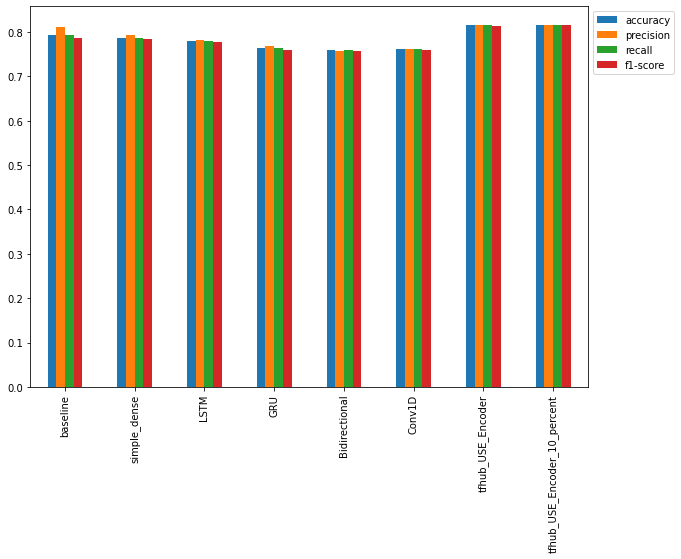

In [ ]:
#Plot
import matplotlib.pyplot as plt

all_model_results.plot(kind = "bar", figsize =  (10,7)).legend(bbox_to_anchor = (1.0,1.0));

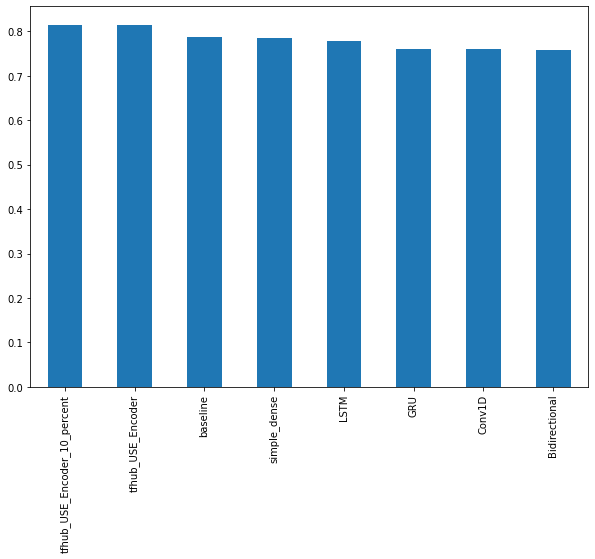

In [ ]:
#Sort model results by f1-score
all_model_results.sort_values("f1-score", ascending=False)["f1-score"].plot(kind = "bar", figsize = (10,7))

Uploading our model's training logs to TensorBoard and comparing them


In [ ]:
#View tensorboard logs of modelling  experiments
!tensorboard dev upload --logdir ./Model_logs/ \
--name "NLP Modelling experiments ZTM TF Course Video (Student)" \
--description "NLP with the twitter dataset from kaggle" \
--one_shot

2021-08-24 17:44:11.564652: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-08-24 17:44:11.590267: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-08-24 17:44:11.590842: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero

***** TensorBoard Uploader *****

This will upload your TensorBoard logs to https://tensorboard.dev/ from
the following directory:

./Model_logs/

This TensorBoard will be visible to everyone. Do not upload sensitive
data.

Your use of this service is subject to Google's Terms of Service
<https://policies.google.com/terms> and Privacy Po

 Saving and loading in a trained NLP model with TensorFlow

In [ ]:
model_7.save("model_7.h5")

In [ ]:
#Load model_7 back in 
loaded_model_7 = tf.keras.models.load_model("model_7.h5",
                                            custom_objects = {"KerasLayer":hub.KerasLayer})

In [ ]:
#Loaded model_7 performance
loaded_model_7.evaluate(val_sentences, val_labels)

24/24 [==============================] - 1s 16ms/step - loss: 0.4263 - accuracy: 0.8163


[0.4263342022895813, 0.8162729740142822]

In [ ]:
model_7_results

{'accuracy': 81.62729658792651,
 'f1-score': 0.8153469807013113,
 'precision': 0.8170007401548035,
 'recall': 0.8162729658792651}

In [ ]:
#Saved Model Format
model_7.save("model_7_saved_model_format")

INFO:tensorflow:Assets written to: model_7_saved_model_format/assets


INFO:tensorflow:Assets written to: model_7_saved_model_format/assets


In [ ]:
#Load our model
loaded_model_7_saved_model_format = tf.keras.models.load_model("model_7_saved_model_format")

In [ ]:
loaded_model_7_saved_model_format.evaluate(val_sentences, val_labels)

24/24 [==============================] - 1s 15ms/step - loss: 0.4263 - accuracy: 0.8163


[0.4263342022895813, 0.8162729740142822]

In [ ]:
model_7_results

{'accuracy': 81.62729658792651,
 'f1-score': 0.8153469807013113,
 'precision': 0.8170007401548035,
 'recall': 0.8162729658792651}

 Downloading a pretrained model and preparing data to investigate predictions

In [ ]:
#Our best model is not perfect, which predictions is it getting wron
!wget https://storage.googleapis.com/ztm_tf_course/08_model_6_USE_feature_extractor.zip
!unzip 08_model_6_USE_feature_extractor.zip

--2021-08-24 18:04:44--  https://storage.googleapis.com/ztm_tf_course/08_model_6_USE_feature_extractor.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.23.128, 74.125.203.128, 74.125.204.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.23.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 960779165 (916M) [application/zip]
Saving to: ‘08_model_6_USE_feature_extractor.zip’

08_model_6_USE_feat 100%[===================>] 916.27M   117MB/s    in 8.1s    

2021-08-24 18:04:53 (113 MB/s) - ‘08_model_6_USE_feature_extractor.zip’ saved [960779165/960779165]

Archive:  08_model_6_USE_feature_extractor.zip
   creating: 08_model_6_USE_feature_extractor/
   creating: 08_model_6_USE_feature_extractor/assets/
   creating: 08_model_6_USE_feature_extractor/variables/
  inflating: 08_model_6_USE_feature_extractor/variables/variables.data-00000-of-00001  
  inflating: 08_model_6_USE_feature_extractor/variables/variables.inde

In [ ]:
model_pretrained = tf.keras.models.load_model("08_model_6_USE_feature_extractor")
model_pretrained.evaluate(val_sentences,val_labels)

24/24 [==============================] - 1s 16ms/step - loss: 0.4272 - accuracy: 0.8163


[0.42723119258880615, 0.8162729740142822]

In [ ]:
model_pretrained_pred_probs = model_pretrained.predict(val_sentences)
model_pretrained_preds =  tf.squeeze(tf.round(model_pretrained_pred_probs))
model_pretrained_preds[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([0., 1., 1., 0., 1., 1., 1., 1., 1., 0.], dtype=float32)>

In [ ]:
val_df = pd.DataFrame({"text": val_sentences,
                        "target":val_labels,
                        "pred":model_pretrained_preds,
                        "pred_probs": tf.squeeze(model_pretrained_pred_probs)})

val_df

text  ...  pred_probs
0    DFR EP016 Monthly Meltdown - On Dnbheaven 2015...  ...    0.159757
1    FedEx no longer to transport bioterror germs i...  ...    0.747162
2    Gunmen kill four in El Salvador bus attack: Su...  ...    0.988749
3    @camilacabello97 Internally and externally scr...  ...    0.196229
4    Radiation emergency #preparedness starts with ...  ...    0.707808
..                                                 ...  ...         ...
757            That's the ultimate road to destruction  ...    0.137074
758  @SetZorah dad why dont you claim me that mean ...  ...    0.095865
759  FedEx will no longer transport bioterror patho...  ...    0.876982
760  Crack in the path where I wiped out this morni...  ...    0.612631
761  I liked a @YouTube video from @dannyonpc http:...  ...    0.117992

[762 rows x 4 columns]

In [ ]:
#Find the wrong predictions and sort by prediction probs
most_wrong = val_df[val_df["target"] != val_df["pred"]].sort_values("pred_probs", ascending= False)
most_wrong.head()

text  ...  pred_probs
31   ? High Skies - Burning Buildings ? http://t.co...  ...    0.910196
759  FedEx will no longer transport bioterror patho...  ...    0.876982
628  @noah_anyname That's where the concentration c...  ...    0.852300
209  Ashes 2015: AustraliaÛªs collapse at Trent Br...  ...    0.835454
251  @AshGhebranious civil rights continued in the ...  ...    0.827213

[5 rows x 4 columns]

Visualising our model's most wrong predictions

In [ ]:
for row in most_wrong[:10].itertuples():
  _, text, target, pred, pred_probs = row
  print(f"Target {target}, Pred: {pred}, Prob: {pred_probs}")
  print(f"Text\n: {text}\n")
  print("--------------------------------------------\n")

Target 0, Pred: 1.0, Prob: 0.9101957678794861
Text
: ? High Skies - Burning Buildings ? http://t.co/uVq41i3Kx2 #nowplaying

--------------------------------------------

Target 0, Pred: 1.0, Prob: 0.8769820928573608
Text
: FedEx will no longer transport bioterror pathogens in wake of anthrax lab mishaps http://t.co/lHpgxc4b8J

--------------------------------------------

Target 0, Pred: 1.0, Prob: 0.8523000478744507
Text
: @noah_anyname That's where the concentration camps and mass murder come in. 
 
EVERY. FUCKING. TIME.

--------------------------------------------

Target 0, Pred: 1.0, Prob: 0.8354544043540955
Text
: Ashes 2015: AustraliaÛªs collapse at Trent Bridge among worst in history: England bundled out Australia for 60 ... http://t.co/t5TrhjUAU0

--------------------------------------------

Target 0, Pred: 1.0, Prob: 0.8272134065628052
Text
: @AshGhebranious civil rights continued in the 60s. And what about trans-generational trauma? if anything we should listen to the Ame

In [ ]:
for row in most_wrong[-10:].itertuples():
  _, text, target, pred, pred_probs = row
  print(f"Target {target}, Pred: {pred}, Prob: {pred_probs}")
  print(f"Text\n: {text}\n")
  print("--------------------------------------------\n")

Target 1, Pred: 0.0, Prob: 0.06730347871780396
Text
: @DavidVonderhaar At least you were sincere ??

--------------------------------------------

Target 1, Pred: 0.0, Prob: 0.055075809359550476
Text
: @willienelson We need help! Horses will die!Please RT &amp; sign petition!Take a stand &amp; be a voice for them! #gilbert23 https://t.co/e8dl1lNCVu

--------------------------------------------

Target 1, Pred: 0.0, Prob: 0.05460337549448013
Text
: Lucas Duda is Ghost Rider. Not the Nic Cage version but an actual 'engulfed in flames' badass. #Mets

--------------------------------------------

Target 1, Pred: 0.0, Prob: 0.054596975445747375
Text
: going to redo my nails and watch behind the scenes of desolation of smaug ayyy

--------------------------------------------

Target 1, Pred: 0.0, Prob: 0.04963727295398712
Text
: You can never escape me. Bullets don't harm me. Nothing harms me. But I know pain. I know pain. Sometimes I share it. With someone like you.

-----------------------

Making and visualising predictions on the test dataset

In [ ]:
#Make preds and visualizing them 
test_sentences = test_df["text"].to_list()
test_sentences[:5]

['Just happened a terrible car crash',
 'Heard about #earthquake is different cities, stay safe everyone.',
 'there is a forest fire at spot pond, geese are fleeing across the street, I cannot save them all',
 'Apocalypse lighting. #Spokane #wildfires',
 'Typhoon Soudelor kills 28 in China and Taiwan']

In [ ]:
test_samples = random.sample(test_sentences, 10)
for test_sample in test_samples:
  pred_prob = tf.squeeze(model_pretrained.predict([test_sample]))
  pred = tf.round(pred_prob)
  print(f"Pred {int(pred)}, Prob: {pred_prob}")
  print(f"Text:\n {test_sample} \n")
  print("-------------------------\n")

Pred 0, Prob: 0.3538965582847595
Text:
 @samfbiddle If Gawker so badly wants to commit suicide why don't you just volunteer your offices to test the new F35's bombing capabilities. 

-------------------------

Pred 0, Prob: 0.3288167417049408
Text:
 About to get it with the babes of #wildfire and @taviiikenney of course!! 

-------------------------

Pred 1, Prob: 0.5162714123725891
Text:
 @emmap645 @Vickygeex @Zak_Bagans @NickGroff_ @AaronGoodwin A few friends of mine were up investigatin the hellfire last year they had loads 

-------------------------

Pred 0, Prob: 0.21366213262081146
Text:
 @HusnaaVhora I hope they dust off the air raid sirens! You can quote me on that lol 

-------------------------

Pred 0, Prob: 0.08002626895904541
Text:
 @LadyTraining yes I will probably drown her in craft throughout our years but by no means spoiled 

-------------------------

Pred 1, Prob: 0.5213621854782104
Text:
 PNC Bank Arts Center shooting: Holmdel man nabbed http://t.co/tvmD14uikO 

-

Understanding the concept of the speed/score tradeoff

In [ ]:
model_6_results

{'accuracy': 81.49606299212599,
 'f1-score': 0.8142251446314539,
 'precision': 0.8152722931679139,
 'recall': 0.8149606299212598}

In [ ]:
baseline_results

{'accuracy': 79.26509186351706,
 'f1-score': 0.7862189758049549,
 'precision': 0.8111390004213173,
 'recall': 0.7926509186351706}

In [ ]:
#Make a function the time of prediction
import time

def pred_timer(model, samples):
  start_time = time.perf_counter()
  model.predict(samples)
  end_time = time.perf_counter()
  total_time = end_time-start_time #Calculate time for preds
  time_per_pred = total_time/len(samples)
  return total_time, time_per_pred

In [ ]:
#Calculate Tf Hub USE time per pred
model_pretrained_total_time, model_pretrained_time_per_pred = pred_timer(model_pretrained, val_sentences)

In [ ]:
model_pretrained_time_per_pred, model_pretrained_total_time

(0.00045439351049868953, 0.34624785500000144)

In [ ]:
baseline_pred_time, baseline_time_per_pred = pred_timer(model_0, val_sentences)
baseline_pred_time, baseline_time_per_pred

(0.018663034999917727, 2.449217191590253e-05)

In [ ]:
model_pretrained_results = calculate_results(val_labels, model_pretrained_preds)

Text(0, 0.5, 'f1_score')

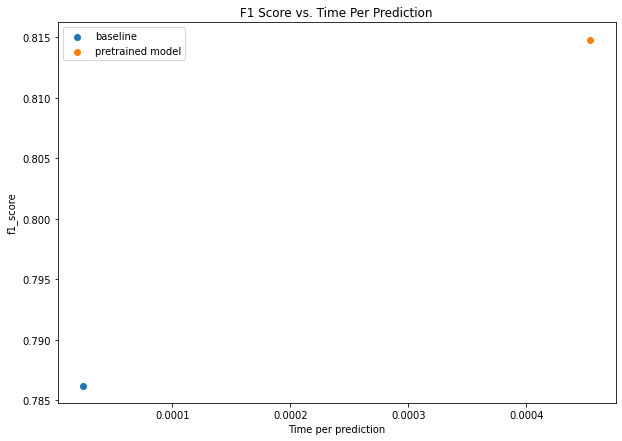

In [ ]:
plt.figure(figsize = (10,7))
plt.scatter(baseline_time_per_pred, baseline_results["f1-score"], label = "baseline")
plt.scatter(model_pretrained_time_per_pred, model_pretrained_results["f1-score"], label = "pretrained model")
plt.legend()
plt.title("F1 Score vs. Time Per Prediction")
plt.xlabel("Time per prediction")
plt.ylabel("f1_score")

Exercise

In [ ]:
model_1 = tf.keras.Sequential()
model_1.add(layers.Input(shape = (1,), dtype = "string"))
model_1.add(text_vectorizer)
model_1.add(embedding)
model_1.add(layers.Dense(1, activation = 'sigmoid'))

In [ ]:
from tensorflow.keras.layers.experimental.preprocessing import TextVectorization

model_2121 = tf.keras.Sequential([
  layers.Input(shape = (1,), dtype = "string"),
  text_vectorizer,
  embedding,
  layers.GlobalAveragePooling1D(),
  layers.Dense(1, activation = 'sigmoid')
])

In [ ]:
model_2121.compile(loss = 'binary_crossentropy', 
                optimizer = 'Adam',
                metrics = ["accuracy"])

In [ ]:
validation_data = (val_sentences, val_labels)

In [ ]:
# Setup text vectorization with custom variables
max_vocab_length = 10000 # max number of words to have in our vocabulary
max_length = 15 # max length our sequences will be (e.g. how many words from a Tweet does our model see?)

text_vectorizer = TextVectorization(max_tokens=max_vocab_length,
                                    output_mode="int",
                                    output_sequence_length=max_length)

In [ ]:
text_vectorizer.adapt(train_sentences)
model_2121.fit(train_sentences, train_labels, epochs = 5, validation_data = validation_data)

Epoch 1/5


FailedPreconditionError: ignored

In [ ]:
sentence_encoder_layer = hub.KerasLayer("https://tfhub.dev/google/universal-sentence-encoder/4",
                                        input_shape=[],
                                        dtype=tf.string,
                                        trainable=True) # turn training on to fine-tune the TensorFlow Hub model

In [ ]:
model_8 = tf.keras.Sequential([
  sentence_encoder_layer,
  layers.Dense(1, activation = 'sigmoid')
])

In [ ]:
model_8.compile(loss = 'binary_crossentropy',
                optimizer= 'Adam',
                metrics = ["accuracy"])

In [ ]:
model_8.fit(train_sentences, train_labels, epochs = 5, validation_data= validation_data)

# [NoteBook_08](https://colab.research.google.com/github/mrdbourke/tensorflow-deep-learning/blob/main/09_SkimLit_nlp_milestone_project_2.ipynb) **Project SkimLit Practice**

 [Real Notebook](https://colab.research.google.com/drive/1qQRdiOSadFCx-K248E3DChP4DHb9h47j)

Setting up our notebook for Milestone Project 2 (getting the data)

In [2]:
!git clone https://github.com/Franck-Dernoncourt/pubmed-rct.git
!ls pubmed-rct

Cloning into 'pubmed-rct'...
remote: Enumerating objects: 33, done.
remote: Counting objects: 100% (3/3), done.
remote: Compressing objects: 100% (3/3), done.
remote: Total 33 (delta 0), reused 0 (delta 0), pack-reused 30
Unpacking objects: 100% (33/33), done.
PubMed_200k_RCT
PubMed_200k_RCT_numbers_replaced_with_at_sign
PubMed_20k_RCT
PubMed_20k_RCT_numbers_replaced_with_at_sign
README.md


In [3]:
#Check what files are in the PubMed_20k dataset
!ls pubmed-rct/PubMed_200k_RCT_numbers_replaced_with_at_sign/

dev.txt  test.txt  train.zip


In [4]:
#start our experimetns using hte 20K datasets with numbers replaced by '@' sign
data_dir = "/content/pubmed-rct/PubMed_20k_RCT_numbers_replaced_with_at_sign"

In [5]:
import os 
filenames = [data_dir + filename for filename in os.listdir(data_dir)]

In [6]:
filenames

['/content/pubmed-rct/PubMed_20k_RCT_numbers_replaced_with_at_signdev.txt',
 '/content/pubmed-rct/PubMed_20k_RCT_numbers_replaced_with_at_signtest.txt',
 '/content/pubmed-rct/PubMed_20k_RCT_numbers_replaced_with_at_signtrain.txt']

Visualising examples from the dataset (becoming one with the data)

In [7]:
def get_lines(filename):
  with open(filename, "r") as f:
    return f.readlines()

In [8]:
#lets read in our traning lines
train_lines = get_lines(data_dir+"/train.txt")
train_lines[:10]

['###24293578\n',
 'OBJECTIVE\tTo investigate the efficacy of @ weeks of daily low-dose oral prednisolone in improving pain , mobility , and systemic low-grade inflammation in the short term and whether the effect would be sustained at @ weeks in older adults with moderate to severe knee osteoarthritis ( OA ) .\n',
 'METHODS\tA total of @ patients with primary knee OA were randomized @:@ ; @ received @ mg/day of prednisolone and @ received placebo for @ weeks .\n',
 'METHODS\tOutcome measures included pain reduction and improvement in function scores and systemic inflammation markers .\n',
 'METHODS\tPain was assessed using the visual analog pain scale ( @-@ mm ) .\n',
 'METHODS\tSecondary outcome measures included the Western Ontario and McMaster Universities Osteoarthritis Index scores , patient global assessment ( PGA ) of the severity of knee OA , and @-min walk distance ( @MWD ) .\n',
 'METHODS\tSerum levels of interleukin @ ( IL-@ ) , IL-@ , tumor necrosis factor ( TNF ) - , and 

In [9]:
len(train_lines)

210040

In [10]:
def preprocess_text_with_line_numbers(filename):
  input_lines = get_lines(filename)
  abstract_lines  = ""
  abstract_samples = []


  #Loop through each line in the target file
  for line in input_lines:
    if line.startswith("###"):
      abstract_id = line
      abstract_lines = ""

    elif line.isspace():
      abstract_lines_split = abstract_lines.splitlines()

      #Iterate through each line in a  single abstract and count them at the same time
      for abstract_line_number, abstract_line in enumerate(abstract_lines_split):
        line_data = {}
        target_text_split = abstract_line.split("\t")
        line_data["target"] = target_text_split[0]
        line_data["text"] = target_text_split[1].lower()
        line_data["line_number"] = abstract_line_number
        line_data["total_lines"] = len(abstract_lines_split) - 1
        abstract_samples.append(line_data)
    else:
      abstract_lines += line

  return abstract_samples

In [11]:
%%time
train_samples = preprocess_text_with_line_numbers(data_dir+"/train.txt")
val_samples = preprocess_text_with_line_numbers(data_dir + "/dev.txt")
test_samples = preprocess_text_with_line_numbers(data_dir + "/test.txt")

print(len(train_samples), len(val_samples), len(test_samples))

180040 30212 30135
CPU times: user 581 ms, sys: 120 ms, total: 701 ms
Wall time: 701 ms


In [12]:
train_samples[:10]

[{'line_number': 0,
  'target': 'OBJECTIVE',
  'text': 'to investigate the efficacy of @ weeks of daily low-dose oral prednisolone in improving pain , mobility , and systemic low-grade inflammation in the short term and whether the effect would be sustained at @ weeks in older adults with moderate to severe knee osteoarthritis ( oa ) .',
  'total_lines': 11},
 {'line_number': 1,
  'target': 'METHODS',
  'text': 'a total of @ patients with primary knee oa were randomized @:@ ; @ received @ mg/day of prednisolone and @ received placebo for @ weeks .',
  'total_lines': 11},
 {'line_number': 2,
  'target': 'METHODS',
  'text': 'outcome measures included pain reduction and improvement in function scores and systemic inflammation markers .',
  'total_lines': 11},
 {'line_number': 3,
  'target': 'METHODS',
  'text': 'pain was assessed using the visual analog pain scale ( @-@ mm ) .',
  'total_lines': 11},
 {'line_number': 4,
  'target': 'METHODS',
  'text': 'secondary outcome measures include

Performing visual data analysis on our preprocessed text

In [13]:
import pandas as pd
train_df = pd.DataFrame(train_samples)
val_df = pd.DataFrame(val_samples)
test_df = pd.DataFrame(test_samples)

In [14]:
train_df.head()

target  ... total_lines
0  OBJECTIVE  ...          11
1    METHODS  ...          11
2    METHODS  ...          11
3    METHODS  ...          11
4    METHODS  ...          11

[5 rows x 4 columns]

In [15]:
train_df.target.value_counts

<bound method IndexOpsMixin.value_counts of 0           OBJECTIVE
1             METHODS
2             METHODS
3             METHODS
4             METHODS
             ...     
180035        RESULTS
180036        RESULTS
180037        RESULTS
180038    CONCLUSIONS
180039    CONCLUSIONS
Name: target, Length: 180040, dtype: object>

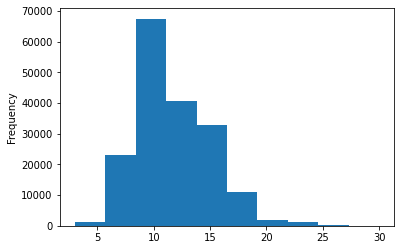

In [16]:
#Lets check the length of different lines 
train_df.total_lines.plot.hist()

In [17]:
#Get a list of sentences 
train_sentences = train_df["text"].to_list()
val_sentences = val_df["text"].to_list()
test_sentences = test_df["text"].to_list()

In [18]:
len(train_sentences), len(val_sentences), len(test_sentences)

(180040, 30212, 30135)

In [19]:
train_sentences[:10]

['to investigate the efficacy of @ weeks of daily low-dose oral prednisolone in improving pain , mobility , and systemic low-grade inflammation in the short term and whether the effect would be sustained at @ weeks in older adults with moderate to severe knee osteoarthritis ( oa ) .',
 'a total of @ patients with primary knee oa were randomized @:@ ; @ received @ mg/day of prednisolone and @ received placebo for @ weeks .',
 'outcome measures included pain reduction and improvement in function scores and systemic inflammation markers .',
 'pain was assessed using the visual analog pain scale ( @-@ mm ) .',
 'secondary outcome measures included the western ontario and mcmaster universities osteoarthritis index scores , patient global assessment ( pga ) of the severity of knee oa , and @-min walk distance ( @mwd ) .',
 'serum levels of interleukin @ ( il-@ ) , il-@ , tumor necrosis factor ( tnf ) - , and high-sensitivity c-reactive protein ( hscrp ) were measured .',
 'there was a clinic

Turning our target labels into numbers (ML models require numbers)

In [20]:
from sklearn.preprocessing import OneHotEncoder
one_hot_encoder = OneHotEncoder(sparse = False)

In [21]:
train_labels_one_hot = one_hot_encoder.fit_transform(train_df["target"].to_numpy().reshape(-1,1))
val_labels_one_hot = one_hot_encoder.transform(val_df["target"].to_numpy().reshape(-1,1))
test_labels_one_hot = one_hot_encoder.transform(test_df["target"].to_numpy().reshape(-1,1))

In [22]:
import tensorflow as tf
tf.constant(train_labels_one_hot)

<tf.Tensor: shape=(180040, 5), dtype=float64, numpy=
array([[0., 0., 0., 1., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0.],
       ...,
       [0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.]])>

In [23]:
#Label encode labels ("target columns") and encode them in to integers
from sklearn.preprocessing import LabelEncoder

label_encoder= LabelEncoder()

train_labels_encoded = label_encoder.fit_transform(train_df["target"].to_numpy())
val_labels_encoded = label_encoder.transform(val_df["target"].to_numpy())
test_labels_encoded = label_encoder.transform(test_df["target"].to_numpy())

In [24]:
#Get class names and number of classes from lable encoder instance
num_classes = len(label_encoder.classes_)
class_names = label_encoder.classes_

In [25]:
num_classes, class_names

(5, array(['BACKGROUND', 'CONCLUSIONS', 'METHODS', 'OBJECTIVE', 'RESULTS'],
       dtype=object))

Model 0: Creating, fitting and evaluating a baseline model for SkimLit

In [26]:
#TF-IDF encoder model from sklearn (model_0)
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline

In [27]:
model_0 = Pipeline([
                    ("tfidf", TfidfVectorizer()),
                    ("clf", MultinomialNB())
])

In [28]:
model_0.fit(train_sentences, train_labels_encoded)

Pipeline(memory=None,
         steps=[('tfidf',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=1.0, max_features=None,
                                 min_df=1, ngram_range=(1, 1), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words=None, strip_accents=None,
                                 sublinear_tf=False,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, use_idf=True,
                                 vocabulary=None)),
                ('clf',
                 MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))],
         verbose=False)

In [29]:
#Evaluate baseline model
model_0.score(val_sentences, val_labels_encoded)

0.7218323844829869

In [30]:
baseline_preds = model_0.predict(val_sentences)
baseline_preds

array([4, 1, 3, ..., 4, 4, 1])

In [31]:
# Download helper function scripts
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py

from helper_functions import calculate_results

--2021-08-29 17:05:33--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10246 (10K) [text/plain]
Saving to: ‘helper_functions.py’

helper_functions.py 100%[===================>]  10.01K  --.-KB/s    in 0s      

2021-08-29 17:05:33 (41.7 MB/s) - ‘helper_functions.py’ saved [10246/10246]



In [32]:
baseline_results = calculate_results(val_labels_encoded, baseline_preds)
baseline_results

{'accuracy': 72.1832384482987,
 'f1': 0.6989250353450294,
 'precision': 0.7186466952323352,
 'recall': 0.7218323844829869}

Preparing our data for deep sequence models

In [33]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers

In [34]:
#how long is eacvh sentence on average
sent_lens = [len(sentence.split()) for sentence in train_sentences]
avg_sent_len = np.mean(sent_lens)
avg_sent_len

26.338269273494777

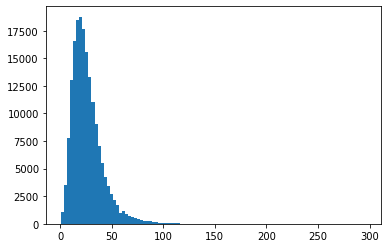

In [35]:
#What does the distibution look like
import matplotlib.pyplot as plt

plt.hist(sent_lens, bins = 100);

In [36]:
#how long of a sentence length covers 95% of examples
output_seq_len = int(np.percentile(sent_lens, 95))
output_seq_len

55

In [37]:
#maximum sequence lenght in training 
max(sent_lens)

296

Creating a text vectoriser to map our tokens (text) to numbers

In [38]:
from tensorflow.keras.layers.experimental.preprocessing import TextVectorization

In [39]:
max_tokens = 68000
text_vectorizer = TextVectorization(max_tokens = max_tokens,
                                    output_sequence_length = output_seq_len)

In [40]:
#adapt to oyr training sentences
text_vectorizer.adapt(train_sentences)

In [41]:
#test our text vectorizer on random sentences
import random

target_sentence = random.choice(train_sentences)
print(f"Text: \n {target_sentence}")
print(f"\n Lenght of Next: {len(target_sentence.split())}")
print(f"\nVectorized Text: {text_vectorizer([target_sentence])}")

Text: 
 these differences were somewhat greater in children with tsh @ miu/l ( hc : t@ , @ vs placebo , @ cm ; p = @ ; height : t@ , @ vs placebo , @ cm ; p = @ ) , but were not found in children with tsh < @ miu/l ( hc : t@ , @ vs placebo , @ cm ; p = @ ; height : t@ , @ vs placebo , @ cm ; p = @ ) .

 Lenght of Next: 86

Vectorized Text: [[  111   102     9  8180   182     5   109     7  7134 13154  3156   206
     44    48   520    14  1346   206    44    48   520    14    72     9
     31   208     5   109     7  7134 13154  3156   206    44    48   520
     14  1346   206    44    48   520    14     0     0     0     0     0
      0     0     0     0     0     0     0]]


In [42]:
rct_20k_text_vocab = text_vectorizer.get_vocabulary()
print(f"Number of words in vocab: {len(rct_20k_text_vocab)}")
print(f"Most Common words in the vocab: {rct_20k_text_vocab[:5]}")

Number of words in vocab: 64841
Most Common words in the vocab: ['', '[UNK]', 'the', 'and', 'of']


In [43]:
text_vectorizer.get_config() #all the parameters used

{'batch_input_shape': (None,),
 'dtype': 'string',
 'max_tokens': 68000,
 'name': 'text_vectorization',
 'ngrams': None,
 'output_mode': 'int',
 'output_sequence_length': 55,
 'pad_to_max_tokens': False,
 'split': 'whitespace',
 'standardize': 'lower_and_strip_punctuation',
 'trainable': True}

 Creating a custom token embedding layer with TensorFlow



In [44]:
from tensorflow.keras.layers import Embedding

In [45]:
# Create token embedding layer
token_embed = layers.Embedding(input_dim=len(rct_20k_text_vocab), # length of vocabulary
                               output_dim=128, # Note: different embedding sizes result in drastically different numbers of parameters to train
                               # Use masking to handle variable sequence lengths (save space)
                               mask_zero=True,
                               name="token_embedding") 

# Show example embedding
print(f"Sentence before vectorization:\n{target_sentence}\n")
vectorized_sentence = text_vectorizer([target_sentence])
print(f"Sentence after vectorization (before embedding):\n{vectorized_sentence}\n")
embedded_sentence = token_embed(vectorized_sentence)
print(f"Sentence after embedding:\n{embedded_sentence}\n")
print(f"Embedded sentence shape: {embedded_sentence.shape}")

Sentence before vectorization:
these differences were somewhat greater in children with tsh @ miu/l ( hc : t@ , @ vs placebo , @ cm ; p = @ ; height : t@ , @ vs placebo , @ cm ; p = @ ) , but were not found in children with tsh < @ miu/l ( hc : t@ , @ vs placebo , @ cm ; p = @ ; height : t@ , @ vs placebo , @ cm ; p = @ ) .

Sentence after vectorization (before embedding):
[[  111   102     9  8180   182     5   109     7  7134 13154  3156   206
     44    48   520    14  1346   206    44    48   520    14    72     9
     31   208     5   109     7  7134 13154  3156   206    44    48   520
     14  1346   206    44    48   520    14     0     0     0     0     0
      0     0     0     0     0     0     0]]

Sentence after embedding:
[[[-4.1550983e-02  3.5423707e-02  2.6248395e-05 ... -1.5924074e-02
   -2.3326172e-02  2.5336530e-02]
  [ 4.4206273e-02 -7.8628883e-03 -3.3092871e-02 ... -3.0187368e-03
   -2.9985793e-03  3.5165772e-03]
  [-3.0684615e-02  4.6226177e-02  8.7738633e-03 ... -

Creating fast loading dataset with the TensorFlow tf.data API

In [46]:
#Trun our data into tensorflow datasets

train_dataset = tf.data.Dataset.from_tensor_slices((train_sentences, train_labels_one_hot))
val_dataset = tf.data.Dataset.from_tensor_slices((val_sentences, val_labels_one_hot))
test_dataset = tf.data.Dataset.from_tensor_slices((test_sentences, test_labels_one_hot))

In [47]:
train_labels_one_hot.shape

(180040, 5)

In [48]:
#Take TensorSliceDatasets and turn them into prefetched datasets
train_dataset = train_dataset.batch(32).prefetch(tf.data.AUTOTUNE)
val_dataset = val_dataset.batch(32).prefetch(tf.data.AUTOTUNE)
test_dataset = test_dataset.batch(32).prefetch(tf.data.AUTOTUNE)

In [49]:
train_dataset #Now in a prefetch dataset

<PrefetchDataset shapes: ((None,), (None, 5)), types: (tf.string, tf.float64)>

Model 1: Building, fitting and evaluating a Conv1D with token embeddings

In [50]:
#make a conv1D model
inputs = layers.Input(shape = (1,), dtype = tf.string)
text_vectors = text_vectorizer(inputs)
token_embeddings = token_embed(text_vectors)
x = layers.Conv1D(64, kernel_size = 5, padding = "same", activation = "relu")(token_embeddings)
x = layers.GlobalAveragePooling1D()(x)
outputs = layers.Dense(num_classes, activation="softmax")(x)

model_1 = tf.keras.Model(inputs, outputs)

In [51]:
model_1.compile(loss = "categorical_crossentropy",
                optimizer = "Adam",
                metrics = ["accuracy"])

In [52]:
model_1.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 1)]               0         
_________________________________________________________________
text_vectorization (TextVect (None, 55)                0         
_________________________________________________________________
token_embedding (Embedding)  (None, 55, 128)           8299648   
_________________________________________________________________
conv1d (Conv1D)              (None, 55, 64)            41024     
_________________________________________________________________
global_average_pooling1d (Gl (None, 64)                0         
_________________________________________________________________
dense (Dense)                (None, 5)                 325       
Total params: 8,340,997
Trainable params: 8,340,997
Non-trainable params: 0
___________________________________________________

In [53]:
history_model_1 = model_1.fit(train_dataset, 
                        steps_per_epoch = int(0.1*len(train_dataset)),
                        epochs = 3, validation_data = val_dataset,
                        validation_steps = int(0.1*len(val_dataset)))

Epoch 1/3
562/562 [==============================] - 37s 15ms/step - loss: 0.9112 - accuracy: 0.6389 - val_loss: 0.6862 - val_accuracy: 0.7384
Epoch 2/3
562/562 [==============================] - 8s 14ms/step - loss: 0.6601 - accuracy: 0.7559 - val_loss: 0.6337 - val_accuracy: 0.7719
Epoch 3/3
562/562 [==============================] - 8s 14ms/step - loss: 0.6192 - accuracy: 0.7747 - val_loss: 0.5967 - val_accuracy: 0.7872


In [54]:
#Evaluate on whole val dataset
model_1.evaluate(val_dataset)

945/945 [==============================] - 4s 5ms/step - loss: 0.6005 - accuracy: 0.7861


[0.6004630923271179, 0.7861445546150208]

In [55]:
#make preds 
model_1_pred_probs = model_1.predict(val_dataset)
model_1_pred_probs

array([[4.3561217e-01, 1.7018606e-01, 9.2615165e-02, 2.7133009e-01,
        3.0256495e-02],
       [3.9883041e-01, 3.1491300e-01, 1.1832500e-02, 2.6553681e-01,
        8.8872742e-03],
       [1.2907766e-01, 1.4148467e-02, 2.1639795e-03, 8.5457456e-01,
        3.5379784e-05],
       ...,
       [9.0879676e-06, 8.1319566e-04, 1.2419997e-03, 2.6479922e-06,
        9.9793303e-01],
       [6.0232390e-02, 4.6884236e-01, 8.3001845e-02, 6.2264577e-02,
        3.2565886e-01],
       [1.8398933e-01, 6.4549857e-01, 4.3668956e-02, 5.6120060e-02,
        7.0723101e-02]], dtype=float32)

In [56]:
#covert pred probs to classes
model_1_preds = tf.argmax(model_1_pred_probs, axis = 1)
model_1_preds

<tf.Tensor: shape=(30212,), dtype=int64, numpy=array([0, 0, 3, ..., 4, 1, 1])>

In [57]:
#Calculate model_1 results
model_1_results = calculate_results(val_labels_encoded, model_1_preds)
model_1_results

{'accuracy': 78.6144578313253,
 'f1': 0.7838153539309488,
 'precision': 0.7830184073465487,
 'recall': 0.786144578313253}

Preparing a pretrained embedding layer from TensorFlow Hub for Model 2


In [58]:
#The paper originally used GloVe embeddings but we are going to use the universal sentence encoder
#Download pretrained  USE
import tensorflow_hub as hub

tf_hub_embedding_layers = hub.KerasLayer("https://tfhub.dev/google/universal-sentence-encoder/4",
                                         trainable = False,
                                         name = "universal_sentence_encoder")

In [59]:
#test our pretrained embedding
random_train_sentence = random.choice(train_sentences)
print(random_train_sentence)
use_embedding_sentence = tf_hub_embedding_layers([random_train_sentence])
print(use_embedding_sentence)

trelagliptin is a novel once-weekly oral dpp-@ inhibitor .
tf.Tensor(
[[ 3.24246846e-02  4.80048694e-02  6.73446208e-02 -4.21149209e-02
  -5.55946343e-02  7.09136054e-02  4.43155281e-02 -6.62617162e-02
   4.93982546e-02 -3.80728059e-02  5.81470691e-02 -6.33125305e-02
   5.15547162e-03 -4.44300100e-02 -8.87309462e-02 -8.17299262e-02
  -5.92834577e-02  3.12209260e-02  1.20720789e-02  8.94170441e-03
  -5.51888347e-02 -2.16349047e-02 -7.06916079e-02 -5.63412756e-02
  -4.19658097e-03  6.75830012e-03  4.23207618e-02 -4.34135310e-02
  -5.02108485e-02 -5.35261165e-03 -3.21960859e-02  3.65897864e-02
   1.80731248e-02 -7.55750015e-02  1.71209667e-02 -3.60182039e-02
  -3.51116918e-02 -2.29549296e-02 -7.26854429e-02 -1.65424459e-02
   1.51401956e-03 -3.09808343e-03  6.59863129e-02  5.08732758e-02
  -1.47919375e-02 -6.02434343e-03 -6.73285350e-02  1.08883828e-02
  -2.75770500e-02 -5.32907099e-02 -4.81626354e-02 -4.51187752e-02
   8.14126059e-03 -5.14639020e-02  1.32916793e-02  2.60413215e-02
   5.5

Model 2: Building, fitting and evaluating a Conv1D model with token embeddings

In [60]:
#Building and fitting our nlp feature extraction model

inputs = layers.Input(shape = [], dtype = tf.string)
pretrained_embedding = tf_hub_embedding_layers(inputs) #512 feature vector
x = layers.Dense(128, activation = "relu")(pretrained_embedding)
outputs = layers.Dense(num_classes, activation = "softmax")(x)
model_2 = tf.keras.Model(inputs, outputs)

In [61]:
model_2.compile(loss = "categorical_crossentropy", 
                optimizer = "Adam",
                metrics = ["accuracy"])

In [62]:
history_model_2 = model_2.fit(train_dataset, steps_per_epoch=int(0.1*len(train_dataset)),
                              epochs = 3, validation_data = val_dataset,
                              validation_steps = int(0.1*len(val_dataset)))

Epoch 1/3
562/562 [==============================] - 15s 21ms/step - loss: 0.9187 - accuracy: 0.6472 - val_loss: 0.7981 - val_accuracy: 0.6885
Epoch 2/3
562/562 [==============================] - 12s 21ms/step - loss: 0.7694 - accuracy: 0.7012 - val_loss: 0.7562 - val_accuracy: 0.7071
Epoch 3/3
562/562 [==============================] - 12s 21ms/step - loss: 0.7529 - accuracy: 0.7127 - val_loss: 0.7401 - val_accuracy: 0.7121


In [63]:
model_2.evaluate(val_dataset)

945/945 [==============================] - 17s 18ms/step - loss: 0.7427 - accuracy: 0.7126


[0.7427390813827515, 0.7126307487487793]

In [64]:
model_2_pred_probs = model_2.predict(val_dataset)

In [65]:
model_2_preds = tf.argmax(model_2_pred_probs, axis = 1)
model_2_preds

<tf.Tensor: shape=(30212,), dtype=int64, numpy=array([0, 1, 3, ..., 4, 4, 2])>

In [66]:
model_2_results = calculate_results(val_labels_encoded, model_2_preds)
model_2_results

{'accuracy': 71.26307427512248,
 'f1': 0.7096145618908258,
 'precision': 0.7132146365597634,
 'recall': 0.7126307427512247}

In [67]:
baseline_results

{'accuracy': 72.1832384482987,
 'f1': 0.6989250353450294,
 'precision': 0.7186466952323352,
 'recall': 0.7218323844829869}

Creating a character-level tokeniser with TensorFlow's TextVectorization layer

In [68]:
#we are going to use token level embeddings and charecter level 
train_sentences[:10]

['to investigate the efficacy of @ weeks of daily low-dose oral prednisolone in improving pain , mobility , and systemic low-grade inflammation in the short term and whether the effect would be sustained at @ weeks in older adults with moderate to severe knee osteoarthritis ( oa ) .',
 'a total of @ patients with primary knee oa were randomized @:@ ; @ received @ mg/day of prednisolone and @ received placebo for @ weeks .',
 'outcome measures included pain reduction and improvement in function scores and systemic inflammation markers .',
 'pain was assessed using the visual analog pain scale ( @-@ mm ) .',
 'secondary outcome measures included the western ontario and mcmaster universities osteoarthritis index scores , patient global assessment ( pga ) of the severity of knee oa , and @-min walk distance ( @mwd ) .',
 'serum levels of interleukin @ ( il-@ ) , il-@ , tumor necrosis factor ( tnf ) - , and high-sensitivity c-reactive protein ( hscrp ) were measured .',
 'there was a clinic

In [69]:
#Make a function to split sentences into charecters
def split_chars(text):
  return " ".join(list(text))

In [70]:
split_chars(random_train_sentence)

't r e l a g l i p t i n   i s   a   n o v e l   o n c e - w e e k l y   o r a l   d p p - @   i n h i b i t o r   .'

In [71]:
#Split sequence level into charecter level data splits
train_chars = [split_chars(sentence) for sentence in train_sentences]
val_chars = [split_chars(sentence) for sentence in val_sentences]
test_chars = [split_chars(sentence) for sentence in test_sentences]

In [72]:
#Whats the average charecter length
char_lens = [len(sentence) for sentence in train_sentences]
mean_char_len = np.mean(char_lens)
mean_char_len

149.3662574983337

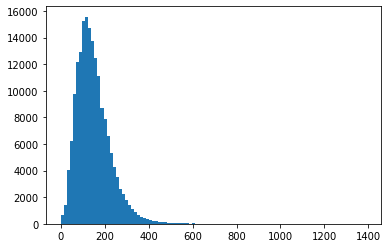

In [73]:
#Check distribution at a charecter level
import matplotlib.pyplot as plt
plt.hist(char_lens, bins = 100);

In [74]:
#Find what charecter length covers 95% of sequences
output_seq_char_len = int(np.percentile(char_lens, 95))
output_seq_char_len

290

In [75]:
#Get all keyboard characters
import string 
alphabet = string.ascii_lowercase + string.digits + string.punctuation
alphabet

'abcdefghijklmnopqrstuvwxyz0123456789!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [76]:
#Create char level token vectorizer
NUM_CHAR_TOKENS = len(alphabet) + 2 #2 for space and OOV (out of vocab) token
char_vectorizer = TextVectorization(max_tokens = NUM_CHAR_TOKENS, 
                                    output_sequence_length = output_seq_char_len,
                                    #standardize = None,
                                    name = "char_vectorizer")

In [77]:
char_vectorizer.adapt(train_chars)

In [78]:
char_vocab = char_vectorizer.get_vocabulary()
print(len(char_vocab))
print(char_vocab[:5])
print(char_vocab[5:])

28
['', '[UNK]', 'e', 't', 'i']
['a', 'n', 'o', 'r', 's', 'd', 'c', 'l', 'h', 'p', 'm', 'u', 'f', 'g', 'y', 'w', 'v', 'b', 'k', 'x', 'z', 'q', 'j']


In [79]:
random_train_chars = random.choice(train_chars)
print(random_train_chars)

vectorized_chars = char_vectorizer([random_train_sentence])
print(vectorized_chars)

t h i s   t r i a l   w a s   r e g i s t e r e d   i n   a   p u b l i c   r e g i s t r y   (   c u r r e n t   c o n t r o l l e d   t r i a l s   )   (   i s r c t n @   )   .
tf.Tensor(
[[1 1 5 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0]], shape=(1, 290), dtype=int64)


Creating a character-level embedding layer with tf.keras.layers.Embedding

In [80]:
#Char Embedding Layer
char_embed = layers.Embedding(input_dim = len(char_vocab), 
                              output_dim = 25, #Size of the char embedding in the paper
                              mask_zero = True, 
                              name = "char_embed")

In [81]:
#Test out our character embed layer
print(random_train_chars)
char_embed_example = char_embed(char_vectorizer([random_train_sentence]))
print(char_embed_example)
print(char_embed_example.shape)

t h i s   t r i a l   w a s   r e g i s t e r e d   i n   a   p u b l i c   r e g i s t r y   (   c u r r e n t   c o n t r o l l e d   t r i a l s   )   (   i s r c t n @   )   .
tf.Tensor(
[[[ 0.00643393 -0.04594069 -0.04095998 ... -0.00511702 -0.0300746
   -0.04025962]
  [ 0.00643393 -0.04594069 -0.04095998 ... -0.00511702 -0.0300746
   -0.04025962]
  [-0.03333526  0.02559016 -0.01190118 ...  0.0112175  -0.00552439
   -0.04552679]
  ...
  [ 0.03679606 -0.02709141 -0.02650018 ...  0.04195813 -0.01293977
    0.03758923]
  [ 0.03679606 -0.02709141 -0.02650018 ...  0.04195813 -0.01293977
    0.03758923]
  [ 0.03679606 -0.02709141 -0.02650018 ...  0.04195813 -0.01293977
    0.03758923]]], shape=(1, 290, 25), dtype=float32)
(1, 290, 25)


Model 3: Building, fitting and evaluating a Conv1D model on character embeddings


In [82]:
#Make Conv1D on chars only
inputs = layers.Input(shape = (1,), dtype = "string")
char_vectors = char_vectorizer(inputs)
char_embeddings = char_embed(char_vectors)
x = layers.Conv1D(64, kernel_size = 5, padding = "same", activation = "relu")(char_embeddings)
x = layers.GlobalMaxPool1D()(x)
outputs = layers.Dense(num_classes, activation = "softmax")(x)

model_3 = tf.keras.Model(inputs, outputs)

In [83]:
model_3.compile(loss = "categorical_crossentropy",
                optimizer = "Adam",
                metrics = ["accuracy"])

In [84]:
model_3.summary()

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 1)]               0         
_________________________________________________________________
char_vectorizer (TextVectori (None, 290)               0         
_________________________________________________________________
char_embed (Embedding)       (None, 290, 25)           700       
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 290, 64)           8064      
_________________________________________________________________
global_max_pooling1d (Global (None, 64)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 5)                 325       
Total params: 9,089
Trainable params: 9,089
Non-trainable params: 0
_________________________________________________________

In [ ]:
#Create char level datasets
train_char_dataset = tf.data.Dataset.from_tensor_slices([train_chars, train_labels_one_hot])
val_char_dataset = tf.data.Dataset.from_tensor_slices([val_chars, val_labels_one_hot])
test_char_dataset = tf.data.Dataset.from_tensor_slices([test_chars, test_labels_one_hot])

In [93]:
history_model_3 = model_3.fit(train_char_dataset, steps_per_epoch=int(0.1*len(train_char_dataset)),
                              epochs = 3,
                              validation_data = val_char_dataset,
                              validation_steps = int(0.1*len(val_char_dataset)))

NameError: ignored

In [ ]:
model_3_pred_probs = model_3.predict(val_char_dataset)
model_3_pred_probs

In [ ]:
model_3_preds = tf.argmax(model_3_pred_probs, axis = 1)
model_3_preds

In [ ]:
model_3_results = calculate_results(val_labels_encoded model_3_preds)
model_3_results